# Setting up

Creation of an virtual environment in the terminal, it's called synth-env.
By specification of only Python only without any version, the latest bug-free version is choose automatically. 
Which is in this case Python 3.12.1!
Activation of the environment also in the terminal.
Installing the requirements.txt libraries
Getting started :-) using: https://medium.com/@naime.diler/erstellung-und-verwaltung-einer-virtuellen-python-environment-mit-conda-6651cd014eae

Import all needed packages


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
from matplotlib import *
import sys
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, QuantileTransformer
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import MissingIndicator
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn import set_config
from sklearn.ensemble import GradientBoostingRegressor
import shap
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
import plotly.graph_objects as go
from sklearn.tree import DecisionTreeRegressor
import matplotlib.ticker as mtick





%matplotlib inline


/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Data

Import data needed

In [2]:
df = pd.read_csv("data.csv")  # Import the csv file as DataFrame


# Explore data

overall exploration

In [3]:
df.info()  # Get first impression of different columns and data types
df.dtypes.value_counts()  # Get amount of columns via data type


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7146 entries, 0 to 7145
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PropertyID    7146 non-null   int64  
 1   PropType      7146 non-null   object 
 2   taxkey        7146 non-null   int64  
 3   Address       7146 non-null   object 
 4   CondoProject  885 non-null    object 
 5   District      7146 non-null   int64  
 6   nbhd          7146 non-null   int64  
 7   Style         7125 non-null   object 
 8   Extwall       6220 non-null   object 
 9   Stories       7107 non-null   float64
 10  Year_Built    7135 non-null   float64
 11  Rooms         6703 non-null   float64
 12  FinishedSqft  7122 non-null   float64
 13  Units         7146 non-null   int64  
 14  Bdrms         6703 non-null   float64
 15  Fbath         7146 non-null   int64  
 16  Hbath         7146 non-null   int64  
 17  Lotsize       7146 non-null   int64  
 18  Sale_date     7146 non-null 

int64      8
object     6
float64    6
Name: count, dtype: int64

In [4]:
round(df.isna().sum() / len(df), 2)  # Checking for nan values
# Column CondoProject has so many, that it doesn't seem to be a valuable variable anymore


PropertyID      0.00
PropType        0.00
taxkey          0.00
Address         0.00
CondoProject    0.88
District        0.00
nbhd            0.00
Style           0.00
Extwall         0.13
Stories         0.01
Year_Built      0.00
Rooms           0.06
FinishedSqft    0.00
Units           0.00
Bdrms           0.06
Fbath           0.00
Hbath           0.00
Lotsize         0.00
Sale_date       0.00
Sale_price      0.00
dtype: float64

In [5]:
df.duplicated()  # No dublicates according to the column PropertyID, which functions as a key


0       False
1       False
2       False
3       False
4       False
        ...  
7141    False
7142    False
7143    False
7144    False
7145    False
Length: 7146, dtype: bool

In [6]:
# Explore some columns, which are not clear ba their initial naming convention
df.head(10)


PropertyID       PropType    taxkey                 Address  \
0       98461  Manufacturing  30131000    9434-9446 N 107TH ST   
1       98464     Commercial  30152000    9306-9316 N 107TH ST   
2       98508    Residential  49980110          9327 N SWAN RD   
3       98519    Residential  49993200   9411 W COUNTY LINE RD   
4       98561    Residential  50042000         9322 N JOYCE AV   
5       98593    Residential  50074000          9360 N 85TH ST   
6       98604    Residential  50085000       9305 N BURBANK AV   
7       98608    Residential  50089000          9217 N 83RD ST   
8       98696    Condominium  70017000  9192 N 70TH ST, Unit 2   
9       98715    Condominium  70036000  9212 N 70TH ST, Unit 8   

           CondoProject  District  nbhd                      Style  \
0                   NaN         9  6300           Service Building   
1                   NaN         9  6202  Office Building - 1 Story   
2                   NaN         9    40                        NaN   
3                   NaN         9    40                      Ranch   
4                   NaN         9    40                      Ranch   
5                   NaN         9    40                      Ranch   
6                   NaN         9    40                      Ranch   
7                   NaN         9    40                   Colonial   
8  NORTHRIDGE WOOD LAKE         9  5010            Condo Townhouse   
9  NORTHRIDGE WOOD LAKE         9  5010            Condo Townhouse   

          Extwall  Stories  Year_Built  Rooms  FinishedSqft  Units  Bdrms  \
0  Concrete Block      1.0      1978.0    NaN       20600.0      6    NaN   
1           Brick      1.0      1982.0    NaN        9688.0     23    NaN   
2             NaN      NaN         NaN    NaN           NaN      0    NaN   
3  Aluminum/Vinyl      1.0      1959.0    6.0        1334.0      1    3.0   
4  Aluminum/Vinyl      1.0      1980.0   10.0        1006.0      1    6.0   
5  Aluminum/Vinyl      1.0      1982.0    5.0        1007.0      1    3.0   
6  Aluminum/Vinyl      1.0      1984.0    5.0        1301.0      1    3.0   
7  Aluminum/Vinyl      2.0      2007.0    9.0        2237.0      1    4.0   
8             NaN      2.0      1973.0    7.0        1437.0      1    3.0   
9             NaN      2.0      1973.0    7.0        1437.0      1    4.0   

   Fbath  Hbath  Lotsize   Sale_date  Sale_price  
0      0      0        0  2022-04-01    950000.0  
1      0      0    35719  2022-10-07    385000.0  
2      0      0  1341648  2022-01-07    800000.0  
3      1      1    83200  2022-08-09    280000.0  
4      1      0     8303  2022-05-23    233100.0  
5      1      0     7200  2022-07-25    215000.0  
6      2      0     7200  2022-03-29    150000.0  
7      2      1    15677  2022-05-10    400000.0  
8      2      1        0  2022-05-16    122000.0  
9      2      1        0  2022-04-14    123000.0

In [7]:
# Analyze data by simple statistics
df.describe()


PropertyID        taxkey     District          nbhd      Stories  \
count    7146.000000  7.146000e+03  7146.000000   7146.000000  7107.000000   
mean   178756.774139  3.468743e+09     7.837671   3338.456339     1.384832   
std     47982.981714  1.484567e+09     4.262120   1795.175653     0.534812   
min     98461.000000  3.013100e+07     1.000000     40.000000     0.000000   
25%    136233.250000  2.311005e+09     4.000000   1780.000000     1.000000   
50%    176670.500000  3.211215e+09     8.000000   3060.000000     1.000000   
75%    221564.250000  4.703136e+09    11.000000   4620.000000     2.000000   
max    266040.000000  7.160375e+09    15.000000  24910.000000    14.000000   

        Year_Built        Rooms   FinishedSqft        Units        Bdrms  \
count  7135.000000  6703.000000    7122.000000  7146.000000  6703.000000   
mean   1936.170568     7.719379    2334.262707     2.010076     3.925854   
std     106.705102     4.155676    8425.984750    14.166496     2.079735   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%    1921.000000     5.000000    1082.000000     1.000000     3.000000   
50%    1948.000000     7.000000    1402.500000     1.000000     3.000000   
75%    1958.000000    10.000000    2014.000000     2.000000     5.000000   
max    2022.000000    63.000000  245266.000000   737.000000    32.000000   

             Fbath        Hbath       Lotsize    Sale_price  
count  7146.000000  7146.000000  7.146000e+03  7.146000e+03  
mean      1.435488     0.299328  6.676480e+03  2.715450e+05  
std       0.718715     0.510593  2.498876e+04  7.701413e+05  
min       0.000000     0.000000  0.000000e+00  4.000000e+03  
25%       1.000000     0.000000  3.660000e+03  1.310000e+05  
50%       1.000000     0.000000  5.002000e+03  1.950000e+05  
75%       2.000000     1.000000  6.750000e+03  2.600000e+05  
max       7.000000     3.000000  1.341648e+06  2.185000e+07

Analysze target variable

In [8]:
#Ratio of mean to meadian, which indicates that some properties might be so expensive that they artificially increase the mean ... so the mean is not representative in that case
((df.Sale_price.mean()-df.Sale_price.median())/df.Sale_price.mean())*100


28.188688865038962

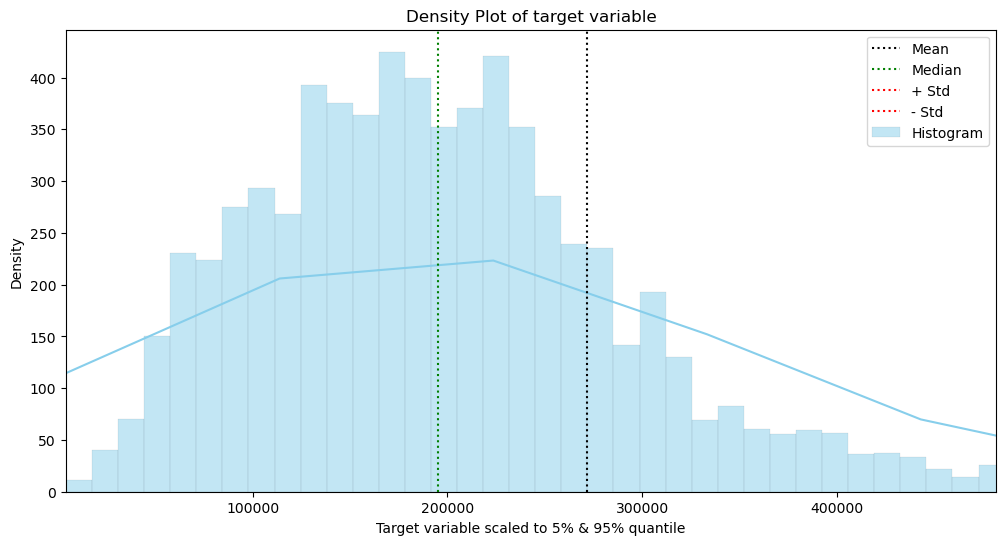

In [9]:
#Let's analyze the density of the target variable and some other plots

lower_limit = df["Sale_price"].quantile(0.00)
upper_limit = df["Sale_price"].quantile(0.95)

plt.figure(figsize=(12, 6))

# Create a histogram with a different color
sns.histplot(df["Sale_price"], color='skyblue', kde=True, label='Histogram', alpha=0.5)

plt.xlim(lower_limit, upper_limit)

plt.axvline(x=df["Sale_price"].mean(), color='black', linestyle=':', label='Mean')
plt.axvline(x=df["Sale_price"].median(), color='green', linestyle=':', label='Median')
plt.axvline(x=df["Sale_price"].std(), color='red', linestyle=':', label='+ Std')
plt.axvline(x=- df["Sale_price"].std(), color='red', linestyle=':', label='- Std')


# Add labels and title
plt.xlabel('Target variable scaled to 5% & 95% quantile')
plt.ylabel('Density')
plt.title('Density Plot of target variable')

plt.legend()

# Show the plot
plt.show()


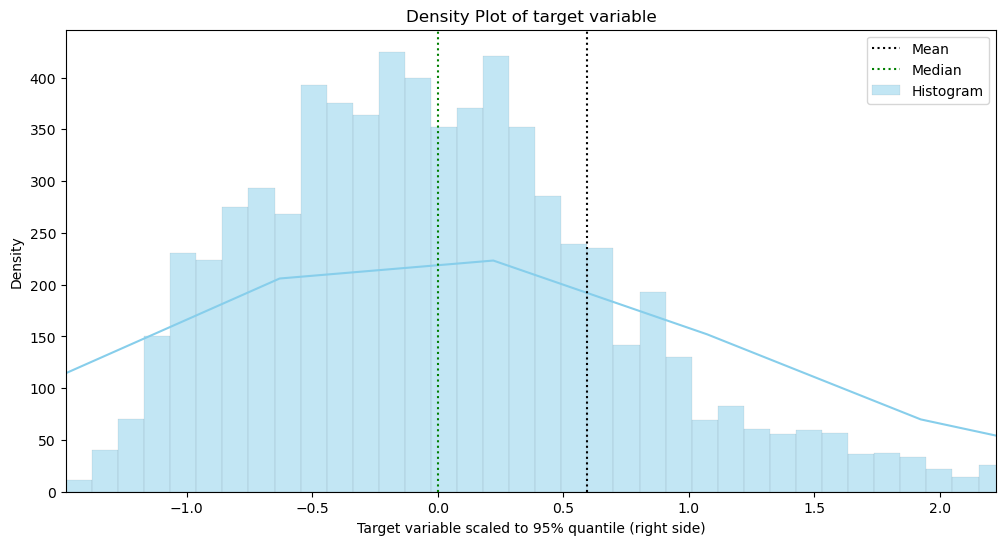

In [12]:
target = df["Sale_price"]
scaler = RobustScaler(with_centering=True)
target_scaled = scaler.fit_transform(target.values.reshape(-1,1))
target_scaled = pd.Series(target_scaled.flatten()) #Transform to series

#Let's analyze the density of the target variable and some other plots

lower_limit = target_scaled.quantile(0.00)
upper_limit = target_scaled.quantile(0.95)

plt.figure(figsize=(12, 6))



# Create a histogram with a different color
sns.histplot(target_scaled, color='skyblue', kde=True, label='Histogram', alpha=0.5)

plt.xlim(lower_limit, upper_limit)

plt.axvline(x=target_scaled.mean(), color='black', linestyle=':', label='Mean')
plt.axvline(x=target_scaled.median(), color='green', linestyle=':', label='Median')
#plt.axvline(x=target_scaled.std(), color='red', linestyle=':', label='+ Std') #as the values are heavely centered around the mean the std is not visible in the plot
#plt.axvline(x=- target_scaled.std(), color='red', linestyle=':', label='- Std')

# Add labels and title
plt.xlabel('Target variable scaled to 95% quantile (right side)')
plt.ylabel('Density')
plt.title('Density Plot of target variable')

plt.legend()
# Show the plot
plt.show()


<Axes: >

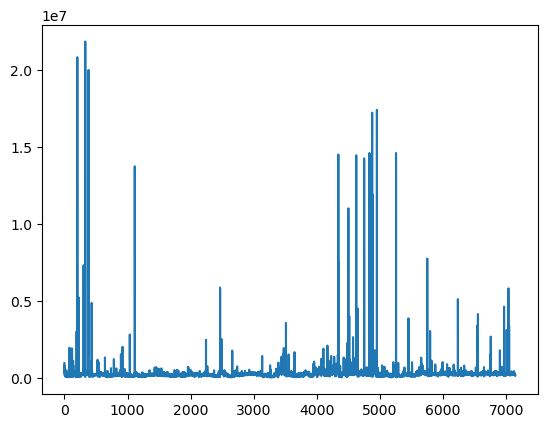

In [13]:
#And some other plots
df.Sale_price.plot()


Explore column by column

In [14]:
df.nunique()  # Check how many unique values each column has


PropertyID      7055
PropType           6
taxkey          7055
Address         7055
CondoProject     202
District          15
nbhd             459
Style             81
Extwall           18
Stories           13
Year_Built       155
Rooms             40
FinishedSqft    2386
Units             49
Bdrms             24
Fbath              8
Hbath              4
Lotsize         1670
Sale_date        313
Sale_price      1284
dtype: int64

In [15]:
# Transform neighborhood to string, as it is not a nummerical feature
df["nbhd"] = df["nbhd"].values.astype(str)


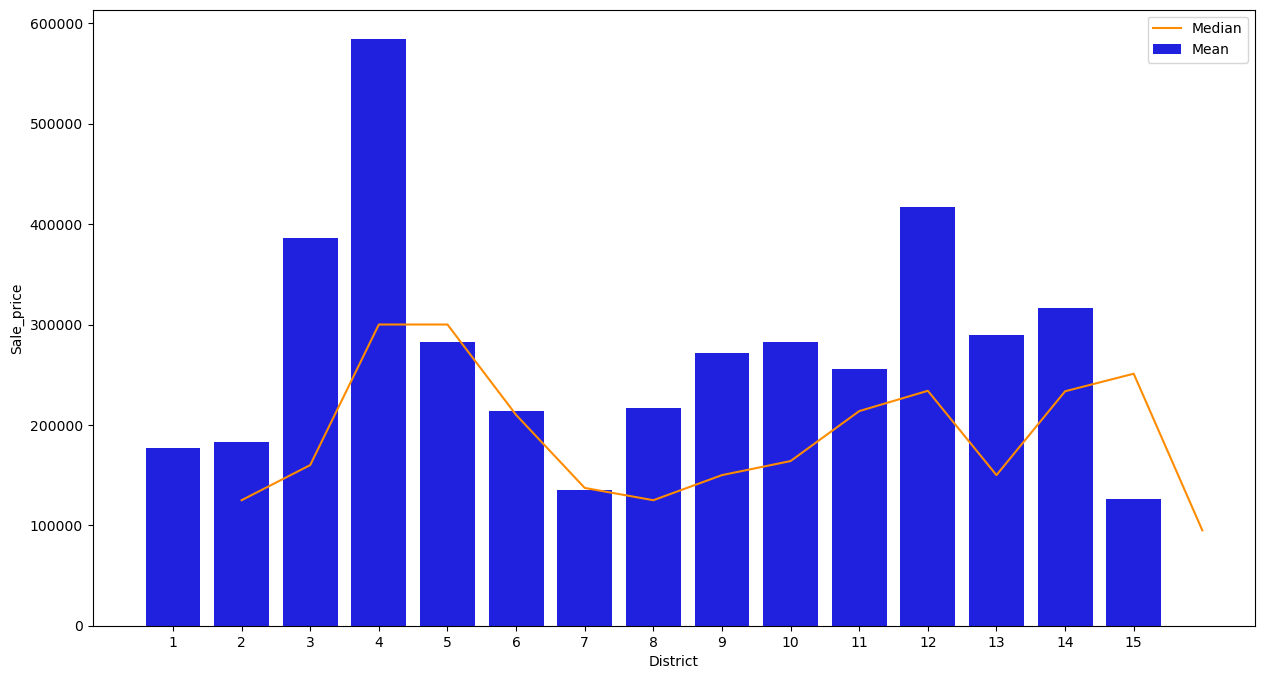

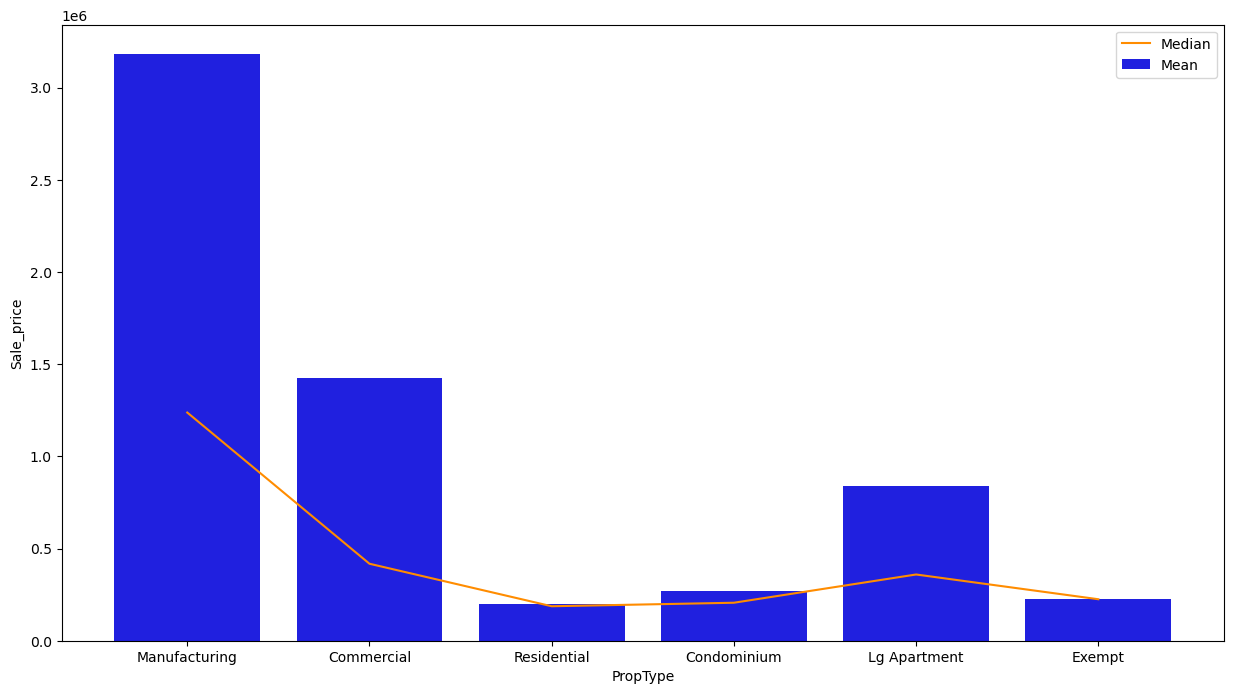

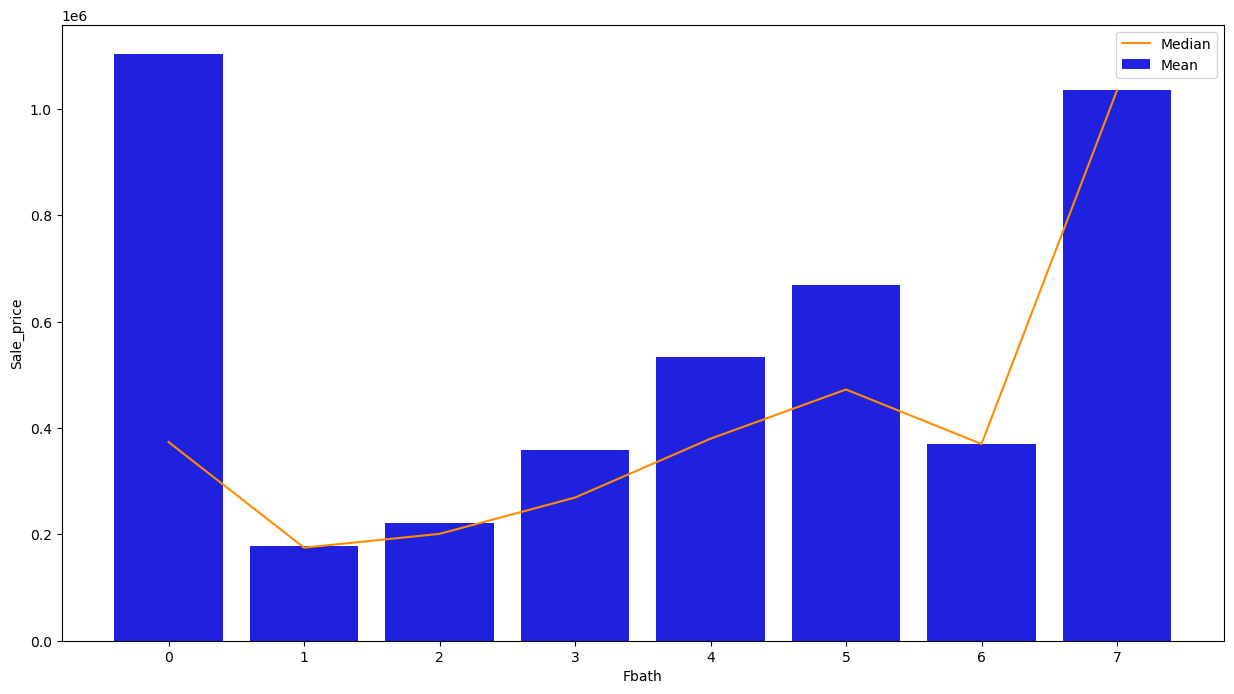

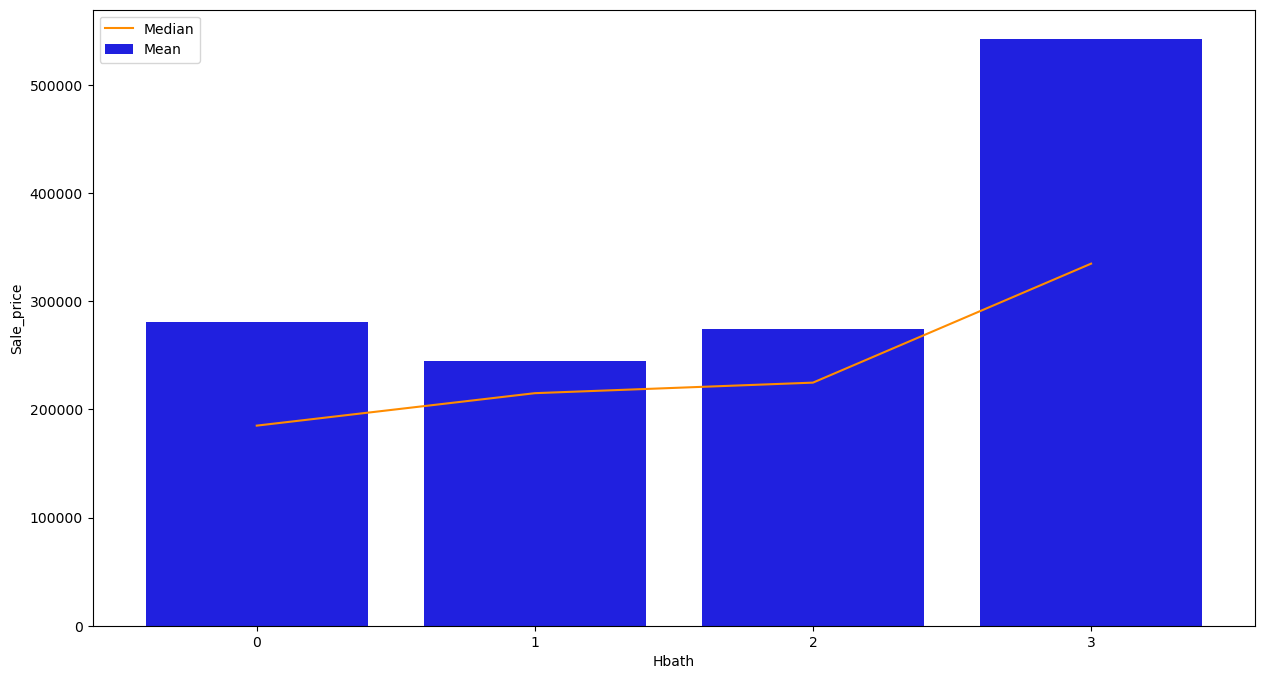

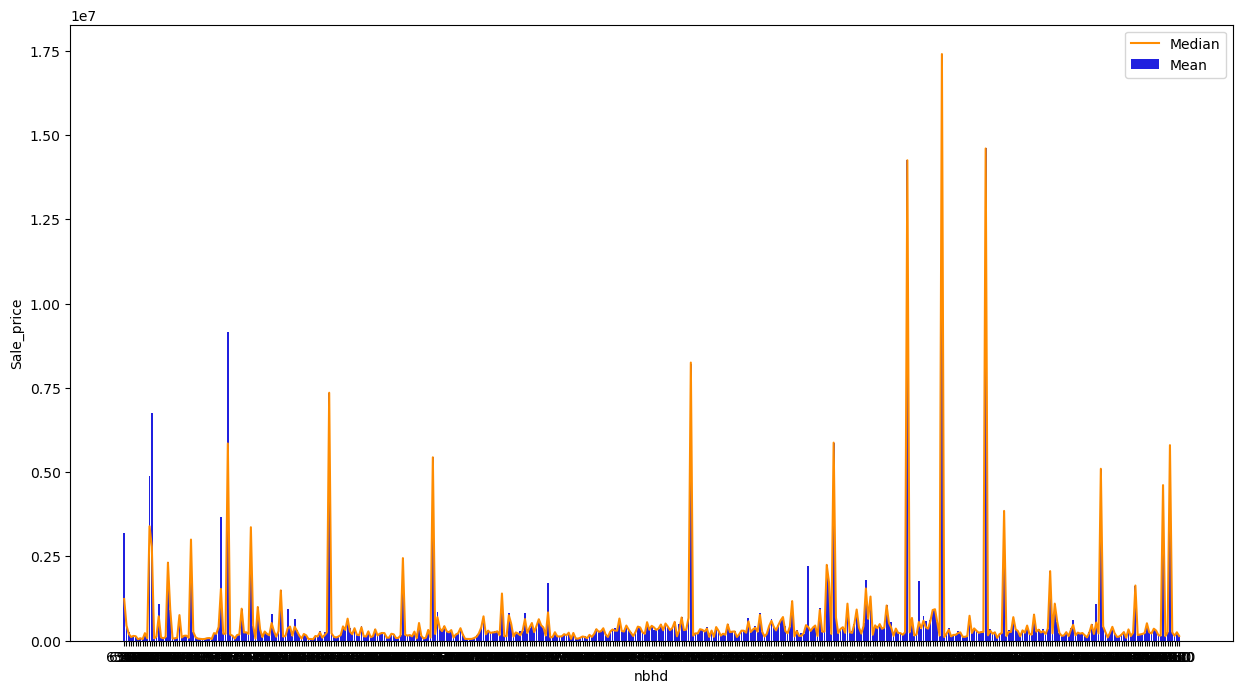

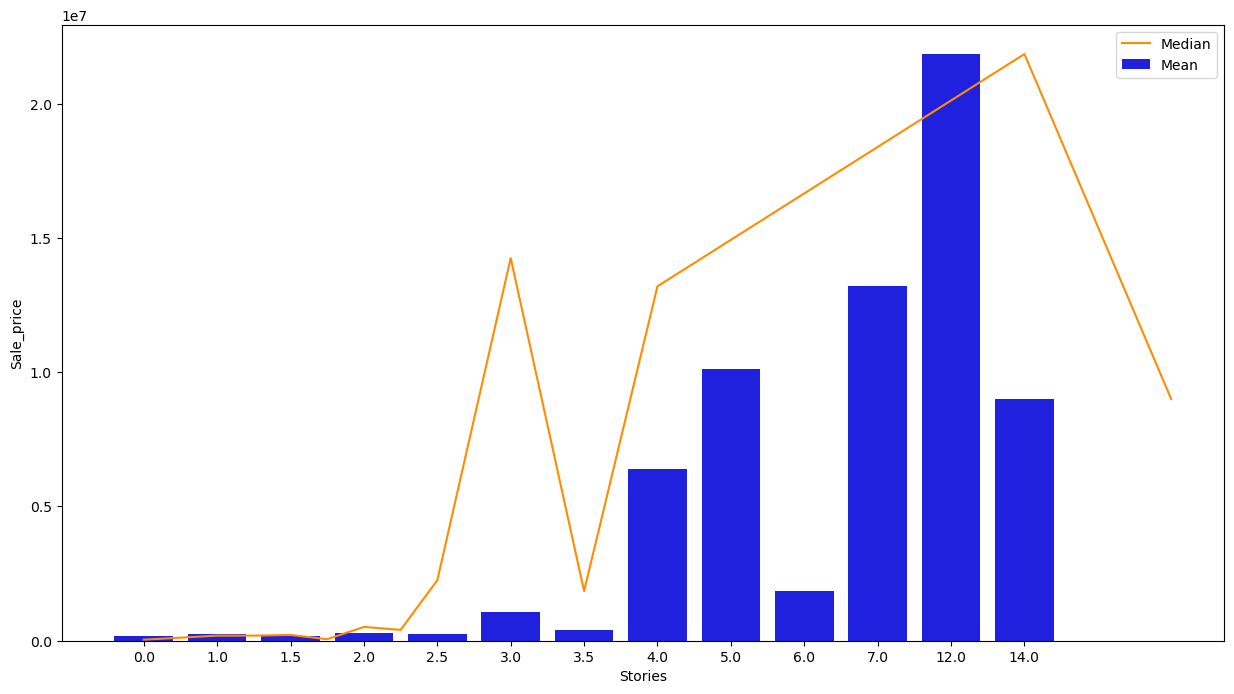

In [16]:
# Plotting the two columns with barplot due to amount of variety they offer
# Using Mean and Median do display differences, especially with prices the median-mean-spread supports a deeper understanding
col_barplot = ["District", "PropType", "Fbath", "Hbath", "nbhd", "Stories"]
for col in df[col_barplot]:
    ax = plt.subplots(figsize=(15, 8))
    ax = sns.barplot(
        x=col,
        y="Sale_price",
        data=df,
        estimator="mean",
        color="b",
        errorbar=None,
        label="Mean",
    )  # Show mean as barplot
    ax = sns.lineplot(
        x=col,
        y="Sale_price",
        data=df,
        estimator="median",
        color="darkorange",
        errorbar=None,
        label="Median",
    )  # Show median as lineplot
    ax.set(xlabel=col, ylabel="Sale_price")
    plt.show()


/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_59454/3615557956.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


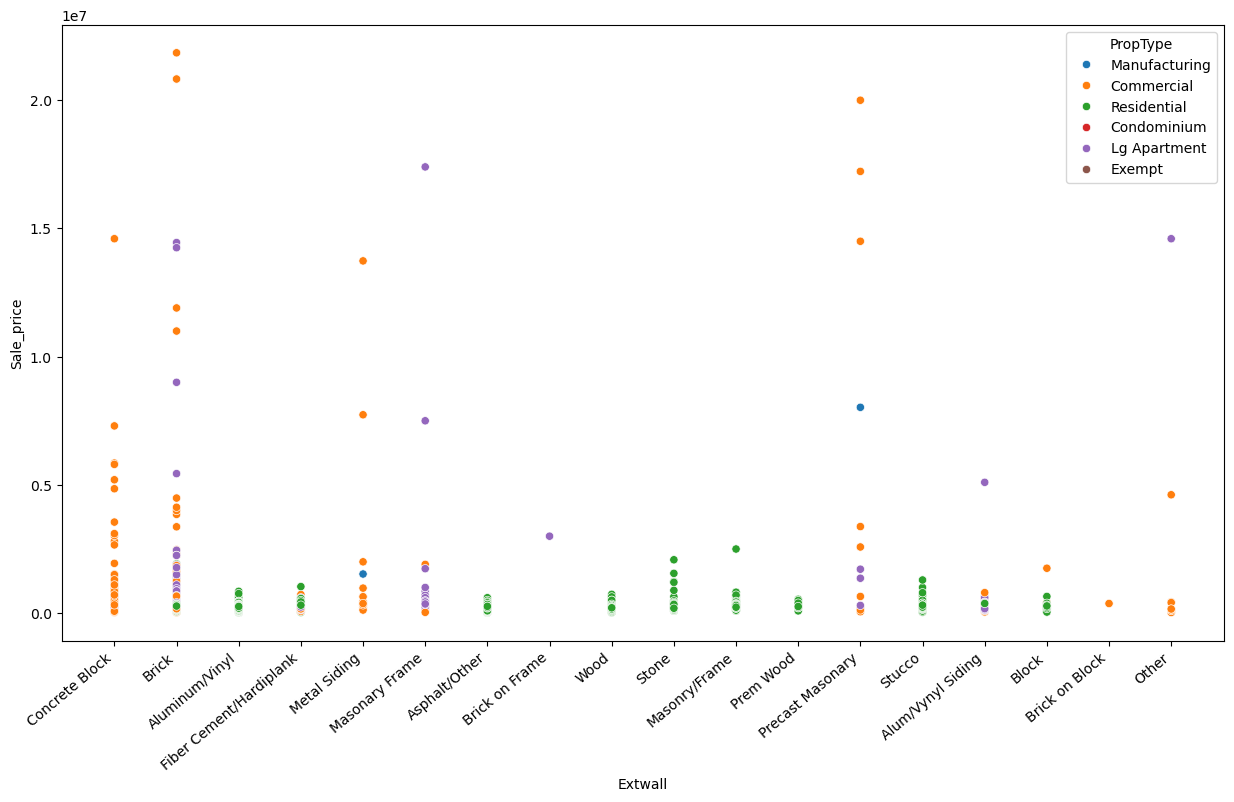

/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_59454/3615557956.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


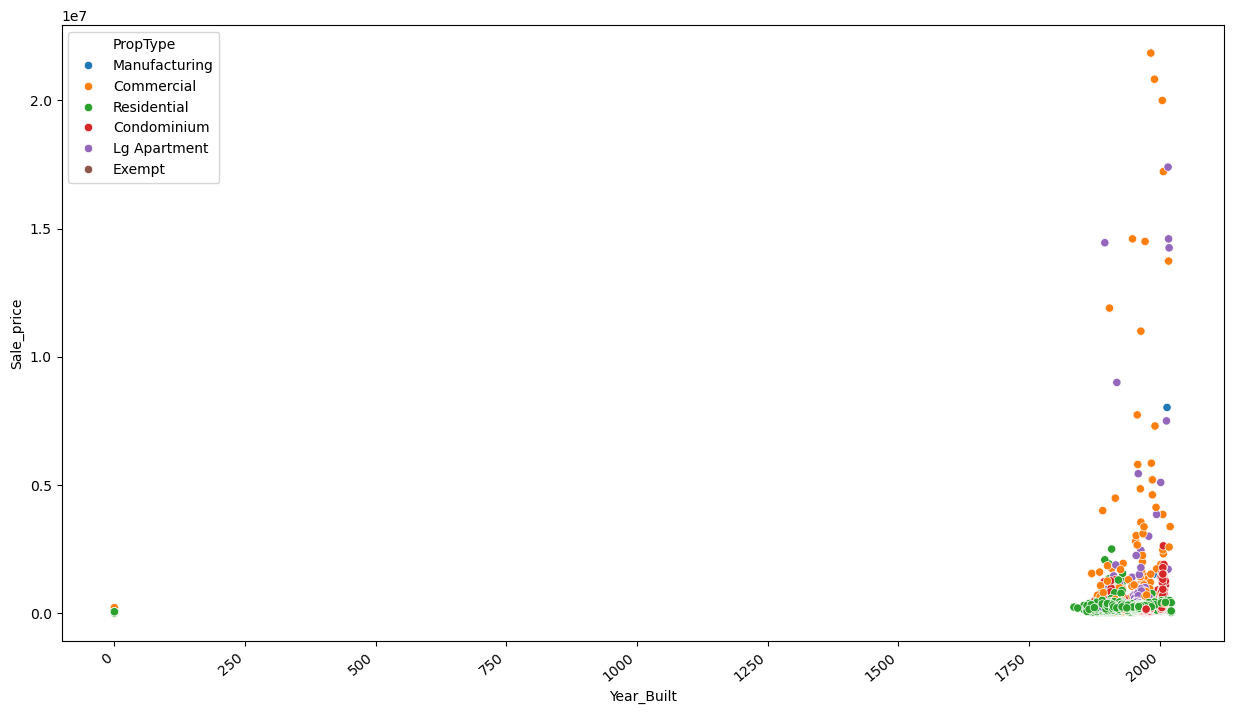

/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_59454/3615557956.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


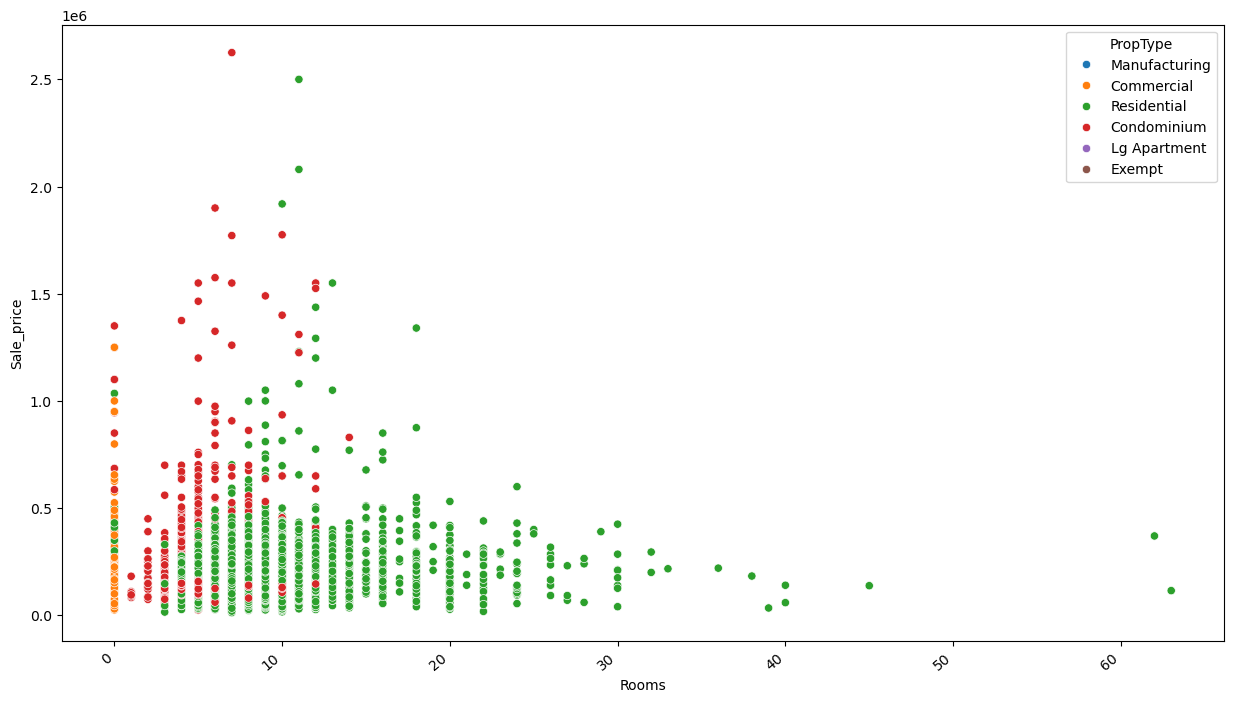

/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_59454/3615557956.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


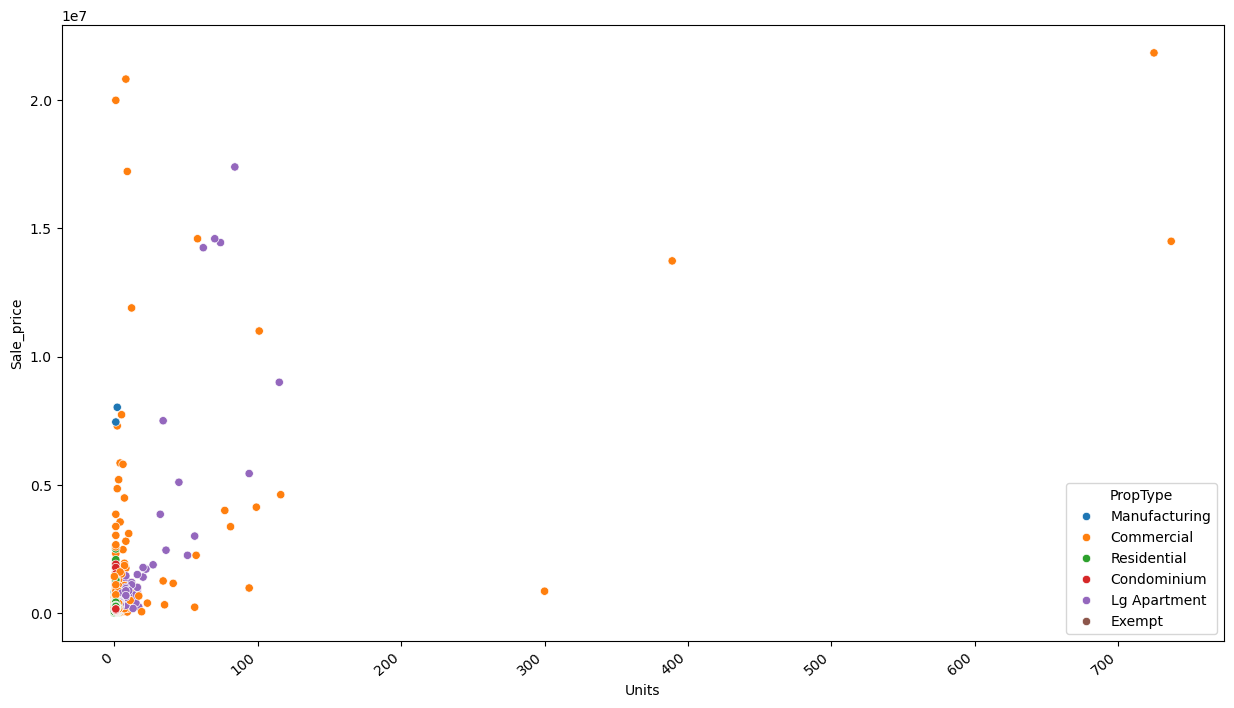

/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_59454/3615557956.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


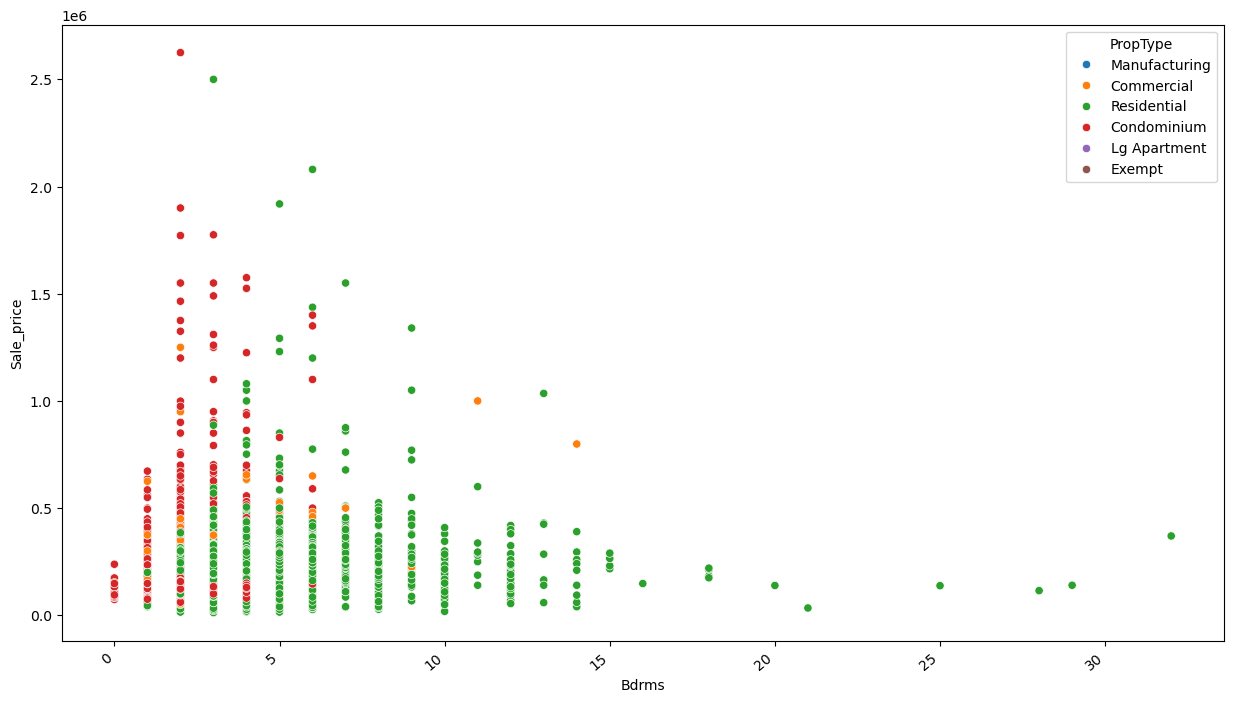

/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_59454/3615557956.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


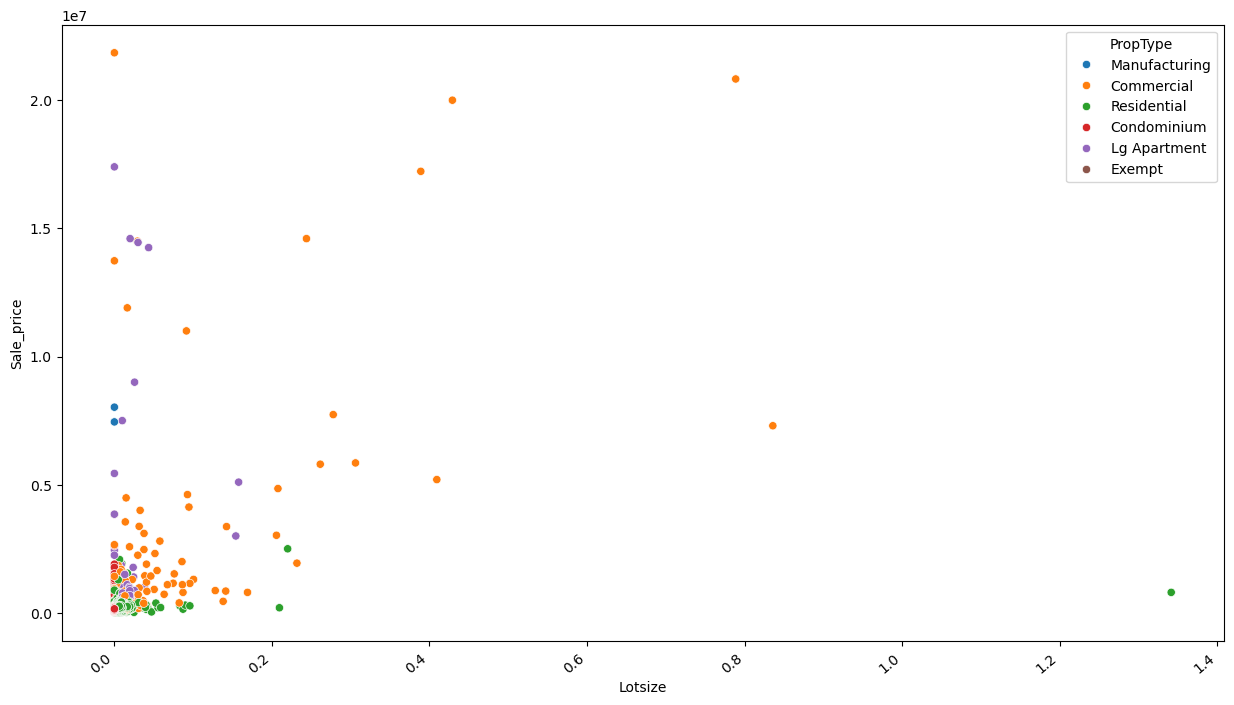

/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_59454/3615557956.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


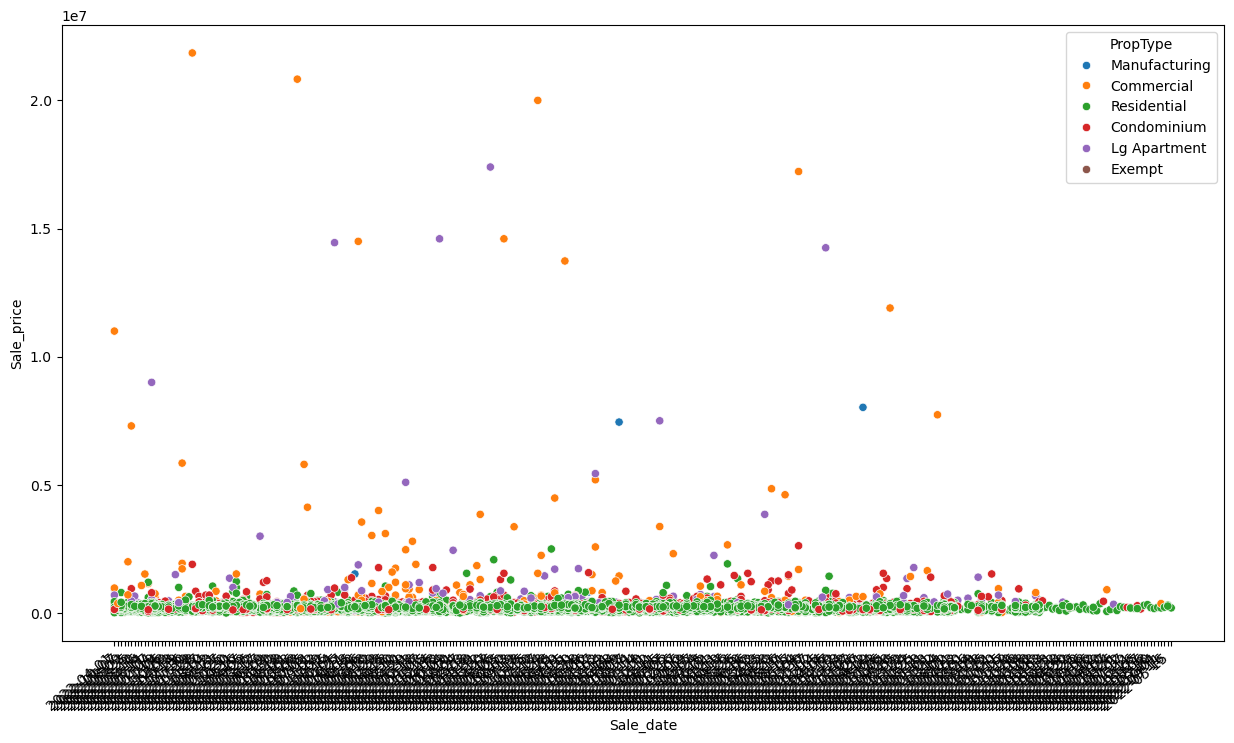

/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_59454/3615557956.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


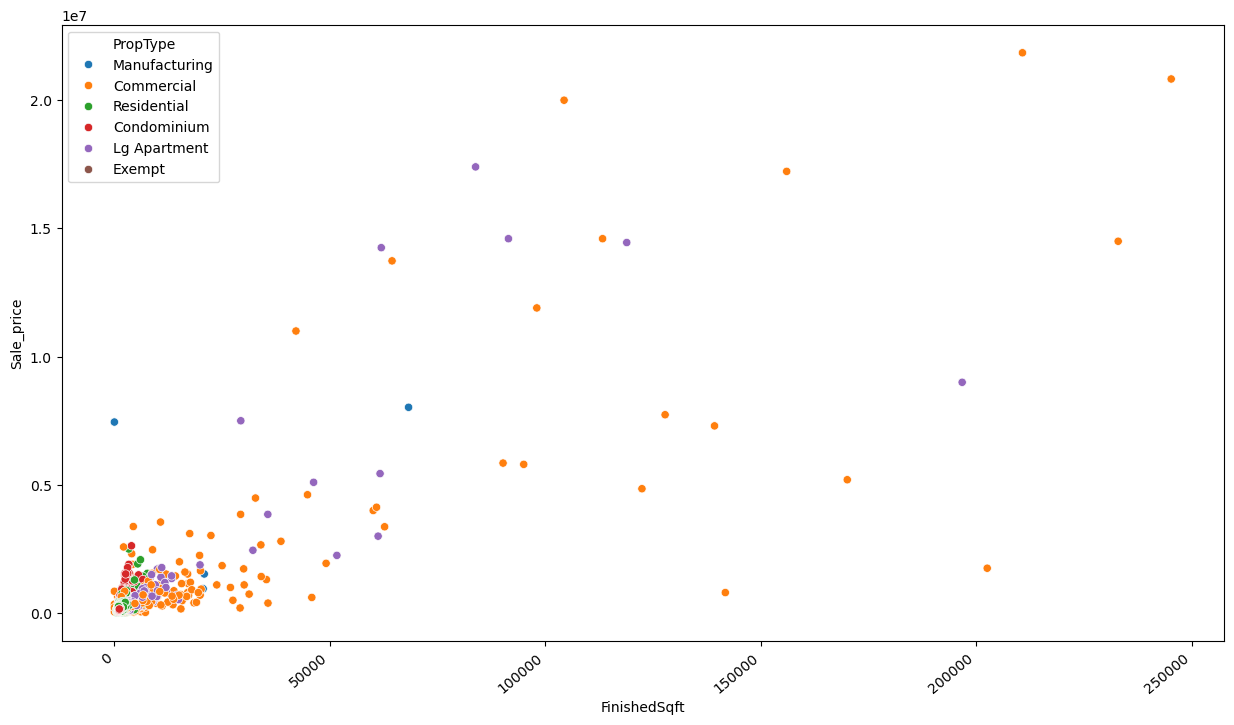

In [17]:
col_scatterplot = [
    "Extwall",
    "Year_Built",
    "Rooms",
    "Units",
    "Bdrms",
    "Lotsize",
    "Sale_date",
    "FinishedSqft",
]
for col in df[col_scatterplot]:
    plt.figure(figsize=(15, 8))
    ax = sns.scatterplot(
        x=col, y="Sale_price", data=df, color="b", hue="PropType"
    )  # Show as scatterplot, using PropType as categorical feature
    ax.set(xlabel=col, ylabel="Sale_price")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()
# The variable style has to many different values, which does not really allow to have a proper plot for it.
# Also the variable Style has to many different values for a categorical variable, which indicates that it's maybe limited in supporting our model approach!


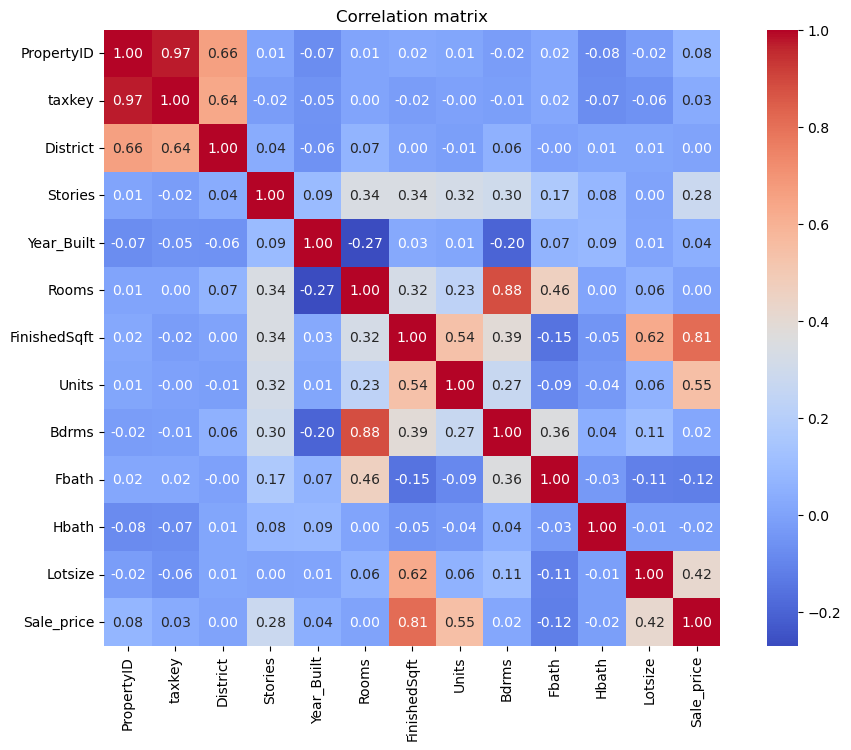

In [18]:
# Correlation matrix
df_corr = df.select_dtypes(include=["int64", "float64"]).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation matrix")
plt.show()


# Data Engineering

Explore Missing values: After data exploration, it's alreday clear that some variables ten dto have lots of nan values. For this variables we have to find a solution, such as imputing or very simple drop nan rows.

<Axes: >

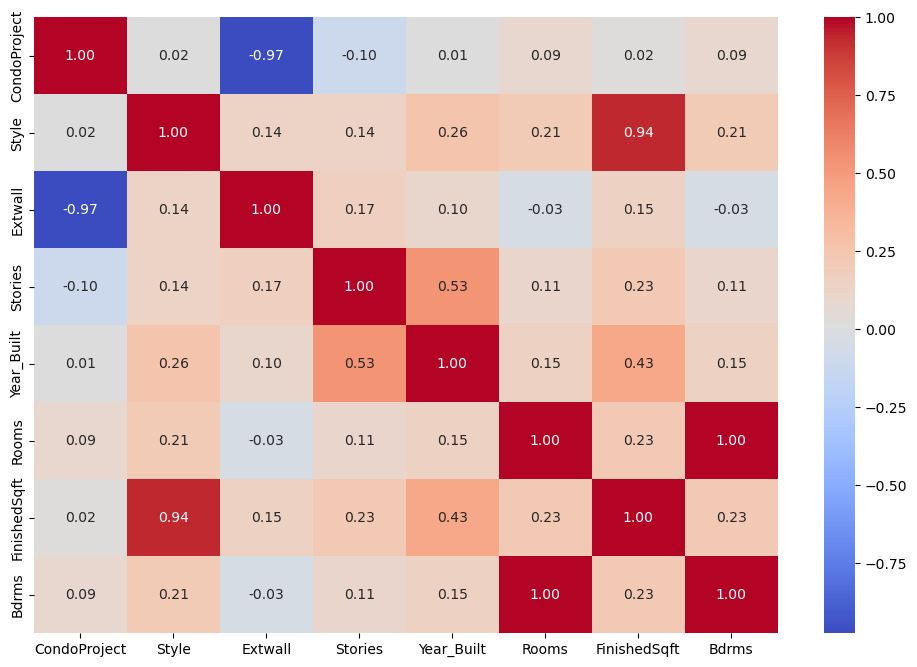

In [19]:
# Fisrt step for all variables
plt.figure(figsize=(12, 8))  # Check on nullity of correlation
sns.heatmap(df.loc[:, df.isnull().any()].isnull().corr(), annot=True, fmt=".2f", cmap="coolwarm")
# As we can see, there is no negative correlation, which indicates that a missing value for a certain variable does not imply a missing value for another.
# This techincally gives us a educated guess, if there are systematical correlations between missing values.


In [20]:

(df.isna().sum() / len(df))*100
# It seems to be mainly affect three variables: Extwall, Rooms and Bedrooms. Using the imputation methods available, we could just inpute the mean, median etc. but for categorical variables this seems to be a bit tricky.
# Therefor we could use a classifier to predict the missing categorical variable by other features.
# We also don't know if just a certain subset of data is missing due to bad data quality etc.


PropertyID       0.000000
PropType         0.000000
taxkey           0.000000
Address          0.000000
CondoProject    87.615449
District         0.000000
nbhd             0.000000
Style            0.293871
Extwall         12.958298
Stories          0.545760
Year_Built       0.153932
Rooms            6.199272
FinishedSqft     0.335852
Units            0.000000
Bdrms            6.199272
Fbath            0.000000
Hbath            0.000000
Lotsize          0.000000
Sale_date        0.000000
Sale_price       0.000000
dtype: float64

<Axes: >

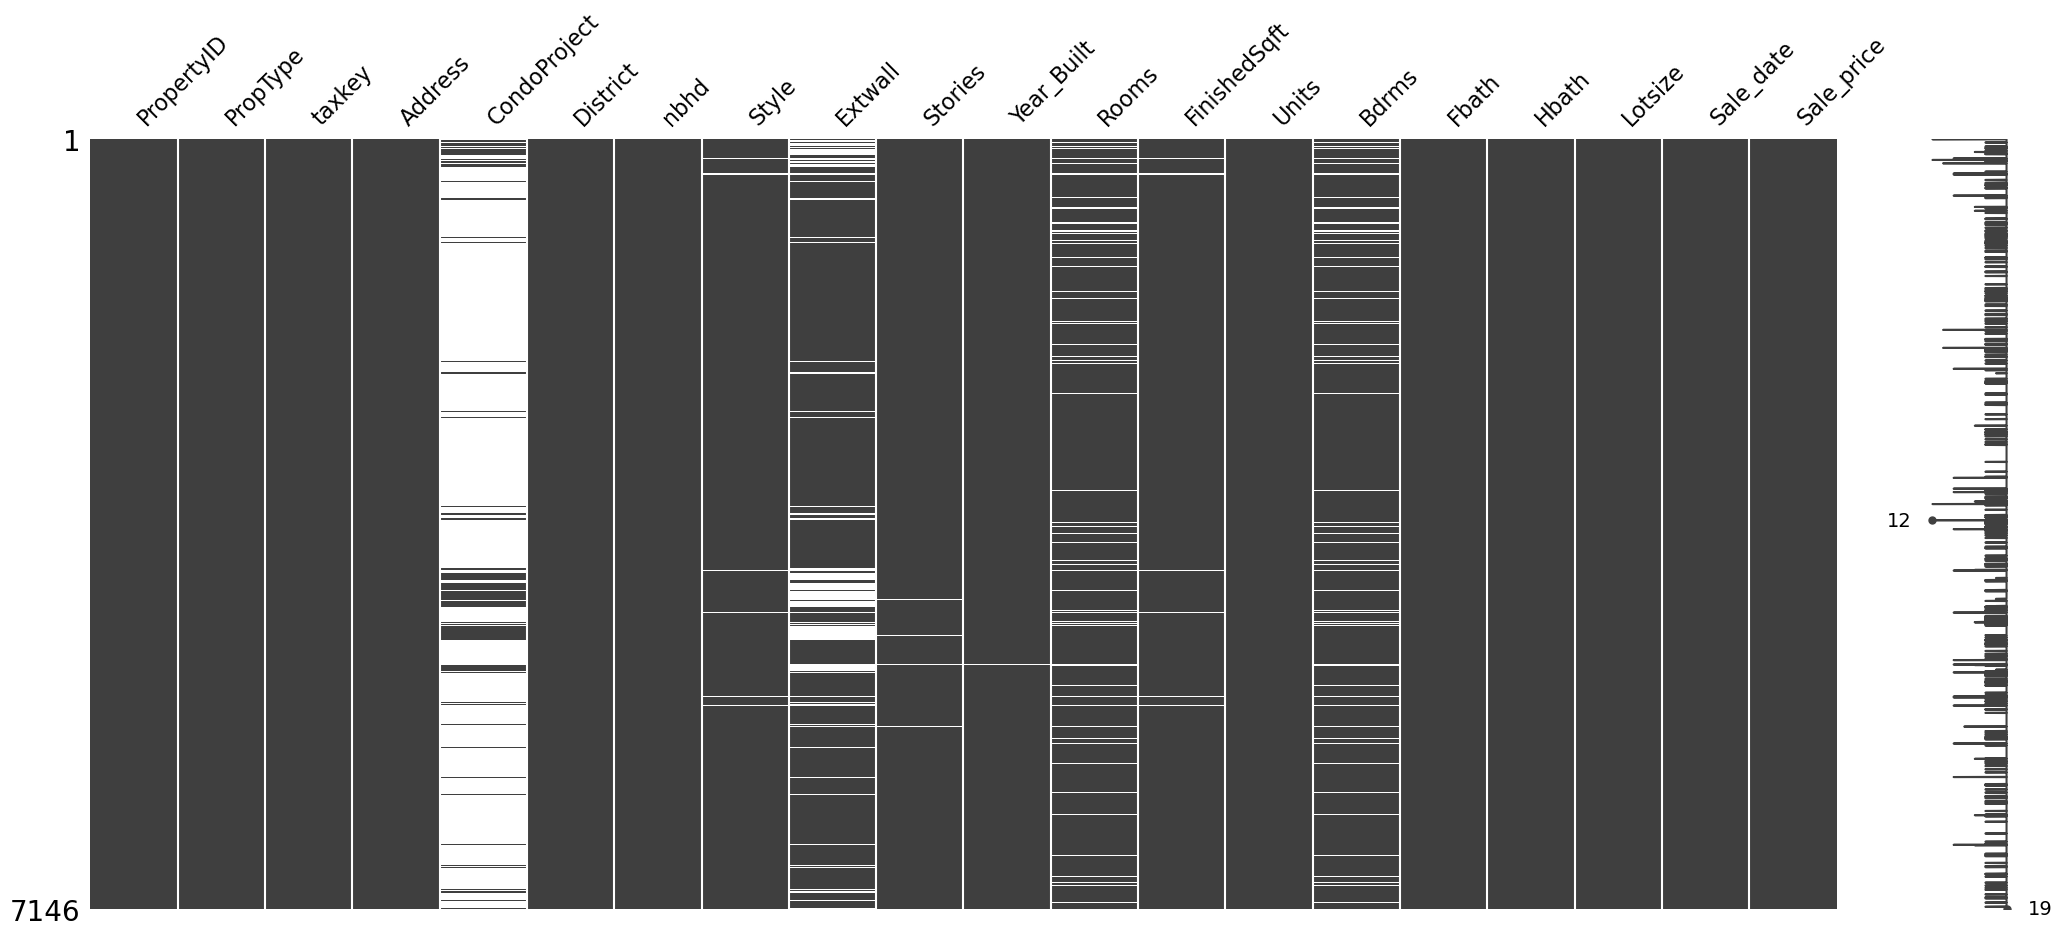

In [21]:
msno.matrix(df)  # Check on graphical view of systemtical missing data issues


<Axes: >

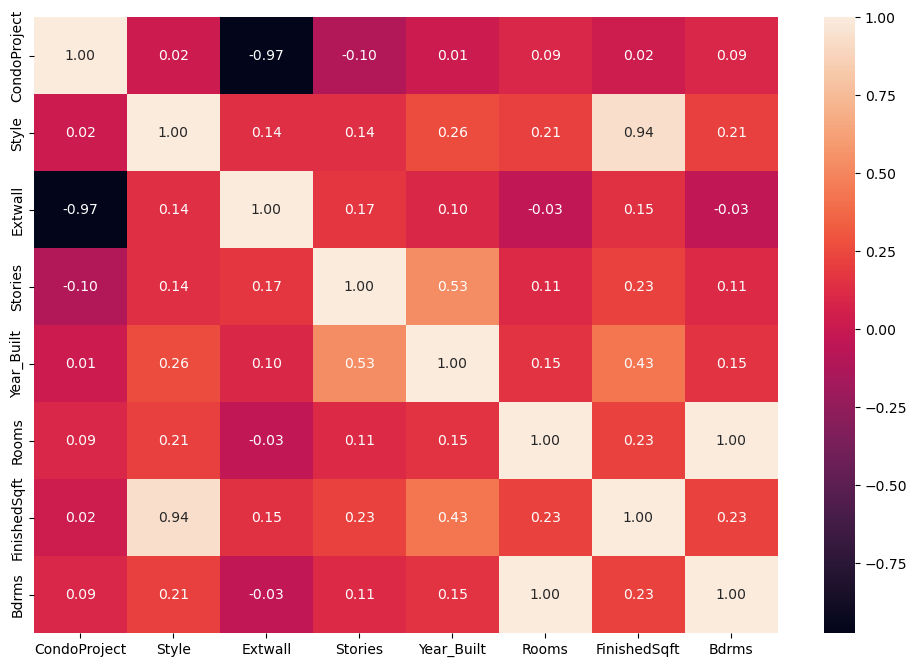

In [22]:
plt.figure(figsize=(12, 8))  # Check on nullity of correlation
sns.heatmap(df.loc[:, df.isnull().any()].isnull().corr(), annot=True, fmt=".2f")
# As we can see, there is no negative correlation, which indicates that a missing value for a certain variable does not imply a missing value for another.
# This techincally gives us a educated guess, if there are systematical correlations between missing values.


<Axes: >

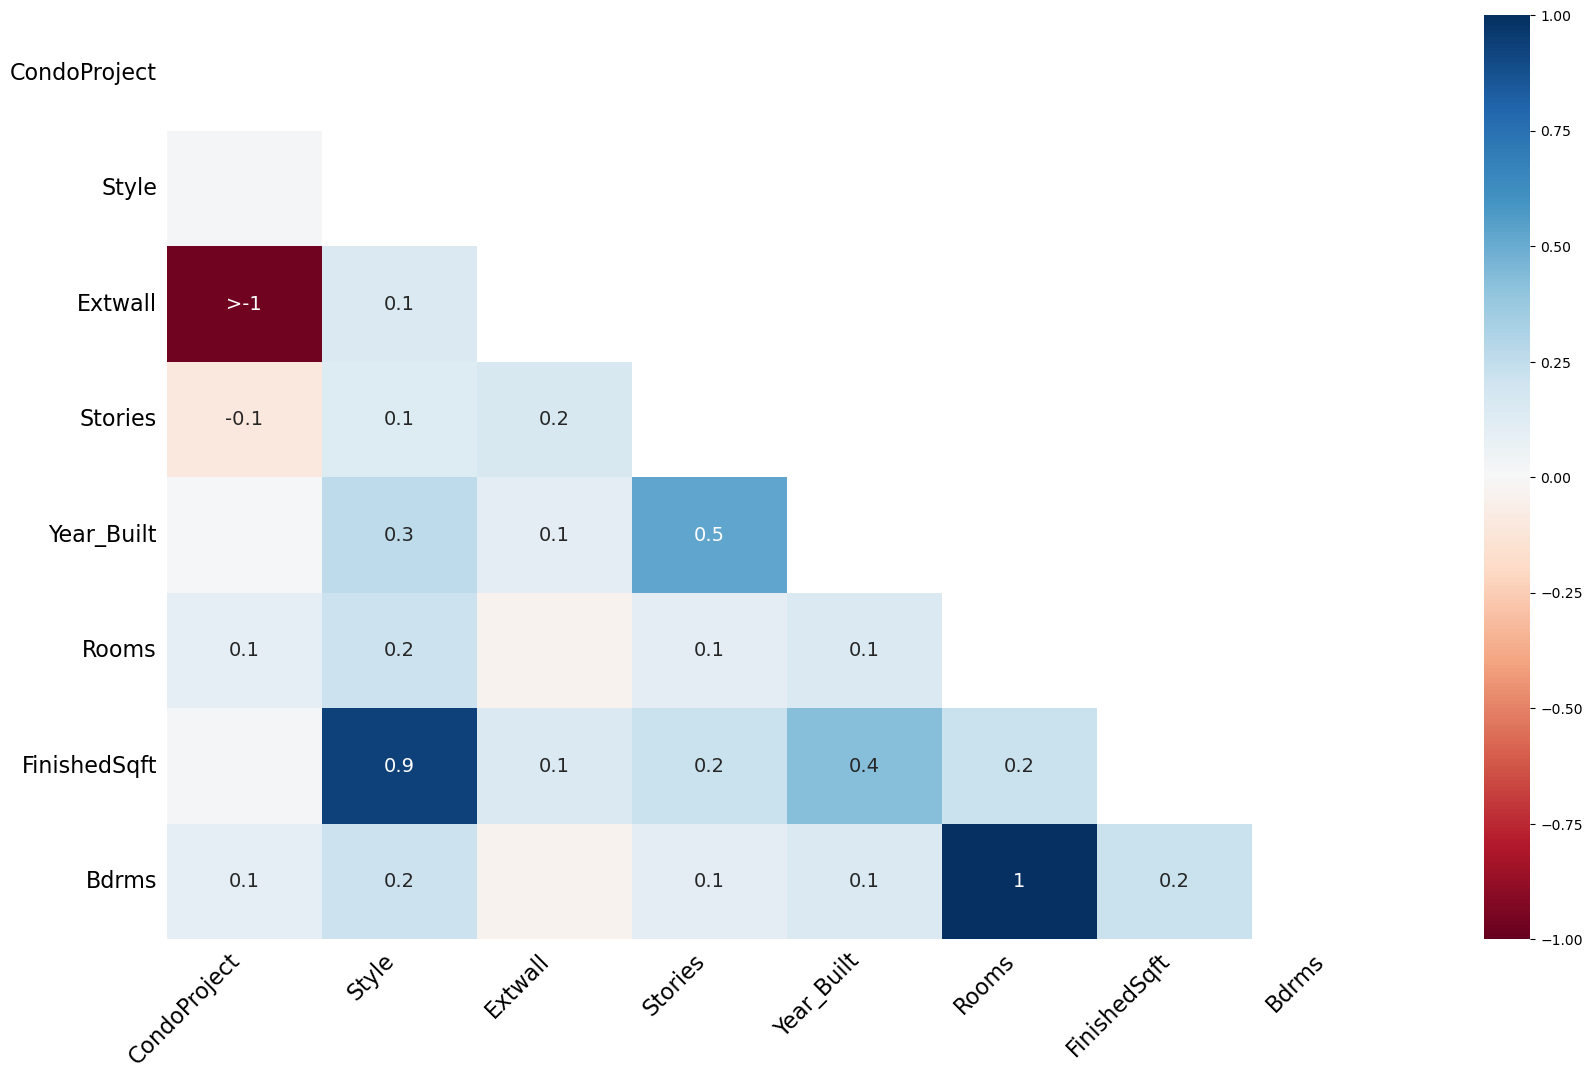

In [23]:
msno.heatmap(df)


<Axes: >

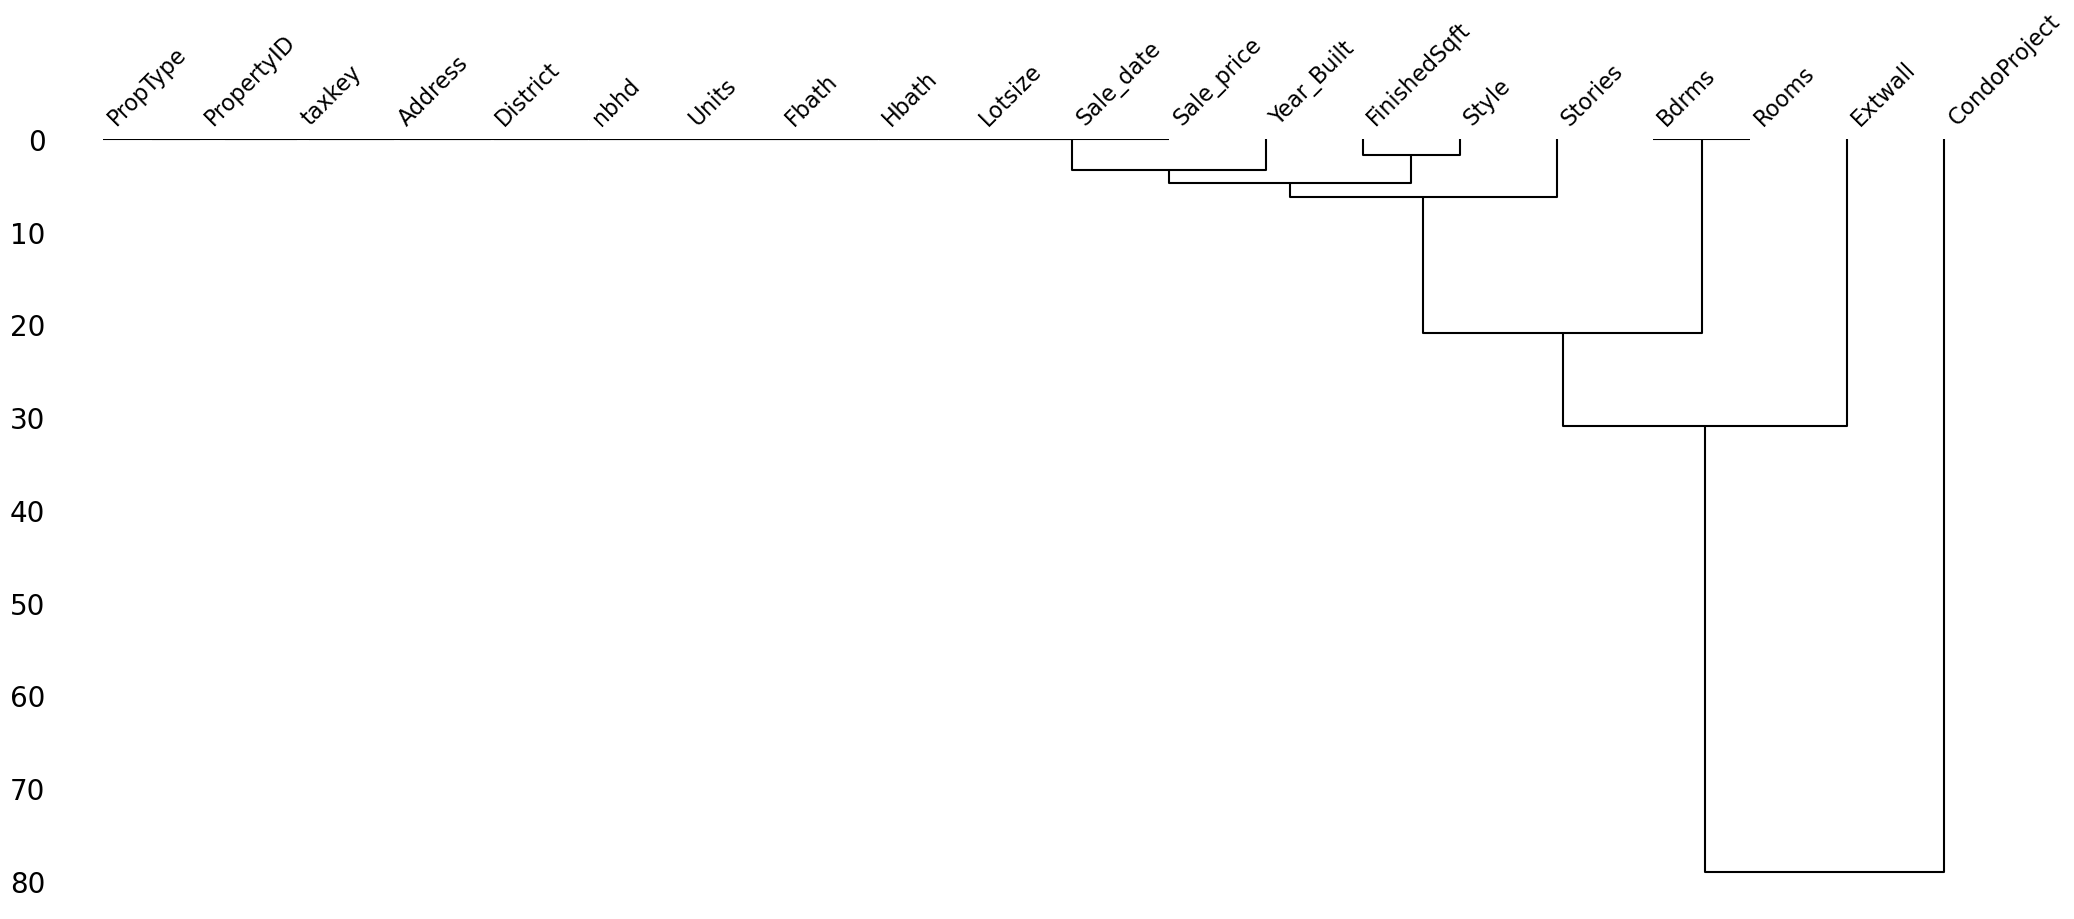

In [24]:
msno.dendrogram(df)
# We can see that Bedrooms and Rooms are always missing together, which makes sense ... if we don'z know how many rooms an appartment has, how should we know then how many bedrooms it has.
# We can also see, that if any information about the Rooms are missing and about the Style, that it's likely that the Extwall attribut is also not available.
# This leads us to the final clue, that Rooms and Bedrooms are Missing Data Not At Random (MNAR)
# Also Extrawall and Style seem to be Missing Data At Random (MAR), as they have some overlappings in being absent, same for Extrawall, Style, Rooms and Bedrooms all together
# Whereas Year_Built seems to be Missing Completely At Random (MCAR)
# See also: https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values


In [25]:
# First it's important to get a rough idea about the variables, which could influence the sales price
# Therefor a subset was built based on first assumptions
# These Variables are remaining + Sale_price as target variable
cols = [
    "District",
    "PropType",
    "Style",
    "nbhd",
    "FinishedSqft",
    "Fbath",
    "Hbath",
    "Extwall",
    "Year_Built",
    "Rooms",
    "Units",
    "Bdrms",
    "Lotsize",
    "Sale_date",
    "Sale_price",
    "Stories",
]
df[cols]


District       PropType                      Style  nbhd  FinishedSqft  \
0            9  Manufacturing           Service Building  6300       20600.0   
1            9     Commercial  Office Building - 1 Story  6202        9688.0   
2            9    Residential                        NaN    40           NaN   
3            9    Residential                      Ranch    40        1334.0   
4            9    Residential                      Ranch    40        1006.0   
...        ...            ...                        ...   ...           ...   
7141        13    Condominium       Low Rise 1-3 Stories  5360        1100.0   
7142        13    Condominium       Low Rise 1-3 Stories  5360        1379.0   
7143        13    Condominium       Low Rise 1-3 Stories  5360        1100.0   
7144        13    Condominium       Low Rise 1-3 Stories  5360        1100.0   
7145        13    Condominium       Low Rise 1-3 Stories  5360        1141.0   

      Fbath  Hbath         Extwall  Year_Built  Rooms  Units  Bdrms  Lotsize  \
0         0      0  Concrete Block      1978.0    NaN      6    NaN        0   
1         0      0           Brick      1982.0    NaN     23    NaN    35719   
2         0      0             NaN         NaN    NaN      0    NaN  1341648   
3         1      1  Aluminum/Vinyl      1959.0    6.0      1    3.0    83200   
4         1      0  Aluminum/Vinyl      1980.0   10.0      1    6.0     8303   
...     ...    ...             ...         ...    ...    ...    ...      ...   
7141      1      1             NaN      1974.0   10.0      1    4.0        1   
7142      1      1             NaN      1974.0    5.0      1    2.0        1   
7143      1      1             NaN      1974.0   10.0      1    4.0        1   
7144      1      1             NaN      1974.0    5.0      1    2.0        1   
7145      1      1             NaN      1974.0    5.0      1    2.0        1   

       Sale_date  Sale_price  Stories  
0     2022-04-01    950000.0      1.0  
1     2022-10-07    385000.0      1.0  
2     2022-01-07    800000.0      NaN  
3     2022-08-09    280000.0      1.0  
4     2022-05-23    233100.0      1.0  
...          ...         ...      ...  
7141  2022-03-11    125900.0      2.0  
7142  2022-10-28    150000.0      1.0  
7143  2022-03-15    130000.0      2.0  
7144  2022-12-30    123000.0      2.0  
7145  2022-07-08    157500.0      1.0  

[7146 rows x 16 columns]

# Pipeline

## Base settings/ definitions

In [26]:
set_config(transform_output="pandas")


In [27]:
# Define categorical and nummerical variables
cat_vars = ["Extwall", "PropType", "District", "nbhd", "Style"]
num_vars = [
    "Lotsize",
    "Rooms",
    "Bdrms",
    "Fbath",
    "Hbath",
    "FinishedSqft",
    "Units",
    "Stories",
]


In [28]:
# Train test split, 30% test data, 70% train data, using random_state to allow resapling with same results
X_train, X_test, y_train, y_test = train_test_split(
    df[cat_vars + num_vars], df["Sale_price"], test_size=0.3, random_state=0, shuffle=True
)


## Build Pipeline

Pre Processing steps

In [168]:
# Create the first pipeline with different steps for nummerical and categorical variables
pipe_num = Pipeline(
    [
        ("num_imp", SimpleImputer(strategy="most_frequent", add_indicator=False)),
        ("rob_num", RobustScaler(with_centering=True)),
    ]
)

pipe_cat = Pipeline(
    [
        (
            "cat_imp",
            SimpleImputer(
                strategy="constant", add_indicator=False, fill_value="missing"
            ),
        ),
        ("ohe_cat", OneHotEncoder(sparse_output=False, handle_unknown="ignore")),
    ]
)


In [169]:
# Use column transformer to allow different operations on different columns, such as using different steps for categorical and nummerical variables
# Setting "passthrough" allows to skip columns, which are not mentioned
ct = ColumnTransformer(
    [
        ("missing_vals", MissingIndicator(), X_train.columns),
        ("pipe_num", pipe_num, num_vars),
        ("pipe_cat", pipe_cat, cat_vars),
    ],
    remainder="passthrough",
)


In [170]:
ct


ColumnTransformer(remainder='passthrough',
                  transformers=[('missing_vals', MissingIndicator(),
                                 Index(['Lotsize', 'Total_Rooms', 'Bath', 'FinishedSqft', 'Units', 'Stories',
       'District', 'nbhd', 'Extwall'],
      dtype='object')),
                                ('pipe_num',
                                 Pipeline(steps=[('num_imp',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('rob_num', RobustScaler())]),
                                 ['Lotsize', 'Total_Rooms', 'Bath',
                                  'FinishedSqft', 'Units', 'Stories']),
                                ('pipe_cat',
                                 Pipeline(steps=[('cat_imp',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('ohe_cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['District', 'nbhd', 'Extwall'])])

In [171]:
# Adding PCA to column transformer and apply only for the new columns added by one hot encoder

# ct_pca = ColumnTransformer(
#    remainder="passtrough",
#    transformers=[("pca", PCA(), indices)],
# )
# # All columns with OHE start with letter pipe_cat, so only this columns are affected


In [172]:
# Add pre pipe
# pre_pipe = Pipeline([("pre", ct), ("pca", ct_pca)])


Adding PCA & Model

In [173]:
pre_pipe = Pipeline([("pre", ct), ("pca", PCA())])


In [174]:
# Merge all pipes and column transformer
pipe_final = Pipeline(
    [("pre", pre_pipe), ("model", RandomForestRegressor())]
)


In [175]:
# Check on the final picture of pipeline
pipe_final


Pipeline(steps=[('pre',
                 Pipeline(steps=[('pre',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('missing_vals',
                                                                   MissingIndicator(),
                                                                   Index(['Lotsize', 'Total_Rooms', 'Bath', 'FinishedSqft', 'Units', 'Stories',
       'District', 'nbhd', 'Extwall'],
      dtype='object')),
                                                                  ('pipe_num',
                                                                   Pipeline(steps=[('num_imp',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('rob_num',
                                                                                    RobustScaler())]),
                                                                   ['Lotsize',
                                                                    'Total_Rooms',
                                                                    'Bath',
                                                                    'FinishedSqft',
                                                                    'Units',
                                                                    'Stories']),
                                                                  ('pipe_cat',
                                                                   Pipeline(steps=[('cat_imp',
                                                                                    SimpleImputer(fill_value='missing',
                                                                                                  strategy='constant')),
                                                                                   ('ohe_cat',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   ['District',
                                                                    'nbhd',
                                                                    'Extwall'])])),
                                 ('pca', PCA())])),
                ('model', RandomForestRegressor())])

Final Pipeline

In [176]:
# Fit the pipeline without any hyperparameter tuning
pipe_final.fit(X_train, y_train)


Pipeline(steps=[('pre',
                 Pipeline(steps=[('pre',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('missing_vals',
                                                                   MissingIndicator(),
                                                                   Index(['Lotsize', 'Total_Rooms', 'Bath', 'FinishedSqft', 'Units', 'Stories',
       'District', 'nbhd', 'Extwall'],
      dtype='object')),
                                                                  ('pipe_num',
                                                                   Pipeline(steps=[('num_imp',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('rob_num',
                                                                                    RobustScaler())]),
                                                                   ['Lotsize',
                                                                    'Total_Rooms',
                                                                    'Bath',
                                                                    'FinishedSqft',
                                                                    'Units',
                                                                    'Stories']),
                                                                  ('pipe_cat',
                                                                   Pipeline(steps=[('cat_imp',
                                                                                    SimpleImputer(fill_value='missing',
                                                                                                  strategy='constant')),
                                                                                   ('ohe_cat',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   ['District',
                                                                    'nbhd',
                                                                    'Extwall'])])),
                                 ('pca', PCA())])),
                ('model', RandomForestRegressor())])

In [177]:
# Predict X_test
pipe_final.predict(X_test)


array([651694.9,  67890. , 203084. , ..., 144485. , 197060. , 328320. ])

In [178]:
# Check on the score
print(pipe_final.score(X_train, y_train))
print(pipe_final.score(X_test, y_test))
print(
    "Train-Test loss of pipeline: "
    + str(pipe_final.score(X_train, y_train) - pipe_final.score(X_test, y_test))
)


0.9324171922910697
0.744848628605757
Train-Test loss of pipeline: 0.18756856368531272


In [179]:
# Get all steps of pipeline contrsuct as string
pipe_final.named_steps


{'pre': Pipeline(steps=[('pre',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('missing_vals',
                                                   MissingIndicator(),
                                                   Index(['Lotsize', 'Total_Rooms', 'Bath', 'FinishedSqft', 'Units', 'Stories',
        'District', 'nbhd', 'Extwall'],
       dtype='object')),
                                                  ('pipe_num',
                                                   Pipeline(steps=[('num_imp',
                                                                    SimpleImputer(strategy='most_frequent')),
                                                                   ('rob_num',
                                                                    RobustScaler())]),
                                                   ['Lotsize', 'Total_Rooms',
                                                    'Bath', 'FinishedSqft',
    

Using GridSearchCV

In [180]:
##Define all params for GridSearchCV to find best nodel approach

param_grid = [
    {
        "model": [DecisionTreeRegressor()],
        "pre__pca__n_components": [0.8, 0.9, 0.95],
        "model__max_depth": [None, 5, 10, 20],
        "model__min_samples_split": [5, 10, 15],
        "model__min_samples_leaf": [1, 5, 15],
        "model__max_features": ["log2", "sqrt"],
        "model__criterion": ["friedman_mse"],
        "model__random_state": [42],
        "model__splitter": ["best", "random"],
    }
]


In [181]:
# Define all params for GridSearchCV to find best nodel approach
grid_search_reg_tree = GridSearchCV(
    pipe_final,
    param_grid,
    verbose=2,
    cv=4,
    scoring="r2",
    n_jobs=-1,
    return_train_score=True,
)


In [182]:
# Fit the model with GridSearchCV
grid_search_reg_tree.fit(X_train, y_train)


Fitting 4 folds for each of 432 candidates, totalling 1728 fits


/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas re

[CV] END model=DecisionTreeRegressor(), model__criterion=friedman_mse, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__random_state=42, model__splitter=best, pre__pca__n_components=0.8; total time=   0.6s
[CV] END model=DecisionTreeRegressor(), model__criterion=friedman_mse, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__random_state=42, model__splitter=best, pre__pca__n_components=0.9; total time=   0.6s
[CV] END model=DecisionTreeRegressor(), model__criterion=friedman_mse, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__random_state=42, model__splitter=best, pre__pca__n_components=0.9; total time=   0.6s
[CV] END model=DecisionTreeRegressor(), model__criterion=friedman_mse, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__random_state=4

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('pre',
                                        Pipeline(steps=[('pre',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('missing_vals',
                                                                                          MissingIndicator(),
                                                                                          Index(['Lotsize', 'Total_Rooms', 'Bath', 'FinishedSqft', 'Units', 'Stories',
       'District', 'nbhd', 'Extwall'],
      dtype='object')),
                                                                                         ('pipe_num',
                                                                                          Pipeline(steps=[('num_imp',
                                                                                                           SimpleImputer(strategy='most_...
                                                          random_state=42)],
                          'model__criterion': ['friedman_mse'],
                          'model__max_depth': [None, 5, 10, 20],
                          'model__max_features': ['log2', 'sqrt'],
                          'model__min_samples_leaf': [1, 5, 15],
                          'model__min_samples_split': [5, 10, 15],
                          'model__random_state': [42],
                          'model__splitter': ['best', 'random'],
                          'pre__pca__n_components': [0.8, 0.9, 0.95]}],
             return_train_score=True, scoring='r2', verbose=2)

In [183]:
# Access the best model and evaluate its performance
best_model = grid_search_reg_tree.best_estimator_
best_params = grid_search_reg_tree.best_params_
best_model_name = best_model.named_steps["model"].__class__.__name__
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
print(f"The best model selected by GridSearchCV is: {best_model_name}")
print(f"{best_model_name} train score: {train_score}")
print(f"{best_model_name} test score: {test_score}")
print(f"train test loss :" + str(train_score - test_score))
print(f"best params are: {best_params}")


The best model selected by GridSearchCV is: DecisionTreeRegressor
DecisionTreeRegressor train score: 0.7234157925595941
DecisionTreeRegressor test score: 0.6533662724046984
train test loss :0.07004952015489574
best params are: {'model': DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      max_features='log2', min_samples_split=15,
                      random_state=42), 'model__criterion': 'friedman_mse', 'model__max_depth': 5, 'model__max_features': 'log2', 'model__min_samples_leaf': 1, 'model__min_samples_split': 15, 'model__random_state': 42, 'model__splitter': 'best', 'pre__pca__n_components': 0.8}


Evaluate Pipeline/ Model

In [184]:
pipe_final.set_params(**best_params)


Pipeline(steps=[('pre',
                 Pipeline(steps=[('pre',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('missing_vals',
                                                                   MissingIndicator(),
                                                                   Index(['Lotsize', 'Total_Rooms', 'Bath', 'FinishedSqft', 'Units', 'Stories',
       'District', 'nbhd', 'Extwall'],
      dtype='object')),
                                                                  ('pipe_num',
                                                                   Pipeline(steps=[('num_imp',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('rob_num',
                                                                                    Robus...
                                                                   Pipeline(steps=[('cat_imp',
                                                                                    SimpleImputer(fill_value='missing',
                                                                                                  strategy='constant')),
                                                                                   ('ohe_cat',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   ['District',
                                                                    'nbhd',
                                                                    'Extwall'])])),
                                 ('pca', PCA(n_components=0.8))])),
                ('model',
                 DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                                       max_features='log2',
                                       min_samples_split=15,
                                       random_state=42))])

In [185]:
pipe_final.fit(X_train, y_train)


Pipeline(steps=[('pre',
                 Pipeline(steps=[('pre',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('missing_vals',
                                                                   MissingIndicator(),
                                                                   Index(['Lotsize', 'Total_Rooms', 'Bath', 'FinishedSqft', 'Units', 'Stories',
       'District', 'nbhd', 'Extwall'],
      dtype='object')),
                                                                  ('pipe_num',
                                                                   Pipeline(steps=[('num_imp',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('rob_num',
                                                                                    Robus...
                                                                   Pipeline(steps=[('cat_imp',
                                                                                    SimpleImputer(fill_value='missing',
                                                                                                  strategy='constant')),
                                                                                   ('ohe_cat',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   ['District',
                                                                    'nbhd',
                                                                    'Extwall'])])),
                                 ('pca', PCA(n_components=0.8))])),
                ('model',
                 DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                                       max_features='log2',
                                       min_samples_split=15,
                                       random_state=42))])

In [186]:
# Check on in sample MAPE --> overfitting/ underfitting trade off
train_predictions = pipe_final.predict(X_train)
mape = mean_absolute_percentage_error(y_train, train_predictions) * 100
mse = mean_squared_error(y_train, train_predictions)
mae = mean_absolute_error(y_train, train_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, train_predictions)
print(f"{best_model_name} In-sample mape with {mape:.2f}%")
print(f"{best_model_name} In-sample mae with {mae:.2f}")
print(f"{best_model_name} In-sample mse with {mse:.2f}")
print(f"{best_model_name} In-sample rmse with {rmse:.2f}")
print(f"{best_model_name} In-sample r2 with {r2:.2f}")


DecisionTreeRegressor In-sample mape with 64.99%
DecisionTreeRegressor In-sample mae with 116391.76
DecisionTreeRegressor In-sample mse with 148870093430.85
DecisionTreeRegressor In-sample rmse with 385836.87
DecisionTreeRegressor In-sample r2 with 0.72


In [187]:
# Check on in sample MAPE --> overfitting/ underfitting trade off
test_predictions = pipe_final.predict(X_test)
mape = mean_absolute_percentage_error(y_test, test_predictions) * 100
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, train_predictions)
print(f"{best_model_name} Out-of-sample mape with {mape:.2f}%")
print(f"{best_model_name} Out-of-sample mae with {mae:.2f}")
print(f"{best_model_name} Out-of-sample mse with {mse:.2f}")
print(f"{best_model_name} Out-of-sample rmse with {rmse:.2f}")
print(f"{best_model_name} Out-of-sample r2 with {r2:.2f}")

# The model seems to be hardly overfitted, as ist has almost no error in train but >50% in test


DecisionTreeRegressor Out-of-sample mape with 64.01%
DecisionTreeRegressor Out-of-sample mae with 125720.99
DecisionTreeRegressor Out-of-sample mse with 249857415434.37
DecisionTreeRegressor Out-of-sample rmse with 499857.40
DecisionTreeRegressor Out-of-sample r2 with 0.72


In [188]:
# Safe as dataframe
cv_results_reg_tree = pd.DataFrame(grid_search_reg_tree.cv_results_)
cv_results_reg_tree


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.598996      0.021044         0.035816        0.018541   
1         0.606404      0.018273         0.034886        0.011373   
2         0.653537      0.173960         0.022141        0.004502   
3         0.722108      0.026545         0.024757        0.001030   
4         0.654215      0.054558         0.019088        0.005204   
..             ...           ...              ...             ...   
427       0.585295      0.025014         0.047423        0.017303   
428       0.589996      0.024870         0.026151        0.007131   
429       0.585765      0.053875         0.032031        0.018945   
430       0.564417      0.017834         0.027186        0.009211   
431       0.462561      0.040013         0.016773        0.008084   

                                           param_model param_model__criterion  \
0    DecisionTreeRegressor(criterion='friedman_mse'...           friedman_mse   
1    DecisionTreeRegressor(criterion='friedman_mse'...           friedman_mse   
2    DecisionTreeRegressor(criterion='friedman_mse'...           friedman_mse   
3    DecisionTreeRegressor(criterion='friedman_mse'...           friedman_mse   
4    DecisionTreeRegressor(criterion='friedman_mse'...           friedman_mse   
..                                                 ...                    ...   
427  DecisionTreeRegressor(criterion='friedman_mse'...           friedman_mse   
428  DecisionTreeRegressor(criterion='friedman_mse'...           friedman_mse   
429  DecisionTreeRegressor(criterion='friedman_mse'...           friedman_mse   
430  DecisionTreeRegressor(criterion='friedman_mse'...           friedman_mse   
431  DecisionTreeRegressor(criterion='friedman_mse'...           friedman_mse   

    param_model__max_depth param_model__max_features  \
0                     None                      log2   
1                     None                      log2   
2                     None                      log2   
3                     None                      log2   
4                     None                      log2   
..                     ...                       ...   
427                     20                      sqrt   
428                     20                      sqrt   
429                     20                      sqrt   
430                     20                      sqrt   
431                     20                      sqrt   

    param_model__min_samples_leaf param_model__min_samples_split  ...  \
0                               1                              5  ...   
1                               1                              5  ...   
2                               1                              5  ...   
3                               1                              5  ...   
4                               1                              5  ...   
..                            ...                            ...  ...   
427                            15                             15  ...   
428                            15                             15  ...   
429                            15                             15  ...   
430                            15                             15  ...   
431                            15                             15  ...   

    split3_test_score mean_test_score std_test_score rank_test_score  \
0           -0.115179        0.298098       0.283426             173   
1           -0.115179        0.424243       0.345038              45   
2            0.231124        0.400557       0.222763              55   
3            0.005586        0.390314       0.245687              75   
4            0.005586        0.221582       0.364892             261   
..                ...             ...            ...             ...   
427          0.073711        0.287664       0.191574             215   
428          0.415538        0.292834       0.073221             197   
429  

Visualizations

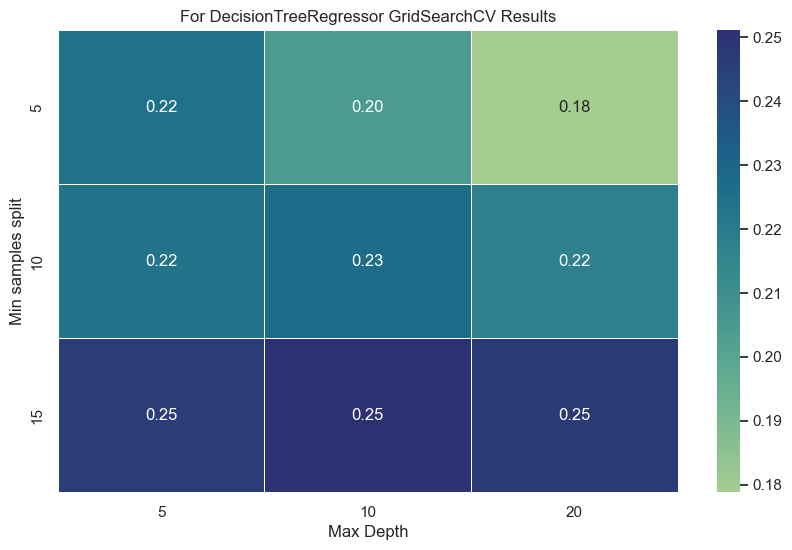

In [189]:
# Create the heatmap

best_model_name = best_model.named_steps["model"].__class__.__name__

heatmap_data = cv_results_reg_tree.pivot_table(
    index="param_model__min_samples_split",
    columns="param_model__max_depth",
    values="mean_test_score",
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="crest", fmt=".2f", linewidths=0.5)
plt.title(f"For {best_model_name} GridSearchCV Results")
plt.xlabel("Max Depth")
plt.ylabel("Min samples split")
plt.show()


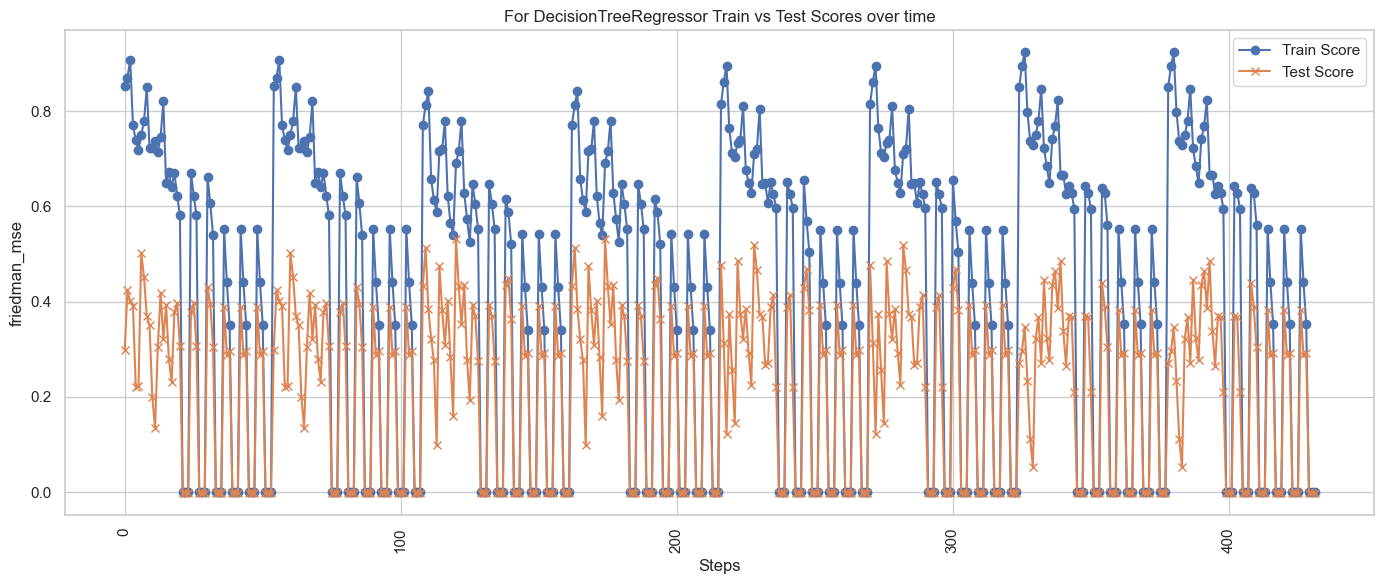

In [190]:
best_model_name = best_model.named_steps["model"].__class__.__name__
error_function = cv_results_reg_tree["param_model__criterion"][0]
results = cv_results_reg_tree

# Extract parameter values and scores
train_scores = results["mean_train_score"]
test_scores = results["mean_test_score"]

# Plotting
plt.figure(figsize=(14, 6))

# Plot train scores
plt.plot(range(len(train_scores)), train_scores, label="Train Score", marker="o")

# Plot test scores
plt.plot(range(len(test_scores)), test_scores, label="Test Score", marker="x")

# Customize plot
plt.xticks(rotation=90)
plt.xlabel("Steps")
plt.ylabel(f"{error_function}")
plt.title(f"For {best_model_name} Train vs Test Scores over time")
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


In [191]:
# Assuming you have your train_scores and test_scores already defined
# Replace this with your actual data

best_model_name = best_model.named_steps["model"].__class__.__name__
error_function = cv_results_reg_tree["param_model__criterion"][0]

# Plot train scores
train_trace = go.Scatter(
    x=list(range(len(train_scores))),
    y=train_scores,
    mode="lines+markers",
    name="Train Score",
)

# Plot test scores
test_trace = go.Scatter(
    x=list(range(len(test_scores))),
    y=test_scores,
    mode="lines+markers",
    name="Test Score",
)

# Layout configuration
layout = go.Layout(
    title=(f"For {best_model_name} Train vs Test Scores over time"),
    xaxis=dict(title="Steps", tickangle=90),
    yaxis=dict(title=f"{error_function}"),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=40, r=40, t=80, b=40),
)

# Create figure
fig = go.Figure(data=[train_trace, test_trace], layout=layout)

# Set hover information for the data points or lines
hover_template = (
    "<b>%{y}</b>"
    "<br>Index: %{x}"
    "<br>Max depth: %{customdata[0]}"
    "<br>Min_samples_leaf: %{customdata[1]}"
)
fig.update_traces(
    hovertemplate=hover_template,
    customdata=np.column_stack(
        (
            cv_results_reg_tree["param_model__max_depth"],
            cv_results_reg_tree["param_model__min_samples_leaf"],
        )
    ),
)

# Show plot
fig.show()


Get features names

In [192]:
ohe_cols = (
    pipe_final.named_steps["pre"]
    .named_steps["pre"]
    .named_transformers_["pipe_cat"]["ohe_cat"]
    .get_feature_names_out()
)
ohe_cols


array(['District_1', 'District_2', 'District_3', 'District_4',
       'District_5', 'District_6', 'District_7', 'District_8',
       'District_9', 'District_10', 'District_11', 'District_12',
       'District_13', 'District_14', 'District_15', 'nbhd_1020',
       'nbhd_1040', 'nbhd_1140', 'nbhd_1150', 'nbhd_1160', 'nbhd_1200',
       'nbhd_1220', 'nbhd_1340', 'nbhd_1380', 'nbhd_1400', 'nbhd_1440',
       'nbhd_1460', 'nbhd_1470', 'nbhd_1480', 'nbhd_1490', 'nbhd_1500',
       'nbhd_1560', 'nbhd_1620', 'nbhd_1680', 'nbhd_1740', 'nbhd_1780',
       'nbhd_1820', 'nbhd_1830', 'nbhd_1840', 'nbhd_1850', 'nbhd_1860',
       'nbhd_1870', 'nbhd_1880', 'nbhd_1890', 'nbhd_1940', 'nbhd_1980',
       'nbhd_2040', 'nbhd_2080', 'nbhd_2100', 'nbhd_2120', 'nbhd_2140',
       'nbhd_2160', 'nbhd_2180', 'nbhd_2300', 'nbhd_2380', 'nbhd_240',
       'nbhd_2400', 'nbhd_2420', 'nbhd_24910', 'nbhd_2500', 'nbhd_2510',
       'nbhd_2520', 'nbhd_2540', 'nbhd_2580', 'nbhd_2600', 'nbhd_2610',
       'nbhd_2660', 'nb

Feature/ pca importance

In [193]:
# retrieving the RF Regressor from the model pipeline
final_model = pipe_final[-1]
# making a DataFrame
data = list(zip(final_model.feature_names_in_, final_model.feature_importances_))
df_importances = pd.DataFrame(data, columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
df_importances
# So only two components are able to explain all variance in the target variable -- > very interesting


Feature  Importance
0    pca0    0.886342
1    pca1    0.113658

/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_59454/3537352421.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




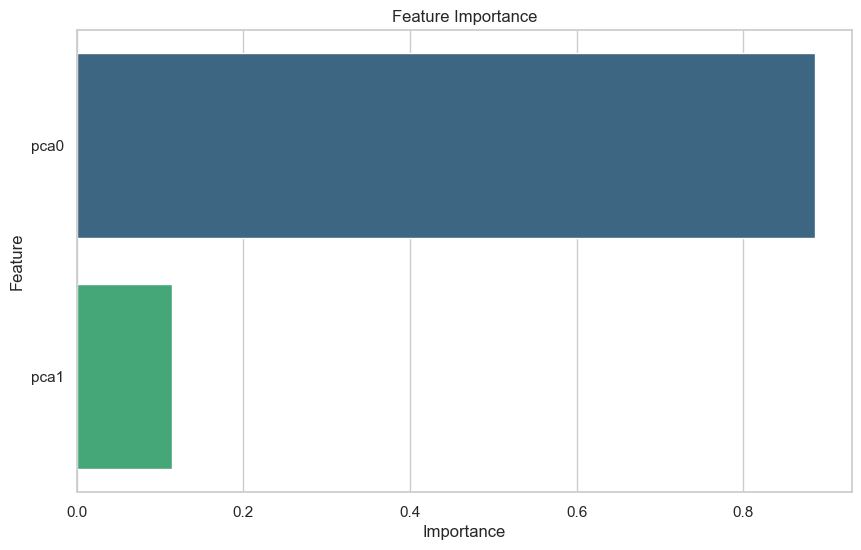

In [199]:
# Set the style of seaborn
sns.set_theme(style="whitegrid")

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_importances[:10], palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [194]:
# Accessing the preprocessor pipeline
preprocessor = pipe_final.named_steps['pre'][:-1]

# Extracting the transformed data before PCA
transformed_data_before_pca = preprocessor.transform(df)
transformed_data_before_pca


missing_vals__missingindicator_Total_Rooms  \
0                                           True   
1                                           True   
2                                           True   
3                                          False   
4                                          False   
...                                          ...   
7141                                       False   
7142                                       False   
7143                                       False   
7144                                       False   
7145                                       False   

      missing_vals__missingindicator_FinishedSqft  \
0                                           False   
1                                           False   
2                                            True   
3                                           False   
4                                           False   
...                                           ...   
7141                                        False   
7142                                        False   
7143                                        False   
7144                                        False   
7145                                        False   

      missing_vals__missingindicator_Stories  \
0                                      False   
1                                      False   
2                                       True   
3                                      False   
4                                      False   
...                                      ...   
7141                                   False   
7142                                   False   
7143                                   False   
7144                                   False   
7145                                   False   

      missing_vals__missingindicator_Extwall  pipe_num__Lotsize  \
0                                      False          -1.626678   
1                                      False           9.993981   
2                                       True         434.859048   
3                                      False          25.441236   
4                                      False           1.074583   
...                                      ...                ...   
7141                                    True          -1.626352   
7142                                    True          -1.626352   
7143                                    True          -1.626352   
7144                                    True          -1.626352   
7145                                    True          -1.626352   

      pipe_num__Total_Rooms  pipe_num__Bath  pipe_num__FinishedSqft  \
0                 -0.166667            -1.5               20.588424   
1                 -0.166667            -1.5                8.892819   
2                 -0.166667            -1.5               -0.487674   
3                  0.000000             0.0               -0.061093   
4                  1.166667            -0.5               -0.412647   
...                     ...             ...                     ...   
7141               0.833333             0.0               -0.311897   
7142              -0.333333             0.0               -0.012862   
7143               0.833333             0.0               -0.311897   
7144              -0.333333             0.0               -0.311897   
7145              -0.333333             0.0               -0.267953   

      pipe_num__Units  pipe_num__Stories  ...  \
0                 5.0                0.0  ...   
1                22.0                0.0  ...   
2                -1.0                0.0  ...   
3                 0.0                0.0  ...   
4                 0.0                0.0  ...   
...               ...                ...  ...   
7141              0.0                1.0  ...   
7142              0.0                0.0  ...   
7143              0.0                1.0  ...   
7144              0

In [195]:
pd.DataFrame(pipe_final.named_steps['pre'].named_steps['pca'].components_, columns= transformed_data_before_pca.columns, index = ["pca0", "pca1"])


missing_vals__missingindicator_Total_Rooms  \
pca0                                    0.004929   
pca1                                    0.005661   

      missing_vals__missingindicator_FinishedSqft  \
pca0                                     0.000028   
pca1                                     0.000861   

      missing_vals__missingindicator_Stories  \
pca0                                0.000648   
pca1                                0.000819   

      missing_vals__missingindicator_Extwall  pipe_num__Lotsize  \
pca0                               -0.000686           0.152146   
pca1                               -0.002011           0.794004   

      pipe_num__Total_Rooms  pipe_num__Bath  pipe_num__FinishedSqft  \
pca0              -0.001329       -0.007346                0.444203   
pca1              -0.001396       -0.008145                0.476829   

      pipe_num__Units  pipe_num__Stories  ...  \
pca0         0.882750           0.013915  ...   
pca1        -0.376909          -0.000144  ...   

      pipe_cat__Extwall_Masonary Frame  pipe_cat__Extwall_Masonry/Frame  \
pca0                          0.000138                        -0.000042   
pca1                          0.000064                         0.000158   

      pipe_cat__Extwall_Metal Siding  pipe_cat__Extwall_Other  \
pca0                        0.000484                 0.000234   
pca1                        0.000212                 0.000054   

      pipe_cat__Extwall_Precast Masonary  pipe_cat__Extwall_Prem Wood  \
pca0                            0.000107                    -0.000010   
pca1                            0.000384                     0.000004   

      pipe_cat__Extwall_Stone  pipe_cat__Extwall_Stucco  \
pca0                -0.000119                 -0.000054   
pca1                 0.000067                 -0.000062   

      pipe_cat__Extwall_Wood  pipe_cat__Extwall_missing  
pca0               -0.000212                  -0.000686  
pca1               -0.000108                  -0.002011  

[2 rows x 464 columns]

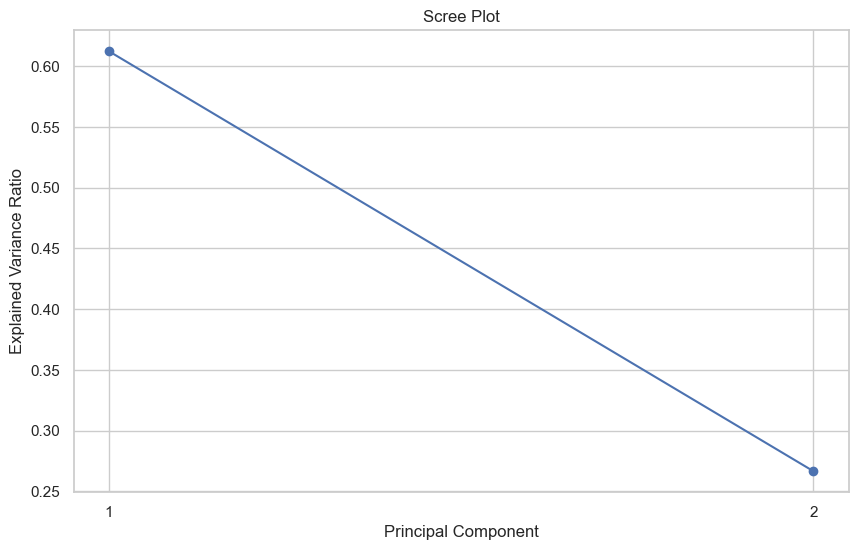

In [196]:
# Get the explained variance ratio for each dimension
explained_variance_ratio = pipe_final.named_steps['pre'][1].explained_variance_ratio_

# Plotting the scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()


# New try

Rengineering of Data

In [749]:
# As both variables H- & Fbath do not have missing values, we can create easily a new KPI out of them bathroom amenity = (Fbath + (Hbath/2))
df["Bath"] = df["Fbath"] + (df["Hbath"] / 2)

# Also Bedrooms can be used by other functionalities as well, therefor we need to calculate Roomd by Bedrooms + Rooms as KPI total Rooms (excl. bathrooms),
# as we have seen in the missing data part bedrooms and rooms are always missing together --> nullity correlation of 1!
df["Total_Rooms"] = df["Bdrms"] + df["Rooms"]


KeyError: 'Fbath'

In [752]:
# Define categorical and nummerical variables
cat_vars = ["District", "nbhd", "Extwall"]
num_vars = [
    "Lotsize",
    "Total_Rooms",
    "Bath",
    "FinishedSqft",
    "Units",
    "Stories",
]


In [753]:
# Train test split, 30% test data, 70% train data, using random_state to allow resapling with same results
X_train, X_test, y_train, y_test = train_test_split(
    df[num_vars + cat_vars], df["Sale_price"], test_size=0.3, random_state=0
)


KeyError: "None of [Index(['Lotsize', 'Total_Rooms', 'Bath', 'FinishedSqft', 'Units', 'Stories',\n       'District', 'nbhd', 'Extwall'],\n      dtype='object')] are in the [columns]"

Reingneerinng of Pipeline

In [754]:
# Create the first pipeline with different steps for nummerical and categorical variables
pipe_num = Pipeline(
    [
        ("num_imp", SimpleImputer(strategy="most_frequent")),
        ("rob_num", RobustScaler(with_centering=True)),
    ]
)

pipe_cat = Pipeline(
    [
        (
            "cat_imp",
            SimpleImputer(strategy="most_frequent"),
        ),
        ("ohe_cat", OneHotEncoder(sparse_output=False, handle_unknown="ignore")),
    ]
)


In [755]:
# Use column transformer to allow different operations on different columns, such as using different steps for categorical and nummerical variables
# Setting "passthrough" allows to skip columns, which are not mentioned
ct = ColumnTransformer(
    [
        ("pipe_num", pipe_num, num_vars),
        ("pipe_cat", pipe_cat, cat_vars),
    ],
    remainder="drop",
)


In [756]:
pipe_final = Pipeline([("pre", ct), ("model", RandomForestRegressor())])


In [757]:
# Trying another Regression approach
pipe_final


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('rob_num',
                                                                   RobustScaler())]),
                                                  ['Lotsize', 'Total_Rooms',
                                                   'Bath', 'FinishedSqft',
                                                   'Units', 'Stories']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('cat_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['District', 'nbhd',
                                                   'Extwall'])])),
                ('model', RandomForestRegressor())])

In [758]:
pipe_final.fit(X_train, y_train)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('rob_num',
                                                                   RobustScaler())]),
                                                  ['Lotsize', 'Total_Rooms',
                                                   'Bath', 'FinishedSqft',
                                                   'Units', 'Stories']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('cat_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['District', 'nbhd',
                                                   'Extwall'])])),
                ('model', RandomForestRegressor())])

Using GridSearchCV

In [759]:
##Define all params for GridSearchCV to find best nodel approach

param_grid = [
    {
        "model": [RandomForestRegressor()],
        "model__ccp_alpha": [0.0, 0.5], #float
        "model__criterion": ["squared_error"], #string
        "model__max_depth": [None], #int
        "model__max_features": [1.0], #float
        "model__max_leaf_nodes": [None], #int
        "model__max_samples": [None, 50, 300], #int
        "model__min_impurity_decrease": [0.0], #float
        "model__min_samples_leaf": [1, 3], #int
        "model__min_samples_split": [2, 5], #int
        "model__min_weight_fraction_leaf": [0.0], #float
        "model__n_estimators": [100, 300], #int
        "model__n_jobs": [-1], #int
        "model__oob_score": [False], #binary
        "model__random_state": [42], #int
        "model__verbose": [0], #int
        "model__warm_start": [False], #binary
        "model__bootstrap": [True], #binary
    }
]


In [760]:
# Define all params for GridSearchCV to find best nodel approach
grid_search_rand_reg = GridSearchCV(
    pipe_final,
    param_grid,
    verbose=2,
    cv=4,
    scoring="r2",
    n_jobs=-1,
    return_train_score=True,
)


In [761]:
# Fit the model with GridSearchCV
grid_search_rand_reg.fit(X_train, y_train)


Fitting 4 folds for each of 48 candidates, totalling 192 fits


/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas re

[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__ccp_alpha=0.0, model__criterion=squared_error, model__max_depth=None, model__max_features=1.0, model__max_leaf_nodes=None, model__max_samples=None, model__min_impurity_decrease=0.0, model__min_samples_leaf=1, model__min_samples_split=2, model__min_weight_fraction_leaf=0.0, model__n_estimators=100, model__n_jobs=-1, model__oob_score=False, model__random_state=42, model__verbose=0, model__warm_start=False; total time=   6.4s
[CV] END model=RandomForestRegressor(), model__bootstrap=True, model__ccp_alpha=0.0, model__criterion=squared_error, model__max_depth=None, model__max_features=1.0, model__max_leaf_nodes=None, model__max_samples=None, model__min_impurity_decrease=0.0, model__min_samples_leaf=1, model__min_samples_split=2, model__min_weight_fraction_leaf=0.0, model__n_estimators=100, model__n_jobs=-1, model__oob_score=False, model__random_state=42, model__verbose=0, model__warm_start=False; total time=   6.3s
[CV] E

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         Pipeline(steps=[('num_imp',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('rob_num',
                                                                                          RobustScaler())]),
                                                                         ['Lotsize',
                                                                          'Total_Rooms',
                                                                          'Bath',
                                                                          'FinishedSqft',
                                                                          'Units',
                                                                          'Stories']),
                                                                        ('pipe_cat',
                                                                         Pipeline(steps=[('cat_imp',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe_cat',...
                          'model__max_samples': [None, 50, 300],
                          'model__min_impurity_decrease': [0.0],
                          'model__min_samples_leaf': [1, 3],
                          'model__min_samples_split': [2, 5],
                          'model__min_weight_fraction_leaf': [0.0],
                          'model__n_estimators': [100, 300],
                          'model__n_jobs': [-1], 'model__oob_score': [False],
                          'model__random_state': [42], 'model__verbose': [0],
                          'model__warm_start': [False]}],
             return_train_score=True, scoring='r2', verbose=2)

Evaluate Pipeline/ Model

In [762]:
# Access the best model and evaluate its performance
best_model = grid_search_rand_reg.best_estimator_
best_params = grid_search_rand_reg.best_params_
best_model_name = best_model.named_steps["model"].__class__.__name__
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
print(f"The best model selected by GridSearchCV is: {best_model_name}")
print(f"{best_model_name} train score: {train_score}")
print(f"{best_model_name} test score: {test_score}")
print(f"train test loss :" + str(train_score - test_score))
print(f"best params are: {best_params}")


The best model selected by GridSearchCV is: RandomForestRegressor
RandomForestRegressor train score: 0.9528848479609383
RandomForestRegressor test score: 0.7935377390876459
train test loss :0.1593471088732924
best params are: {'model': RandomForestRegressor(ccp_alpha=0.5, n_jobs=-1, random_state=42), 'model__bootstrap': True, 'model__ccp_alpha': 0.5, 'model__criterion': 'squared_error', 'model__max_depth': None, 'model__max_features': 1.0, 'model__max_leaf_nodes': None, 'model__max_samples': None, 'model__min_impurity_decrease': 0.0, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__min_weight_fraction_leaf': 0.0, 'model__n_estimators': 100, 'model__n_jobs': -1, 'model__oob_score': False, 'model__random_state': 42, 'model__verbose': 0, 'model__warm_start': False}


In [763]:
pipe_final.set_params(**best_params)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('rob_num',
                                                                   RobustScaler())]),
                                                  ['Lotsize', 'Total_Rooms',
                                                   'Bath', 'FinishedSqft',
                                                   'Units', 'Stories']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('cat_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['District', 'nbhd',
                                                   'Extwall'])])),
                ('model',
                 RandomForestRegressor(ccp_alpha=0.5, n_jobs=-1,
                                       random_state=42))])

In [764]:
pipe_final.fit(X_train, y_train)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('rob_num',
                                                                   RobustScaler())]),
                                                  ['Lotsize', 'Total_Rooms',
                                                   'Bath', 'FinishedSqft',
                                                   'Units', 'Stories']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('cat_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['District', 'nbhd',
                                                   'Extwall'])])),
                ('model',
                 RandomForestRegressor(ccp_alpha=0.5, n_jobs=-1,
                                       random_state=42))])

In [765]:
# Check on in sample MAPE --> overfitting/ underfitting trade off
train_predictions = pipe_final.predict(X_train)
mape = mean_absolute_percentage_error(y_train, train_predictions) * 100
mse = mean_squared_error(y_train, train_predictions)
mae = mean_absolute_error(y_train, train_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, train_predictions)
print(f"{best_model_name} In-sample mape with {mape:.2f}%")
print(f"{best_model_name} In-sample mae with {mae:.2f}")
print(f"{best_model_name} In-sample mse with {mse:.2f}")
print(f"{best_model_name} In-sample rmse with {rmse:.2f}")
print(f"{best_model_name} In-sample r2 with {r2:.2f}")


RandomForestRegressor In-sample mape with 10.12%
RandomForestRegressor In-sample mae with 27831.16
RandomForestRegressor In-sample mse with 25359499557.02
RandomForestRegressor In-sample rmse with 159246.66
RandomForestRegressor In-sample r2 with 0.95


In [766]:
# Check on in sample MAPE --> overfitting/ underfitting trade off
test_predictions = pipe_final.predict(X_test)
mape_out = mean_absolute_percentage_error(y_test, test_predictions) * 100
mse_out = mean_squared_error(y_test, test_predictions)
mae_out = mean_absolute_error(y_test, test_predictions)
rmse_out = np.sqrt(mse)
r2_out = r2_score(y_train, train_predictions)
print(f"{best_model_name} Out-of-sample mape with {mape_out:.2f}%")
print(f"{best_model_name} Out-of-sample mae with {mae_out:.2f}")
print(f"{best_model_name} Out-of-sample mse with {mse_out:.2f}")
print(f"{best_model_name} Out-of-sample rmse with {rmse_out:.2f}")
print(f"{best_model_name} Out-of-sample r2 with {r2_out:.2f}")


RandomForestRegressor Out-of-sample mape with 26.79%
RandomForestRegressor Out-of-sample mae with 68903.98
RandomForestRegressor Out-of-sample mse with 148820275667.24
RandomForestRegressor Out-of-sample rmse with 159246.66
RandomForestRegressor Out-of-sample r2 with 0.95


In [767]:

# Calculate metrics for in-sample data
in_sample_metrics = {
    "Model": [best_model_name] * 5,  # Repeat model name for each metric
    "Metric": ["MAPE", "MAE", "MSE", "RMSE", "R2"],
    "In-Sample": [mape, mae, mse, rmse, r2]
}

# Calculate metrics for out-of-sample data
out_of_sample_metrics = {
    "Model": [best_model_name] * 5,  # Repeat model name for each metric
    "Metric": ["MAPE", "MAE", "MSE", "RMSE", "R2"],
    "Out-of-Sample": [mape_out, mae_out, mse_out, rmse_out, r2_out]
}

# Create DataFrames
in_sample_df = pd.DataFrame(in_sample_metrics)
out_of_sample_df = pd.DataFrame(out_of_sample_metrics)

# Merge DataFrames on "Model" and "Metric" columns
df_rfr = pd.merge(in_sample_df, out_of_sample_df, on=["Model", "Metric"])



Feature importance

In [768]:
# retrieving the RF Regressor from the model pipeline
final_model = pipe_final[-1]
# making a DataFrame
data = list(zip(final_model.feature_names_in_, final_model.feature_importances_))
df_importances = pd.DataFrame(data, columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
df_importances


Feature    Importance
3    pipe_num__FinishedSqft  7.007523e-01
4           pipe_num__Units  4.738323e-02
0         pipe_num__Lotsize  4.611705e-02
369     pipe_cat__nbhd_6420  4.594521e-02
5         pipe_num__Stories  3.871985e-02
..                      ...           ...
208     pipe_cat__nbhd_5324  2.556718e-08
185     pipe_cat__nbhd_5221  2.141837e-08
207     pipe_cat__nbhd_5323  1.156689e-08
163     pipe_cat__nbhd_5081  8.747753e-09
64     pipe_cat__nbhd_24910  7.127110e-09

[459 rows x 2 columns]

In [769]:
# Filter rows not containing "nbhd", "District", or "Extwall" in the Feature column
df_importances_new = df_importances[~df_importances['Feature'].str.contains("nbhd|District|Extwall")]

# Filter rows containing "District" and "Extwall" in the Feature column
df_importances_district = df_importances[df_importances["Feature"].str.contains("District")]
df_importances_extwall = df_importances[df_importances["Feature"].str.contains("Extwall")]
df_importances_nbhd = df_importances[df_importances["Feature"].str.contains("nbhd")]

# Calculate the sum of importance for "District", "Extwall", and "nbhd" rows
sum_importance_district = df_importances_district["Importance"].sum()
sum_importance_extwall = df_importances_extwall["Importance"].sum()
sum_importance_nbhd = df_importances_nbhd["Importance"].sum()

# Create new DataFrames containing the sum of importance for "District", "Extwall", and "nbhd" rows
df_importances_sum_district = pd.DataFrame({"Feature": ["Sum of District"], "Importance": [sum_importance_district]})
df_importances_sum_extwall = pd.DataFrame({"Feature": ["Sum of Extwall"], "Importance": [sum_importance_extwall]})
df_importances_sum_nbhd = pd.DataFrame({"Feature": ["Sum of nbhd"], "Importance": [sum_importance_nbhd]})

# Concatenate the original DataFrame with the new DataFrames
appended_df = pd.concat([df_importances_new, df_importances_sum_district, df_importances_sum_extwall, df_importances_sum_nbhd], ignore_index=True)
appended_df_sorted_rfr= appended_df.sort_values(by="Importance", ascending=False)


In [770]:
appended_df_sorted_rfr["Model"] = best_model_name
appended_df_sorted_rfr


Feature  Importance                  Model
0  pipe_num__FinishedSqft    0.700752  RandomForestRegressor
8             Sum of nbhd    0.087182  RandomForestRegressor
1         pipe_num__Units    0.047383  RandomForestRegressor
2       pipe_num__Lotsize    0.046117  RandomForestRegressor
6         Sum of District    0.045165  RandomForestRegressor
3       pipe_num__Stories    0.038720  RandomForestRegressor
7          Sum of Extwall    0.031260  RandomForestRegressor
4          pipe_num__Bath    0.001989  RandomForestRegressor
5   pipe_num__Total_Rooms    0.001431  RandomForestRegressor

/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_59454/3537352421.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




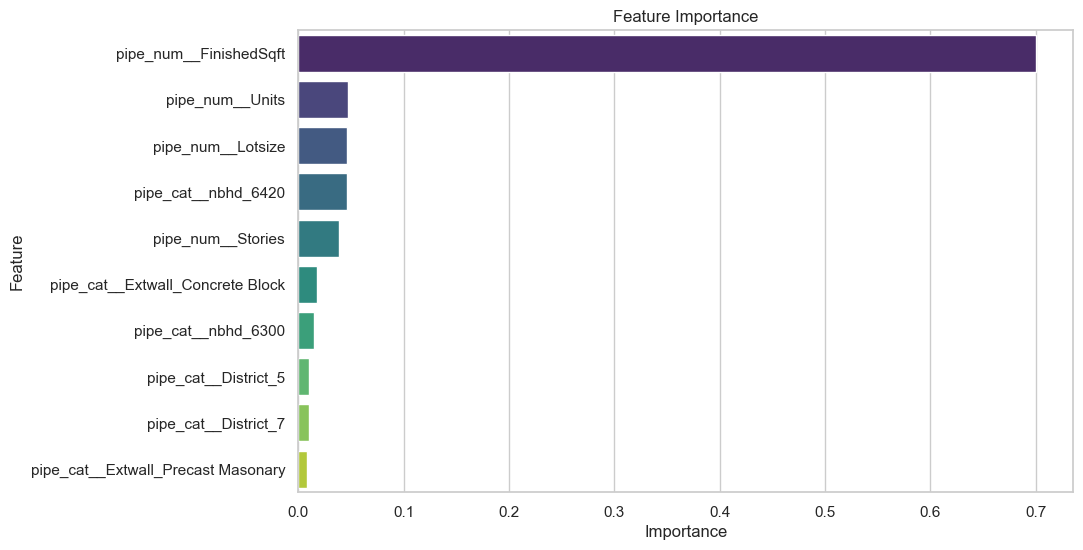

In [771]:
# Set the style of seaborn
sns.set_theme(style="whitegrid")

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_importances[:10], palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_59454/1802234504.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




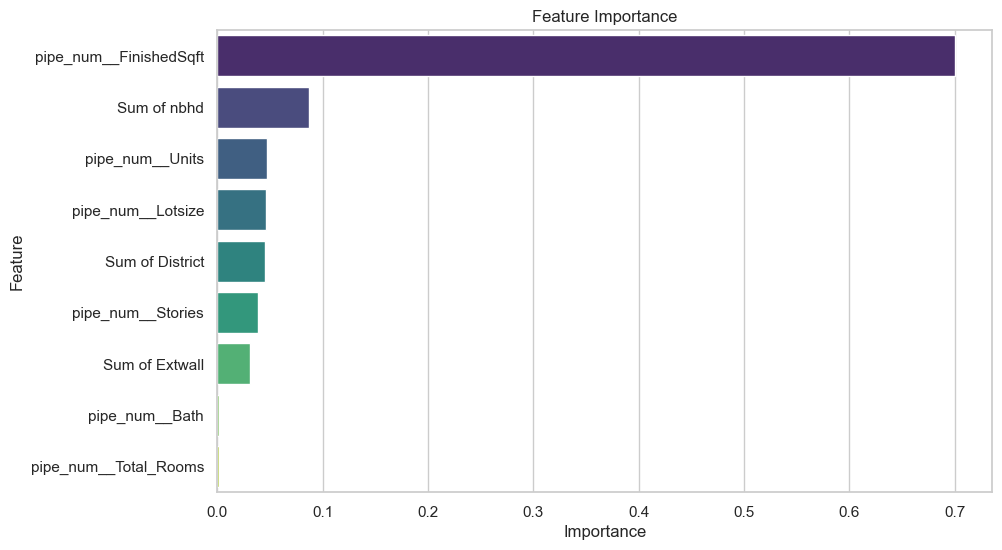

In [772]:
# Set the style of seaborn
sns.set_theme(style="whitegrid")

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=appended_df_sorted_rfr[:10], palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Visualizations

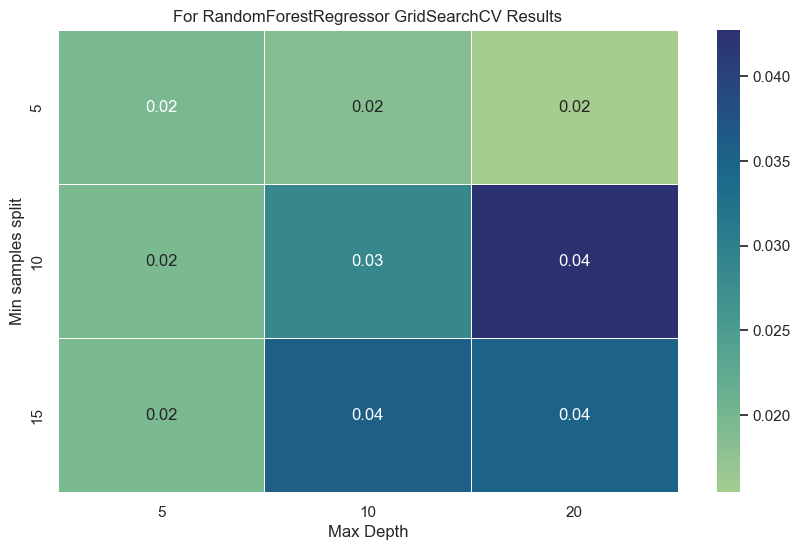

In [419]:
# Create the heatmap

best_model_name = best_model.named_steps["model"].__class__.__name__

heatmap_data = cv_results_reg_tree.pivot_table(
    index="param_model__min_samples_split",
    columns="param_model__max_depth",
    values="mean_test_score",
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="crest", fmt=".2f", linewidths=0.5)
plt.title(f"For {best_model_name} GridSearchCV Results")
plt.xlabel("Max Depth")
plt.ylabel("Min samples split")
plt.show()


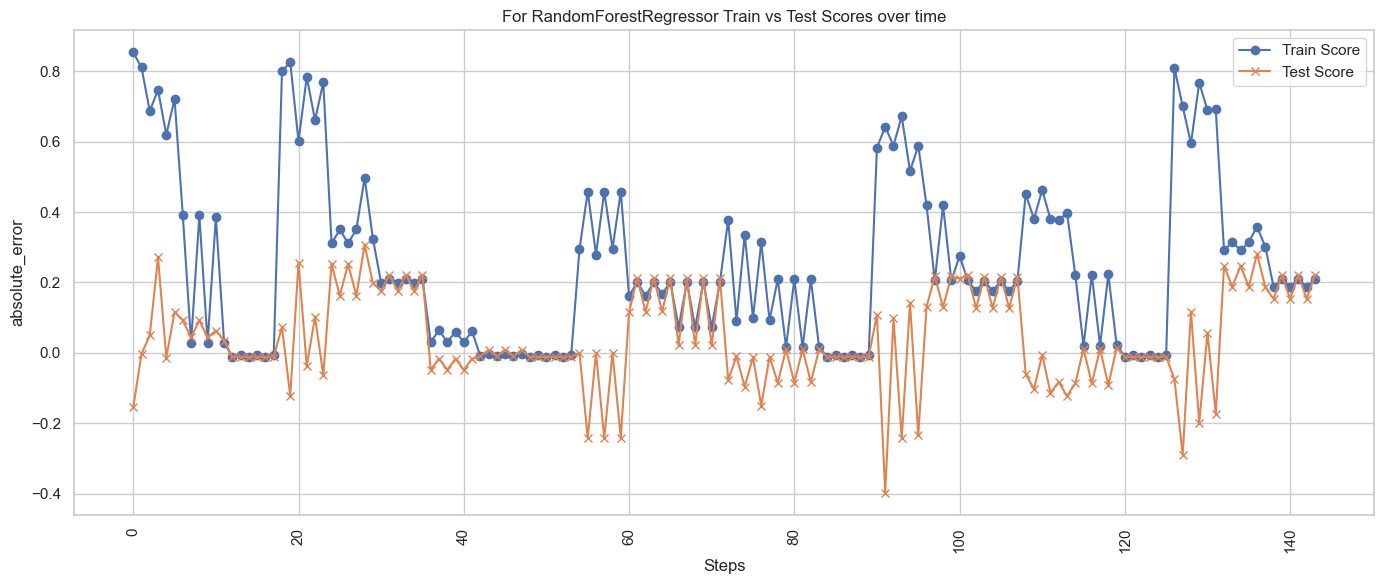

In [420]:
best_model_name = best_model.named_steps["model"].__class__.__name__
error_function = cv_results_reg_tree["param_model__criterion"][0]
results = cv_results_reg_tree

# Extract parameter values and scores
train_scores = results["mean_train_score"]
test_scores = results["mean_test_score"]

# Plotting
plt.figure(figsize=(14, 6))

# Plot train scores
plt.plot(range(len(train_scores)), train_scores, label="Train Score", marker="o")

# Plot test scores
plt.plot(range(len(test_scores)), test_scores, label="Test Score", marker="x")

# Customize plot
plt.xticks(rotation=90)
plt.xlabel("Steps")
plt.ylabel(f"{error_function}")
plt.title(f"For {best_model_name} Train vs Test Scores over time")
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


In [421]:
# Assuming you have your train_scores and test_scores already defined
# Replace this with your actual data

best_model_name = best_model.named_steps["model"].__class__.__name__
error_function = cv_results_reg_tree["param_model__criterion"][0]

# Plot train scores
train_trace = go.Scatter(
    x=list(range(len(train_scores))),
    y=train_scores,
    mode="lines+markers",
    name="Train Score",
)

# Plot test scores
test_trace = go.Scatter(
    x=list(range(len(test_scores))),
    y=test_scores,
    mode="lines+markers",
    name="Test Score",
)

# Layout configuration
layout = go.Layout(
    title=(f"For {best_model_name} Train vs Test Scores over time"),
    xaxis=dict(title="Steps", tickangle=90),
    yaxis=dict(title=f"{error_function}"),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=40, r=40, t=80, b=40),
)

# Create figure
fig = go.Figure(data=[train_trace, test_trace], layout=layout)

# Set hover information for the data points or lines
hover_template = (
    "<b>%{y}</b>"
    "<br>Index: %{x}"
    "<br>Max depth: %{customdata[0]}"
    "<br>Min_samples_leaf: %{customdata[1]}"
)
fig.update_traces(
    hovertemplate=hover_template,
    customdata=np.column_stack(
        (
            cv_results_reg_tree["param_model__max_depth"],
            cv_results_reg_tree["param_model__min_samples_leaf"],
        )
    ),
)

# Show plot
fig.show()


# Next try

Using GridSeachCV

In [775]:
##Define all params for GridSearchCV to find best nodel approach

param_grid = [
    {
        "model": [DecisionTreeRegressor()],
        "model__max_depth": [None, 5, 10, 20],
        "model__min_samples_split": [5, 10, 15],
        "model__min_samples_leaf": [1, 5, 15],
        "model__max_features": ["log2", "sqrt"],
        "model__criterion": ["absolute_error"],
        "model__random_state": [42],
        "model__splitter": ["best", "random"],
    }
]


In [776]:
# Define all params for GridSearchCV to find best nodel approach
grid_search_reg_tree = GridSearchCV(
    pipe_final,
    param_grid,
    verbose=2,
    cv=4,
    scoring="r2",
    n_jobs=-1,
    return_train_score=True,
)


In [777]:
# Fit the model with GridSearchCV
grid_search_reg_tree.fit(X_train, y_train)


Fitting 4 folds for each of 144 candidates, totalling 576 fits
[CV] END model=DecisionTreeRegressor(), model__criterion=absolute_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__random_state=42, model__splitter=best; total time=   1.2s
[CV] END model=DecisionTreeRegressor(), model__criterion=absolute_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__random_state=42, model__splitter=best; total time=   1.5s
[CV] END model=DecisionTreeRegressor(), model__criterion=absolute_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__random_state=42, model__splitter=best; total time=   1.6s
[CV] END model=DecisionTreeRegressor(), model__criterion=absolute_error, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__random_state=42, model__spl

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         Pipeline(steps=[('num_imp',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('rob_num',
                                                                                          RobustScaler())]),
                                                                         ['Lotsize',
                                                                          'Total_Rooms',
                                                                          'Bath',
                                                                          'FinishedSqft',
                                                                          'Units',
                                                                          'Stories']),
                                                                        ('pipe_cat',
                                                                         Pipeline(steps=[('cat_imp',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe_cat',...
                                                          min_samples_leaf=5,
                                                          min_samples_split=15,
                                                          random_state=42)],
                          'model__criterion': ['absolute_error'],
                          'model__max_depth': [None, 5, 10, 20],
                          'model__max_features': ['log2', 'sqrt'],
                          'model__min_samples_leaf': [1, 5, 15],
                          'model__min_samples_split': [5, 10, 15],
                          'model__random_state': [42],
                          'model__splitter': ['best', 'random']}],
             return_train_score=True, scoring='r2', verbose=2)

Evaluate Pipeline/ Model

In [778]:
# Access the best model and evaluate its performance
best_model = grid_search_reg_tree.best_estimator_
best_params = grid_search_reg_tree.best_params_
best_model_name = best_model.named_steps["model"].__class__.__name__
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
print(f"The best model selected by GridSearchCV is: {best_model_name}")
print(f"{best_model_name} train score: {train_score}")
print(f"{best_model_name} test score: {test_score}")
print(f"train test loss :" + str(train_score - test_score))
print(f"best params are: {best_params}")


The best model selected by GridSearchCV is: DecisionTreeRegressor
DecisionTreeRegressor train score: 0.45412306540204306
DecisionTreeRegressor test score: 0.4710370797050524
train test loss :-0.016914014303009317
best params are: {'model': DecisionTreeRegressor(criterion='absolute_error', max_features='sqrt',
                      min_samples_leaf=5, min_samples_split=15,
                      random_state=42), 'model__criterion': 'absolute_error', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 15, 'model__random_state': 42, 'model__splitter': 'best'}


In [779]:
pipe_final.set_params(**best_params)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('rob_num',
                                                                   RobustScaler())]),
                                                  ['Lotsize', 'Total_Rooms',
                                                   'Bath', 'FinishedSqft',
                                                   'Units', 'Stories']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('cat_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['District', 'nbhd',
                                                   'Extwall'])])),
                ('model',
                 DecisionTreeRegressor(criterion='absolute_error',
                                       max_features='sqrt', min_samples_leaf=5,
                                       min_samples_split=15,
                                       random_state=42))])

In [780]:
pipe_final.fit(X_train, y_train)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('rob_num',
                                                                   RobustScaler())]),
                                                  ['Lotsize', 'Total_Rooms',
                                                   'Bath', 'FinishedSqft',
                                                   'Units', 'Stories']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('cat_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['District', 'nbhd',
                                                   'Extwall'])])),
                ('model',
                 DecisionTreeRegressor(criterion='absolute_error',
                                       max_features='sqrt', min_samples_leaf=5,
                                       min_samples_split=15,
                                       random_state=42))])

In [781]:
# Check on in sample MAPE --> overfitting/ underfitting trade off
train_predictions = pipe_final.predict(X_train)
mape = mean_absolute_percentage_error(y_train, train_predictions) * 100
mse = mean_squared_error(y_train, train_predictions)
mae = mean_absolute_error(y_train, train_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, train_predictions)
print(f"{best_model_name} In-sample mape with {mape:.2f}%")
print(f"{best_model_name} In-sample mae with {mae:.2f}")
print(f"{best_model_name} In-sample mse with {mse:.2f}")
print(f"{best_model_name} In-sample rmse with {rmse:.2f}")
print(f"{best_model_name} In-sample r2 with {r2:.2f}")


DecisionTreeRegressor In-sample mape with 38.23%
DecisionTreeRegressor In-sample mae with 98338.15
DecisionTreeRegressor In-sample mse with 293815583353.06
DecisionTreeRegressor In-sample rmse with 542047.58
DecisionTreeRegressor In-sample r2 with 0.45


In [782]:
# Check on in sample MAPE --> overfitting/ underfitting trade off
test_predictions = pipe_final.predict(X_test)
mape_out = mean_absolute_percentage_error(y_test, test_predictions) * 100
mse_out = mean_squared_error(y_test, test_predictions)
mae_out = mean_absolute_error(y_test, test_predictions)
rmse_out = np.sqrt(mse)
r2_out = r2_score(y_train, train_predictions)
print(f"{best_model_name} Out-of-sample mape with {mape_out:.2f}%")
print(f"{best_model_name} Out-of-sample mae with {mae_out:.2f}")
print(f"{best_model_name} Out-of-sample mse with {mse_out:.2f}")
print(f"{best_model_name} Out-of-sample rmse with {rmse_out:.2f}")
print(f"{best_model_name} Out-of-sample r2 with {r2_out:.2f}")


DecisionTreeRegressor Out-of-sample mape with 40.33%
DecisionTreeRegressor Out-of-sample mae with 111976.65
DecisionTreeRegressor Out-of-sample mse with 381282309261.65
DecisionTreeRegressor Out-of-sample rmse with 542047.58
DecisionTreeRegressor Out-of-sample r2 with 0.45


In [783]:

# Calculate metrics for in-sample data
in_sample_metrics = {
    "Model": [best_model_name] * 5,  # Repeat model name for each metric
    "Metric": ["MAPE", "MAE", "MSE", "RMSE", "R2"],
    "In-Sample": [mape, mae, mse, rmse, r2]
}

# Calculate metrics for out-of-sample data
out_of_sample_metrics = {
    "Model": [best_model_name] * 5,  # Repeat model name for each metric
    "Metric": ["MAPE", "MAE", "MSE", "RMSE", "R2"],
    "Out-of-Sample": [mape_out, mae_out, mse_out, rmse_out, r2_out]
}

# Create DataFrames
in_sample_df = pd.DataFrame(in_sample_metrics)
out_of_sample_df = pd.DataFrame(out_of_sample_metrics)

# Merge DataFrames on "Model" and "Metric" columns
df_dtr = pd.merge(in_sample_df, out_of_sample_df, on=["Model", "Metric"])


In [784]:
# Safe as dataframe
cv_results_reg_tree = pd.DataFrame(grid_search_reg_tree.cv_results_)
cv_results_reg_tree


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         1.544534      0.303652         0.039834        0.022939   
1         2.176650      0.179395         0.030549        0.011252   
2         1.583483      0.247935         0.019392        0.005047   
3         1.788862      0.315381         0.032249        0.010572   
4         1.391624      0.198365         0.029952        0.006847   
..             ...           ...              ...             ...   
139       0.585772      0.138085         0.026669        0.008473   
140       0.611347      0.159703         0.018757        0.006296   
141       0.536525      0.046890         0.019537        0.004010   
142       0.546183      0.105723         0.020443        0.009496   
143       0.466964      0.054507         0.017116        0.004386   

                                           param_model param_model__criterion  \
0    DecisionTreeRegressor(criterion='absolute_erro...         absolute_error   
1    DecisionTreeRegressor(criterion='absolute_erro...         absolute_error   
2    DecisionTreeRegressor(criterion='absolute_erro...         absolute_error   
3    DecisionTreeRegressor(criterion='absolute_erro...         absolute_error   
4    DecisionTreeRegressor(criterion='absolute_erro...         absolute_error   
..                                                 ...                    ...   
139  DecisionTreeRegressor(criterion='absolute_erro...         absolute_error   
140  DecisionTreeRegressor(criterion='absolute_erro...         absolute_error   
141  DecisionTreeRegressor(criterion='absolute_erro...         absolute_error   
142  DecisionTreeRegressor(criterion='absolute_erro...         absolute_error   
143  DecisionTreeRegressor(criterion='absolute_erro...         absolute_error   

    param_model__max_depth param_model__max_features  \
0                     None                      log2   
1                     None                      log2   
2                     None                      log2   
3                     None                      log2   
4                     None                      log2   
..                     ...                       ...   
139                     20                      sqrt   
140                     20                      sqrt   
141                     20                      sqrt   
142                     20                      sqrt   
143                     20                      sqrt   

    param_model__min_samples_leaf param_model__min_samples_split  ...  \
0                               1                              5  ...   
1                               1                              5  ...   
2                               1                             10  ...   
3                               1                             10  ...   
4                               1                             15  ...   
..                            ...                            ...  ...   
139                            15                              5  ...   
140                            15                             10  ...   
141                            15                             10  ...   
142                            15                             15  ...   
143                            15                             15  ...   

    split3_test_score mean_test_score std_test_score  rank_test_score  \
0           -0.925988       -0.154460       0.454328              135   
1           -0.214887       -0.003145       0.284845               78   
2           -0.454309        0.050344       0.315229               59   
3            0.350772        0.270991       0.177665                3   
4           -0.460971       -0.013021       0.274634              110   
..                ...             ...            ...              ...   
139          0.484358        0.220636       0.211239               13   
140          0.060144        0.153561       0.135203               37

Feauture importance

In [785]:
# retrieving the RF Regressor from the model pipeline
final_model = pipe_final[-1]
# making a DataFrame
data = list(zip(final_model.feature_names_in_, final_model.feature_importances_))
df_importances = pd.DataFrame(data, columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
df_importances


Feature  Importance
0         pipe_num__Lotsize    0.187146
4           pipe_num__Units    0.179330
3    pipe_num__FinishedSqft    0.087041
2            pipe_num__Bath    0.062256
95      pipe_cat__nbhd_3060    0.049853
..                      ...         ...
197     pipe_cat__nbhd_5299    0.000000
196     pipe_cat__nbhd_5297    0.000000
195     pipe_cat__nbhd_5295    0.000000
194     pipe_cat__nbhd_5293    0.000000
229     pipe_cat__nbhd_5396    0.000000

[459 rows x 2 columns]

In [786]:
# Filter rows not containing "nbhd", "District", or "Extwall" in the Feature column
df_importances_new = df_importances[~df_importances['Feature'].str.contains("nbhd|District|Extwall")]

# Filter rows containing "District" and "Extwall" in the Feature column
df_importances_district = df_importances[df_importances["Feature"].str.contains("District")]
df_importances_extwall = df_importances[df_importances["Feature"].str.contains("Extwall")]
df_importances_nbhd = df_importances[df_importances["Feature"].str.contains("nbhd")]

# Calculate the sum of importance for "District", "Extwall", and "nbhd" rows
sum_importance_district = df_importances_district["Importance"].sum()
sum_importance_extwall = df_importances_extwall["Importance"].sum()
sum_importance_nbhd = df_importances_nbhd["Importance"].sum()

# Create new DataFrames containing the sum of importance for "District", "Extwall", and "nbhd" rows
df_importances_sum_district = pd.DataFrame({"Feature": ["Sum of District"], "Importance": [sum_importance_district]})
df_importances_sum_extwall = pd.DataFrame({"Feature": ["Sum of Extwall"], "Importance": [sum_importance_extwall]})
df_importances_sum_nbhd = pd.DataFrame({"Feature": ["Sum of nbhd"], "Importance": [sum_importance_nbhd]})

# Concatenate the original DataFrame with the new DataFrames
appended_df = pd.concat([df_importances_new, df_importances_sum_district, df_importances_sum_extwall, df_importances_sum_nbhd], ignore_index=True)
appended_df_sorted_dtr = appended_df.sort_values(by="Importance", ascending=False)


In [787]:
appended_df_sorted_dtr["Model"] = best_model_name
appended_df_sorted_dtr


Feature  Importance                  Model
8             Sum of nbhd    0.227956  DecisionTreeRegressor
0       pipe_num__Lotsize    0.187146  DecisionTreeRegressor
1         pipe_num__Units    0.179330  DecisionTreeRegressor
6         Sum of District    0.174578  DecisionTreeRegressor
2  pipe_num__FinishedSqft    0.087041  DecisionTreeRegressor
3          pipe_num__Bath    0.062256  DecisionTreeRegressor
7          Sum of Extwall    0.041584  DecisionTreeRegressor
4   pipe_num__Total_Rooms    0.024187  DecisionTreeRegressor
5       pipe_num__Stories    0.015923  DecisionTreeRegressor

/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_59454/3537352421.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




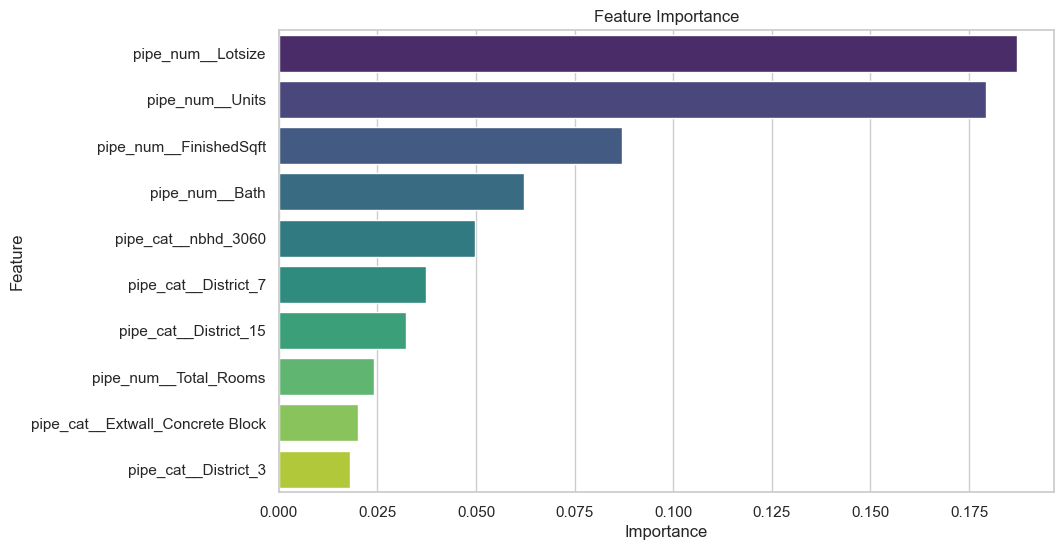

In [788]:
# Set the style of seaborn
sns.set_theme(style="whitegrid")

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_importances[:10], palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_59454/1996763046.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




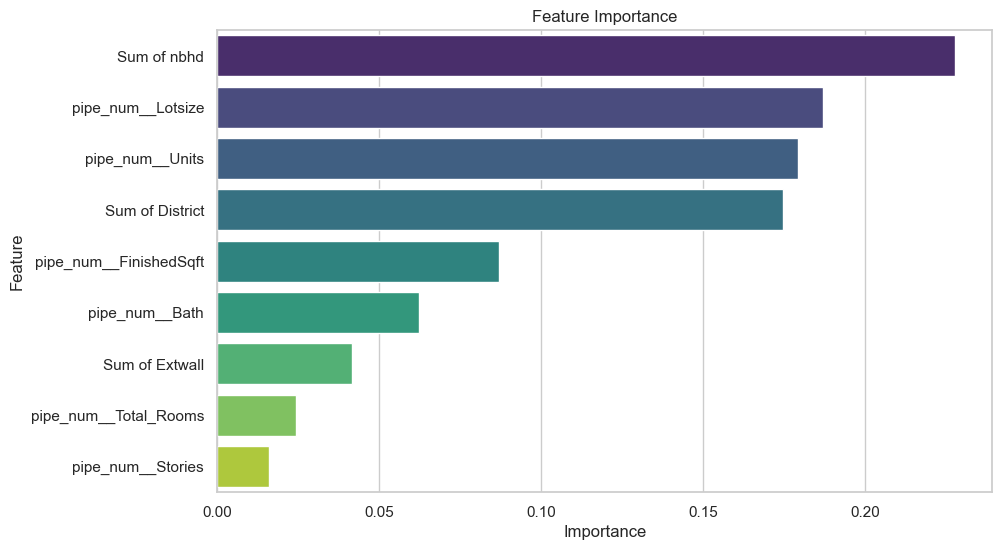

In [789]:
# Set the style of seaborn
sns.set_theme(style="whitegrid")

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=appended_df_sorted_dtr[:10], palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Visualizations

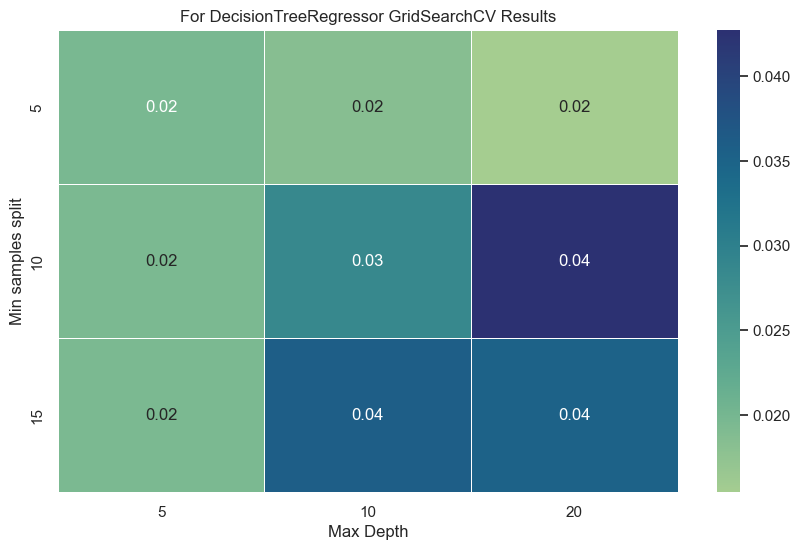

In [335]:
# Create the heatmap

best_model_name = best_model.named_steps["model"].__class__.__name__

heatmap_data = cv_results_reg_tree.pivot_table(
    index="param_model__min_samples_split",
    columns="param_model__max_depth",
    values="mean_test_score",
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="crest", fmt=".2f", linewidths=0.5)
plt.title(f"For {best_model_name} GridSearchCV Results")
plt.xlabel("Max Depth")
plt.ylabel("Min samples split")
plt.show()


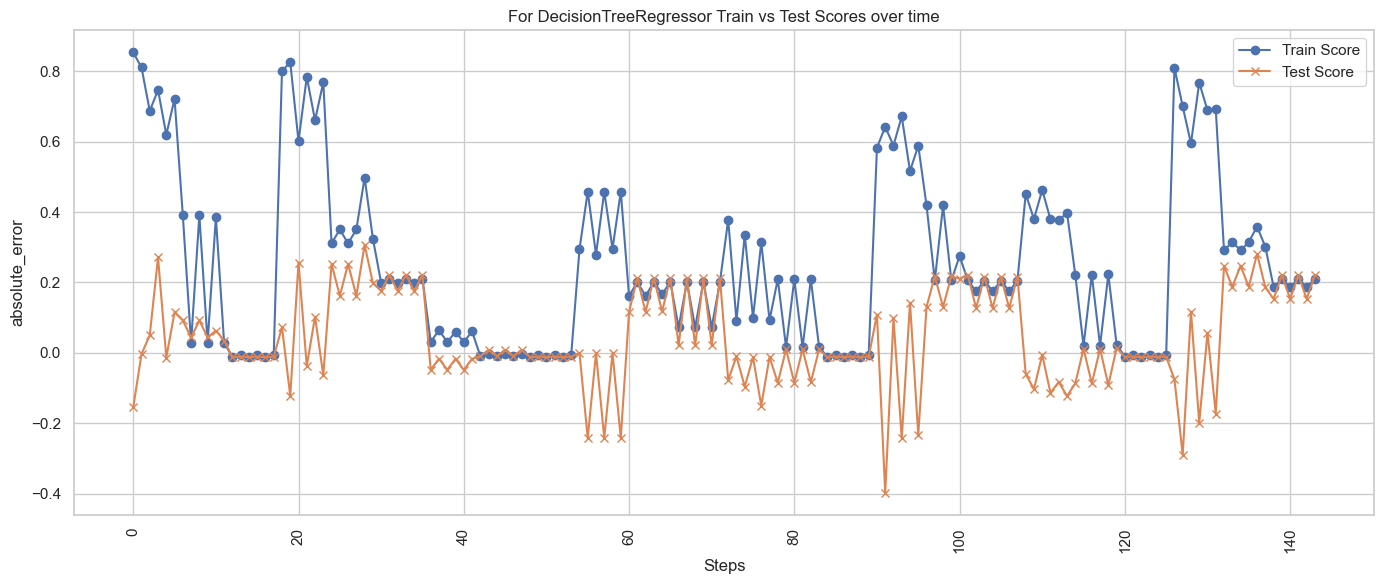

In [336]:
best_model_name = best_model.named_steps["model"].__class__.__name__
error_function = cv_results_reg_tree["param_model__criterion"][0]
results = cv_results_reg_tree

# Extract parameter values and scores
train_scores = results["mean_train_score"]
test_scores = results["mean_test_score"]

# Plotting
plt.figure(figsize=(14, 6))

# Plot train scores
plt.plot(range(len(train_scores)), train_scores, label="Train Score", marker="o")

# Plot test scores
plt.plot(range(len(test_scores)), test_scores, label="Test Score", marker="x")

# Customize plot
plt.xticks(rotation=90)
plt.xlabel("Steps")
plt.ylabel(f"{error_function}")
plt.title(f"For {best_model_name} Train vs Test Scores over time")
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


In [337]:
# Assuming you have your train_scores and test_scores already defined
# Replace this with your actual data

best_model_name = best_model.named_steps["model"].__class__.__name__
error_function = cv_results_reg_tree["param_model__criterion"][0]

# Plot train scores
train_trace = go.Scatter(
    x=list(range(len(train_scores))),
    y=train_scores,
    mode="lines+markers",
    name="Train Score",
)

# Plot test scores
test_trace = go.Scatter(
    x=list(range(len(test_scores))),
    y=test_scores,
    mode="lines+markers",
    name="Test Score",
)

# Layout configuration
layout = go.Layout(
    title=(f"For {best_model_name} Train vs Test Scores over time"),
    xaxis=dict(title="Steps", tickangle=90),
    yaxis=dict(title=f"{error_function}"),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=40, r=40, t=80, b=40),
)

# Create figure
fig = go.Figure(data=[train_trace, test_trace], layout=layout)

# Set hover information for the data points or lines
hover_template = (
    "<b>%{y}</b>"
    "<br>Index: %{x}"
    "<br>Max depth: %{customdata[0]}"
    "<br>Min_samples_leaf: %{customdata[1]}"
)
fig.update_traces(
    hovertemplate=hover_template,
    customdata=np.column_stack(
        (
            cv_results_reg_tree["param_model__max_depth"],
            cv_results_reg_tree["param_model__min_samples_leaf"],
        )
    ),
)

# Show plot
fig.show()


# Last try

Using GridSearchCV

In [854]:
##Define all params for GridSearchCV to find best nodel approach

param_grid = [
    {
        "model": [GradientBoostingRegressor()],
        "model__loss": ["huber"], #string
        "model__learning_rate": [0.01, 0.05, 0.1], #float
        "model__n_estimators": [500, 1000, 2000],
        "model__max_depth": [3, 5, 7],
        "model__subsample": [0.5, 0.75, 1.0], #float
        "model__min_samples_split": [2, 5, 10],
        "model__min_samples_leaf": [1, 2, 4],
        "model__max_features": ["sqrt"], #string
        "model__random_state": [42]
    }
]


In [855]:
# Define all params for GridSearchCV to find best nodel approach
grid_search_grad_reg = GridSearchCV(
    pipe_final,
    param_grid,
    verbose=2,
    cv=4,
    scoring="r2",
    n_jobs=-1,
    return_train_score=True,
)


In [856]:
# Fit the model with GridSearchCV
grid_search_grad_reg.fit(X_train, y_train)


Fitting 4 folds for each of 729 candidates, totalling 2916 fits


/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/lukask/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas re

[CV] END model=GradientBoostingRegressor(), model__learning_rate=0.01, model__loss=huber, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, model__random_state=42, model__subsample=0.75; total time=   2.8s
[CV] END model=GradientBoostingRegressor(), model__learning_rate=0.01, model__loss=huber, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, model__random_state=42, model__subsample=0.5; total time=   3.0s
[CV] END model=GradientBoostingRegressor(), model__learning_rate=0.01, model__loss=huber, model__max_depth=3, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, model__random_state=42, model__subsample=0.75; total time=   3.2s
[CV] END model=GradientBoostingRegressor(), model__learning_rate=0.01, model__loss=huber, model__max_depth=3, model__max_features=sqrt, model__min_samples_

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         Pipeline(steps=[('num_imp',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('rob_num',
                                                                                          RobustScaler())]),
                                                                         ['Lotsize',
                                                                          'Total_Rooms',
                                                                          'Bath',
                                                                          'FinishedSqft',
                                                                          'Units',
                                                                          'Stories']),
                                                                        ('pipe_cat',
                                                                         Pipeline(steps=[('cat_imp',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe_cat',...
                                                              subsample=0.75)],
                          'model__learning_rate': [0.01, 0.05, 0.1],
                          'model__loss': ['huber'],
                          'model__max_depth': [3, 5, 7],
                          'model__max_features': ['sqrt'],
                          'model__min_samples_leaf': [1, 2, 4],
                          'model__min_samples_split': [2, 5, 10],
                          'model__n_estimators': [500, 1000, 2000],
                          'model__random_state': [42],
                          'model__subsample': [0.5, 0.75, 1.0]}],
             return_train_score=True, scoring='r2', verbose=2)

Evaluate Pipeline/ Model

In [857]:
# Access the best model and evaluate its performance
best_model = grid_search_grad_reg.best_estimator_
best_params = grid_search_grad_reg.best_params_
best_model_name = best_model.named_steps["model"].__class__.__name__
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
print(f"The best model selected by GridSearchCV is: {best_model_name}")
print(f"{best_model_name} train score: {train_score}")
print(f"{best_model_name} test score: {test_score}")
print(f"train test loss :" + str(train_score - test_score))
print(f"best params are: {best_params}")


The best model selected by GridSearchCV is: GradientBoostingRegressor
GradientBoostingRegressor train score: 0.9992033541943867
GradientBoostingRegressor test score: 0.6567746719564735
train test loss :0.3424286822379131
best params are: {'model': GradientBoostingRegressor(loss='huber', max_depth=7, max_features='sqrt',
                          n_estimators=2000, random_state=42, subsample=0.75), 'model__learning_rate': 0.1, 'model__loss': 'huber', 'model__max_depth': 7, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 2000, 'model__random_state': 42, 'model__subsample': 0.75}


In [858]:
pipe_final.set_params(**best_params)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('rob_num',
                                                                   RobustScaler())]),
                                                  ['Lotsize', 'Total_Rooms',
                                                   'Bath', 'FinishedSqft',
                                                   'Units', 'Stories']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('cat_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['District', 'nbhd',
                                                   'Extwall'])])),
                ('model',
                 GradientBoostingRegressor(loss='huber', max_depth=7,
                                           max_features='sqrt',
                                           n_estimators=2000, random_state=42,
                                           subsample=0.75))])

In [859]:
pipe_final.fit(X_train, y_train)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('rob_num',
                                                                   RobustScaler())]),
                                                  ['Lotsize', 'Total_Rooms',
                                                   'Bath', 'FinishedSqft',
                                                   'Units', 'Stories']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('cat_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['District', 'nbhd',
                                                   'Extwall'])])),
                ('model',
                 GradientBoostingRegressor(loss='huber', max_depth=7,
                                           max_features='sqrt',
                                           n_estimators=2000, random_state=42,
                                           subsample=0.75))])

In [860]:
# Check on in sample MAPE --> overfitting/ underfitting trade off
train_predictions = pipe_final.predict(X_train)
mape = mean_absolute_percentage_error(y_train, train_predictions) * 100
mse = mean_squared_error(y_train, train_predictions)
mae = mean_absolute_error(y_train, train_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, train_predictions)
print(f"{best_model_name} In-sample mape with {mape:.2f}%")
print(f"{best_model_name} In-sample mae with {mae:.2f}")
print(f"{best_model_name} In-sample mse with {mse:.2f}")
print(f"{best_model_name} In-sample rmse with {rmse:.2f}")
print(f"{best_model_name} In-sample r2 with {r2:.2f}")


GradientBoostingRegressor In-sample mape with 8.74%
GradientBoostingRegressor In-sample mae with 14007.31
GradientBoostingRegressor In-sample mse with 428790698.54
GradientBoostingRegressor In-sample rmse with 20707.26
GradientBoostingRegressor In-sample r2 with 1.00


In [861]:
# Check on in sample MAPE --> overfitting/ underfitting trade off
test_predictions = pipe_final.predict(X_test)
mape_out = mean_absolute_percentage_error(y_test, test_predictions) * 100
mse_out = mean_squared_error(y_test, test_predictions)
mae_out = mean_absolute_error(y_test, test_predictions)
rmse_out = np.sqrt(mse)
r2_out = r2_score(y_train, train_predictions)
print(f"{best_model_name} Out-of-sample mape with {mape_out:.2f}%")
print(f"{best_model_name} Out-of-sample mae with {mae_out:.2f}")
print(f"{best_model_name} Out-of-sample mse with {mse_out:.2f}")
print(f"{best_model_name} Out-of-sample rmse with {rmse_out:.2f}")
print(f"{best_model_name} Out-of-sample r2 with {r2_out:.2f}")


GradientBoostingRegressor Out-of-sample mape with 26.16%
GradientBoostingRegressor Out-of-sample mae with 78983.01
GradientBoostingRegressor Out-of-sample mse with 247400603430.87
GradientBoostingRegressor Out-of-sample rmse with 20707.26
GradientBoostingRegressor Out-of-sample r2 with 1.00


In [862]:

# Calculate metrics for in-sample data
in_sample_metrics = {
    "Model": [best_model_name] * 5,  # Repeat model name for each metric
    "Metric": ["MAPE", "MAE", "MSE", "RMSE", "R2"],
    "In-Sample": [mape, mae, mse, rmse, r2]
}

# Calculate metrics for out-of-sample data
out_of_sample_metrics = {
    "Model": [best_model_name] * 5,  # Repeat model name for each metric
    "Metric": ["MAPE", "MAE", "MSE", "RMSE", "R2"],
    "Out-of-Sample": [mape_out, mae_out, mse_out, rmse_out, r2_out]
}

# Create DataFrames
in_sample_df = pd.DataFrame(in_sample_metrics)
out_of_sample_df = pd.DataFrame(out_of_sample_metrics)

# Merge DataFrames on "Model" and "Metric" columns
df_gbr = pd.merge(in_sample_df, out_of_sample_df, on=["Model", "Metric"])


Feature importance

In [863]:
# retrieving the RF Regressor from the model pipeline
final_model = pipe_final[-1]
# making a DataFrame
data = list(zip(final_model.feature_names_in_, final_model.feature_importances_))
df_importances = pd.DataFrame(data, columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
df_importances


Feature    Importance
3    pipe_num__FinishedSqft  1.431283e-01
0         pipe_num__Lotsize  9.395305e-02
2            pipe_num__Bath  8.642353e-02
4           pipe_num__Units  4.459170e-02
8      pipe_cat__District_3  4.207239e-02
..                      ...           ...
258     pipe_cat__nbhd_5775  3.194701e-07
218     pipe_cat__nbhd_5383  2.380355e-07
168     pipe_cat__nbhd_5105  8.599773e-09
163     pipe_cat__nbhd_5081  0.000000e+00
154     pipe_cat__nbhd_5050  0.000000e+00

[459 rows x 2 columns]

In [864]:
# Filter rows not containing "nbhd", "District", or "Extwall" in the Feature column
df_importances_new = df_importances[~df_importances['Feature'].str.contains("nbhd|District|Extwall")]

# Filter rows containing "District" and "Extwall" in the Feature column
df_importances_district = df_importances[df_importances["Feature"].str.contains("District")]
df_importances_extwall = df_importances[df_importances["Feature"].str.contains("Extwall")]
df_importances_nbhd = df_importances[df_importances["Feature"].str.contains("nbhd")]

# Calculate the sum of importance for "District", "Extwall", and "nbhd" rows
sum_importance_district = df_importances_district["Importance"].sum()
sum_importance_extwall = df_importances_extwall["Importance"].sum()
sum_importance_nbhd = df_importances_nbhd["Importance"].sum()

# Create new DataFrames containing the sum of importance for "District", "Extwall", and "nbhd" rows
df_importances_sum_district = pd.DataFrame({"Feature": ["Sum of District"], "Importance": [sum_importance_district]})
df_importances_sum_extwall = pd.DataFrame({"Feature": ["Sum of Extwall"], "Importance": [sum_importance_extwall]})
df_importances_sum_nbhd = pd.DataFrame({"Feature": ["Sum of nbhd"], "Importance": [sum_importance_nbhd]})

# Concatenate the original DataFrame with the new DataFrames
appended_df = pd.concat([df_importances_new, df_importances_sum_district, df_importances_sum_extwall, df_importances_sum_nbhd], ignore_index=True)
appended_df_sorted_gbr = appended_df.sort_values(by="Importance", ascending=False)


In [865]:
appended_df_sorted_gbr["Model"] = best_model_name
appended_df_sorted_gbr


Feature  Importance                      Model
8             Sum of nbhd    0.303447  GradientBoostingRegressor
6         Sum of District    0.203487  GradientBoostingRegressor
0  pipe_num__FinishedSqft    0.143128  GradientBoostingRegressor
1       pipe_num__Lotsize    0.093953  GradientBoostingRegressor
2          pipe_num__Bath    0.086424  GradientBoostingRegressor
7          Sum of Extwall    0.054748  GradientBoostingRegressor
3         pipe_num__Units    0.044592  GradientBoostingRegressor
4   pipe_num__Total_Rooms    0.036908  GradientBoostingRegressor
5       pipe_num__Stories    0.033314  GradientBoostingRegressor

/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_59454/2678256415.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




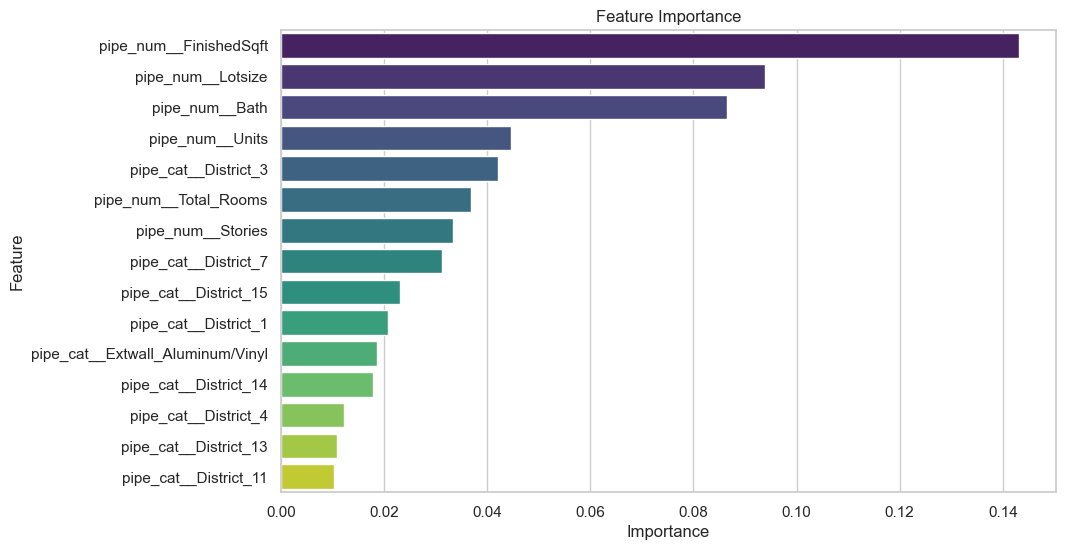

In [866]:
# Set the style of seaborn
sns.set_theme(style="whitegrid")

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_importances[:15], palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_59454/2353612091.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




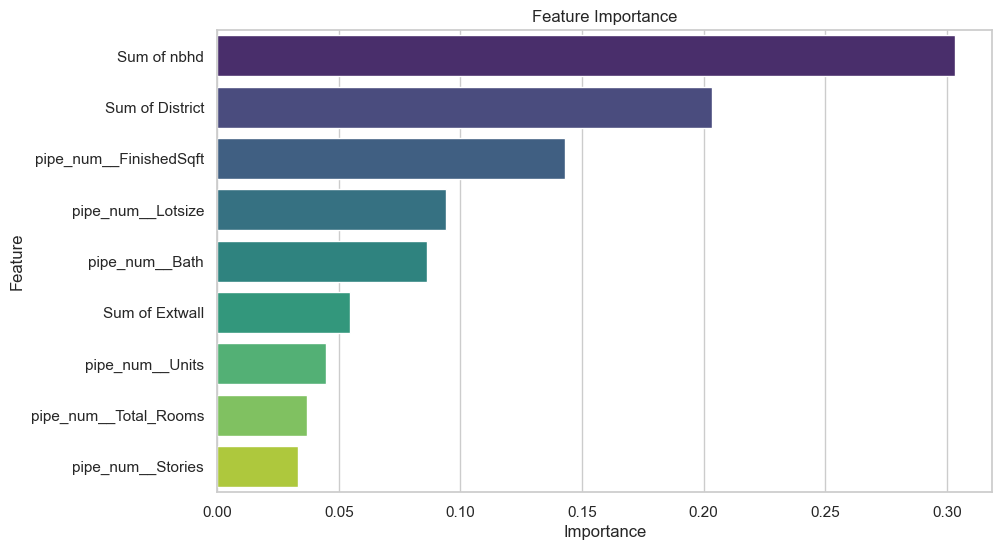

In [867]:
# Set the style of seaborn
sns.set_theme(style="whitegrid")

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=appended_df_sorted_gbr[:10], palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Visualizations

In [868]:
# Safe as dataframe
cv_results_grad_reg = pd.DataFrame(grid_search_grad_reg.cv_results_)
cv_results_grad_reg


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         3.053377      0.218749         0.127191        0.017693   
1         3.031536      0.240958         0.173651        0.021567   
2         2.064911      0.094393         0.045082        0.017633   
3         3.759055      0.124642         0.096668        0.023001   
4         4.467058      0.070178         0.091981        0.051873   
..             ...           ...              ...             ...   
724       4.699333      0.138328         0.036879        0.004354   
725       5.074583      0.107470         0.046817        0.005113   
726       7.466209      0.039040         0.069514        0.012171   
727       8.856262      0.137814         0.060053        0.006417   
728       7.854918      0.107116         0.043843        0.004753   

                                           param_model  \
0    ([DecisionTreeRegressor(criterion='friedman_ms...   
1    ([DecisionTreeRegressor(criterion='friedman_ms...   
2    ([DecisionTreeRegressor(criterion='friedman_ms...   
3    ([DecisionTreeRegressor(criterion='friedman_ms...   
4    ([DecisionTreeRegressor(criterion='friedman_ms...   
..                                                 ...   
724  ([DecisionTreeRegressor(criterion='friedman_ms...   
725  ([DecisionTreeRegressor(criterion='friedman_ms...   
726  ([DecisionTreeRegressor(criterion='friedman_ms...   
727  ([DecisionTreeRegressor(criterion='friedman_ms...   
728  ([DecisionTreeRegressor(criterion='friedman_ms...   

    param_model__learning_rate param_model__loss param_model__max_depth  \
0                         0.01             huber                      3   
1                         0.01             huber                      3   
2                         0.01             huber                      3   
3                         0.01             huber                      3   
4                         0.01             huber                      3   
..                         ...               ...                    ...   
724                        0.1             huber                      7   
725                        0.1             huber                      7   
726                        0.1             huber                      7   
727                        0.1             huber                      7   
728                        0.1             huber                      7   

    param_model__max_features param_model__min_samples_leaf  ...  \
0                        sqrt                             1  ...   
1                        sqrt                             1  ...   
2                        sqrt                             1  ...   
3                        sqrt                             1  ...   
4                        sqrt                             1  ...   
..                        ...                           ...  ...   
724                      sqrt                             4  ...   
725                      sqrt                             4  ...   
726                      sqrt                             4  ...   
727                      sqrt                             4  ...   
728                      sqrt                             4  ...   

    split3_test_score mean_test_score std_test_score rank_test_score  \
0            0.159120        0.112494       0.027459             709   
1            0.183191        0.116955       0.040365             705   
2            0.168058        0.115274       0.032454             706   
3            0.338749        0.220870       0.068431             646   
4            0.305831        0.206297       0.058729             659   
..                ...             ...            ...             ...   
724          0.165474        0.444515       0.176532             282   
725          0.256286        0.489272       0.157737              98   
726          0.147112        0.464568       0.212839             209   
727         -0.043562        0.393625    

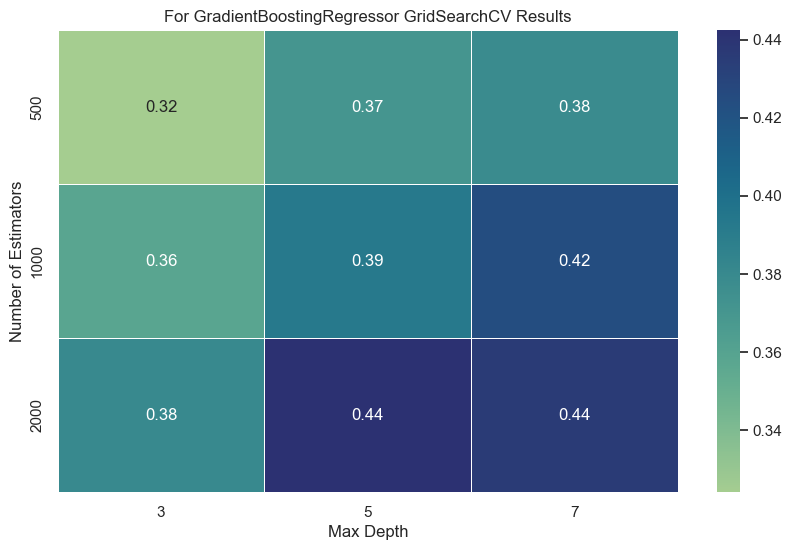

In [869]:
# Create the heatmap

best_model_name = best_model.named_steps["model"].__class__.__name__

heatmap_data = cv_results_grad_reg.pivot_table(
    index="param_model__n_estimators",
    columns="param_model__max_depth",
    values="mean_test_score",
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="crest", fmt=".2f", linewidths=0.5)
plt.title(f"For {best_model_name} GridSearchCV Results")
plt.xlabel("Max Depth")
plt.ylabel("Number of Estimators")
plt.show()


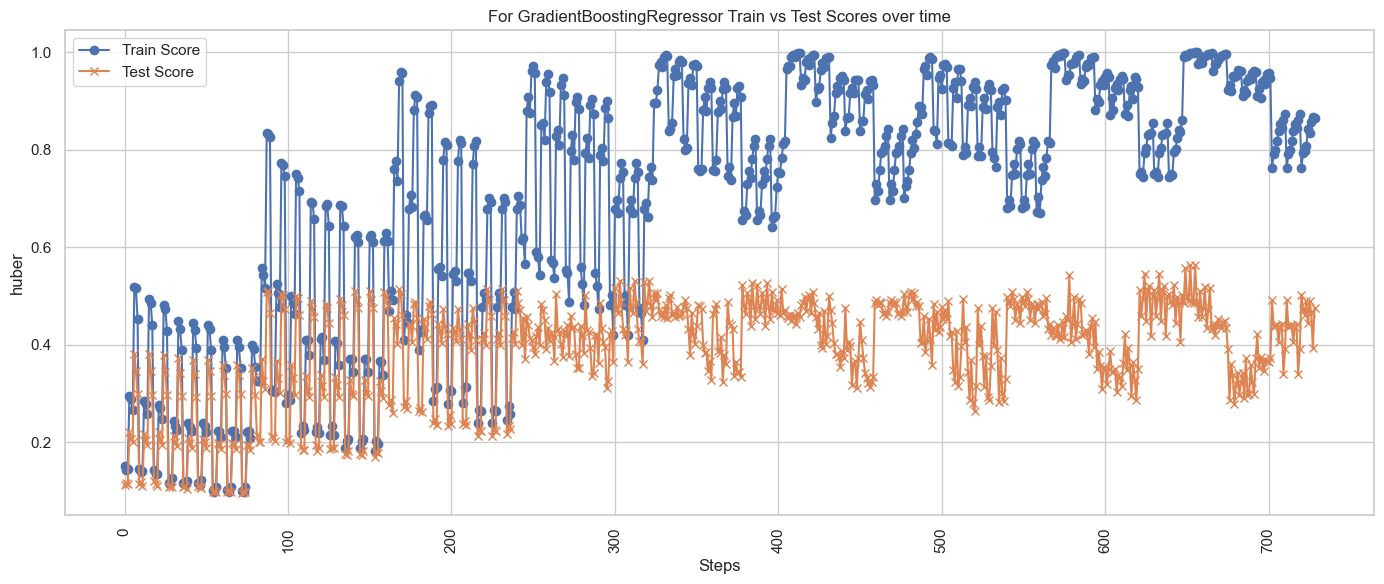

In [503]:
best_model_name = best_model.named_steps["model"].__class__.__name__
error_function = cv_results_grad_reg["param_model__loss"][0]
results = cv_results_grad_reg

# Extract parameter values and scores
train_scores = results["mean_train_score"]
test_scores = results["mean_test_score"]

# Plotting
plt.figure(figsize=(14, 6))

# Plot train scores
plt.plot(range(len(train_scores)), train_scores, label="Train Score", marker="o")

# Plot test scores
plt.plot(range(len(test_scores)), test_scores, label="Test Score", marker="x")

# Customize plot
plt.xticks(rotation=90)
plt.xlabel("Steps")
plt.ylabel(f"{error_function}")
plt.title(f"For {best_model_name} Train vs Test Scores over time")
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


In [504]:
# Assuming you have your train_scores and test_scores already defined
# Replace this with your actual data

best_model_name = best_model.named_steps["model"].__class__.__name__
error_function = cv_results_grad_reg["param_model__loss"][0]

# Plot train scores
train_trace = go.Scatter(
    x=list(range(len(train_scores))),
    y=train_scores,
    mode="lines+markers",
    name="Train Score",
)

# Plot test scores
test_trace = go.Scatter(
    x=list(range(len(test_scores))),
    y=test_scores,
    mode="lines+markers",
    name="Test Score",
)

# Layout configuration
layout = go.Layout(
    title=(f"For {best_model_name} Train vs Test Scores over time"),
    xaxis=dict(title="Steps", tickangle=90),
    yaxis=dict(title=f"{error_function}"),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=40, r=40, t=80, b=40),
)

# Create figure
fig = go.Figure(data=[train_trace, test_trace], layout=layout)

# Set hover information for the data points or lines
hover_template = (
    "<b>%{y}</b>"
    "<br>Index: %{x}"
    "<br>No. estimators: %{customdata[0]}"
    "<br>Min_samples_leaf: %{customdata[1]}"
)
fig.update_traces(
    hovertemplate=hover_template,
    customdata=np.column_stack(
        (
            cv_results_grad_reg["param_model__max_depth"],
            cv_results_grad_reg["param_model__min_samples_leaf"],
        )
    ),
)

# Show plot
fig.show()


# Final Visualizations

Model comparison

In [509]:
# Assuming you have a list of DataFrames containing metrics for different models
df_list = [df_dtr, df_rfr, df_gbr]  # Replace with your actual list of DataFrames

# Concatenate all DataFrames horizontally
combined_df = pd.concat(df_list, ignore_index=True)

# Print the combined DataFrame
combined_df


Model Metric     In-Sample  Out-of-Sample
0       DecisionTreeRegressor   MAPE  3.822814e+01   4.032804e+01
1       DecisionTreeRegressor    MAE  9.833815e+04   1.119766e+05
2       DecisionTreeRegressor    MSE  2.938156e+11   3.812823e+11
3       DecisionTreeRegressor   RMSE  5.420476e+05   5.420476e+05
4       DecisionTreeRegressor     R2  4.541231e-01   4.541231e-01
5       RandomForestRegressor   MAPE  1.011878e+01   2.679131e+01
6       RandomForestRegressor    MAE  2.783116e+04   6.890398e+04
7       RandomForestRegressor    MSE  2.535950e+10   1.488203e+11
8       RandomForestRegressor   RMSE  1.592467e+05   1.592467e+05
9       RandomForestRegressor     R2  9.528848e-01   9.528848e-01
10  GradientBoostingRegressor   MAPE  8.742252e+00   2.616327e+01
11  GradientBoostingRegressor    MAE  1.400731e+04   7.898301e+04
12  GradientBoostingRegressor    MSE  4.287907e+08   2.474006e+11
13  GradientBoostingRegressor   RMSE  2.070726e+04   2.070726e+04
14  GradientBoostingRegressor     R2  9.992034e-01   9.992034e-01

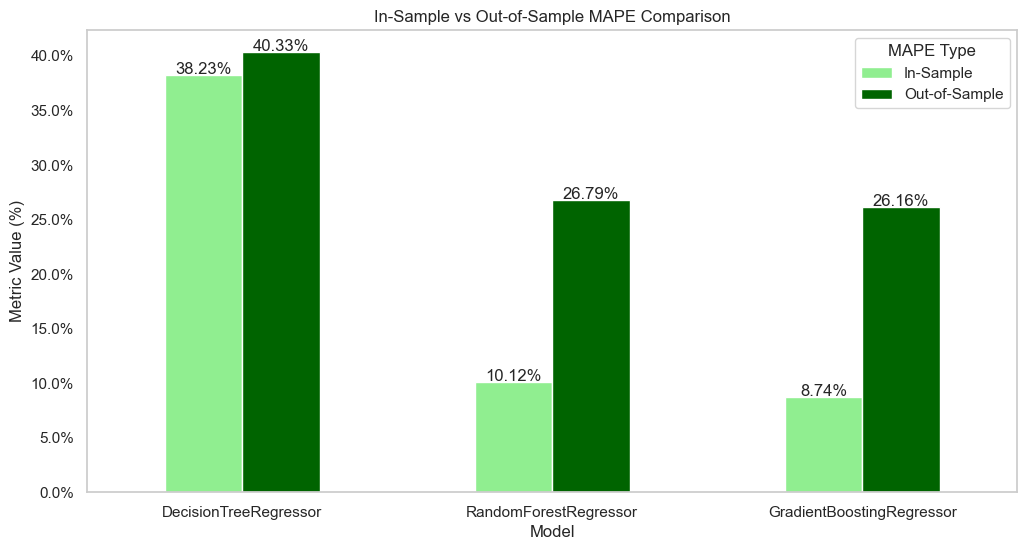

In [594]:
df = combined_df
mape_per_model = df.query("Metric == 'MAPE'").set_index("Model")[["In-Sample", "Out-of-Sample"]]

# Define colors for bars
colors = ['#90EE90', '#006400']

# Plot
ax = mape_per_model.plot(kind="bar", figsize=(12,6), color=colors, grid=False)
plt.title("In-Sample vs Out-of-Sample MAPE Comparison")
plt.xlabel("Model")
plt.ylabel("Metric Value (%)")
plt.xticks(rotation=360)
plt.legend(title="MAPE Type")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add values on top of the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, f'{round(i.get_height(), 2)}%', ha='center', va='center')

plt.show()


In [878]:
# Function to extract last string from feature names
def extract_last_string(feature_names):
    modified_names = []
    for feature in feature_names:
        if "_" in feature:
            last_string = feature.split('_')[-1]  # Split by '_' and get the last string
        else:
            last_string = feature.split()[-1]  # Split by space and get the last string
        modified_names.append(last_string)
    return modified_names

# Assuming you have DataFrames: appended_df_sorted_rfr, appended_df_sorted_dtr, and appended_df_sorted_gbr
# Concatenate DataFrames with ignore_index=True
concatenated_df = pd.concat([appended_df_sorted_rfr, appended_df_sorted_dtr, appended_df_sorted_gbr], ignore_index=True)

# Extracting last string from original feature names
concatenated_df['Feature'] = extract_last_string(concatenated_df['Feature'])

# Set the index to 'Feature'
concatenated_df.set_index('Feature', inplace=True)


In [894]:
concatenated_df[concatenated_df["Model"]== "GradientBoostingRegressor"][0:4].sum()


Importance                                             0.744015
Model         GradientBoostingRegressorGradientBoostingRegre...
dtype: object

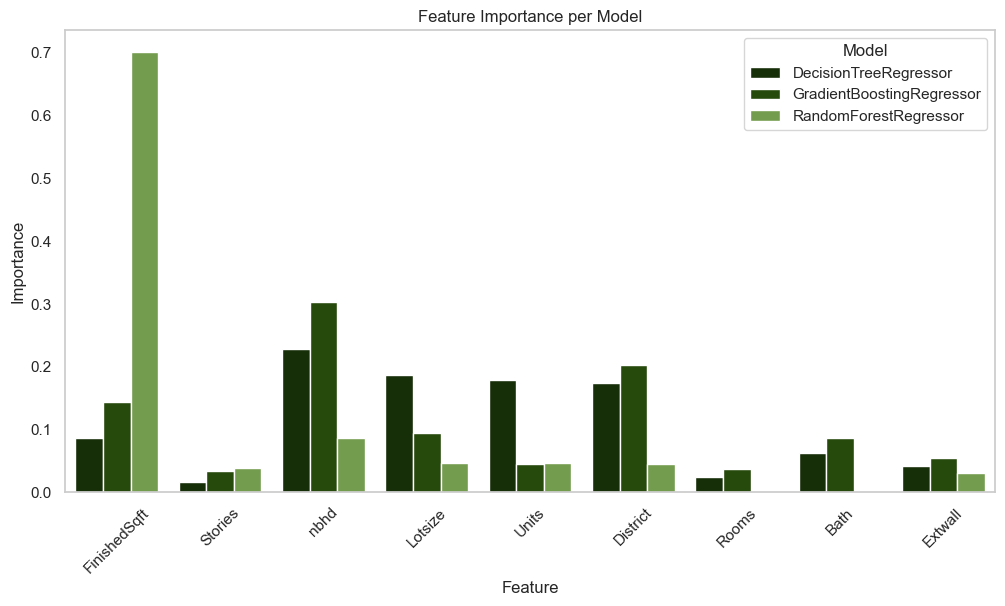

In [879]:
custom_palette = [
    tuple(int(val) / 255 for val in color.split(", ")) 
    for color in ["20, 54, 1", "36, 85, 1", "115, 169, 66"]
]

# Set the seaborn style to whitegrid
sns.set_style('whitegrid', {'axes.grid': False})

# Set the custom palette
sns.set_palette(custom_palette)

# Sort the DataFrame by the "Model" column in ascending order
combined_df_sorted = concatenated_df.sort_values(by="Model", ascending=True)

# Plot the bar chart with "Model" as hue using seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=combined_df_sorted, x="Feature", y="Importance", hue='Model')
plt.title('Feature Importance per Model')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.show()


Visualizations of the Actual vs. Predicted values

/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_59454/2444676212.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


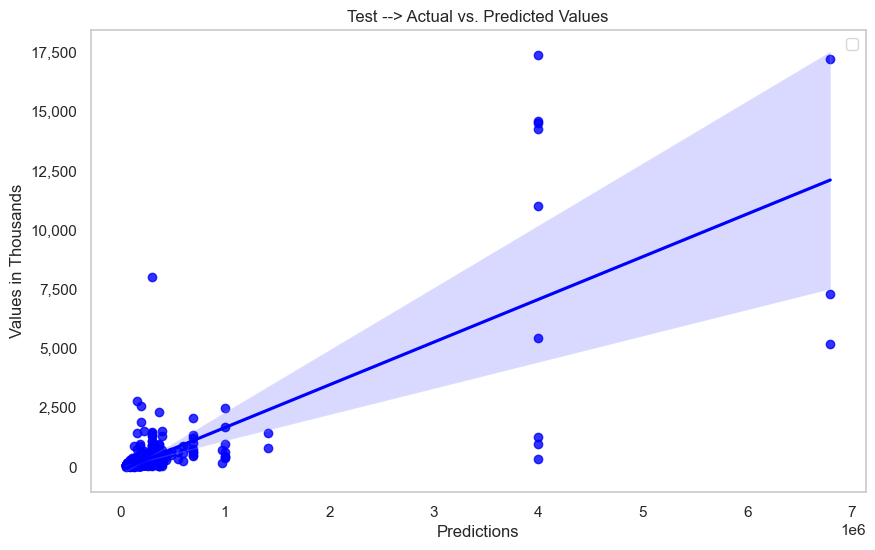

In [853]:
plt.figure(figsize=(10, 6))
sns.regplot(x=test_predictions, y=y_test, scatter=True, color="blue")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000) for x in current_values])
plt.xlabel("Predictions")
plt.ylabel("Values in Thousands")
plt.title("Test --> Actual vs. Predicted Values")
plt.legend()
plt.show()


/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_59454/604927453.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



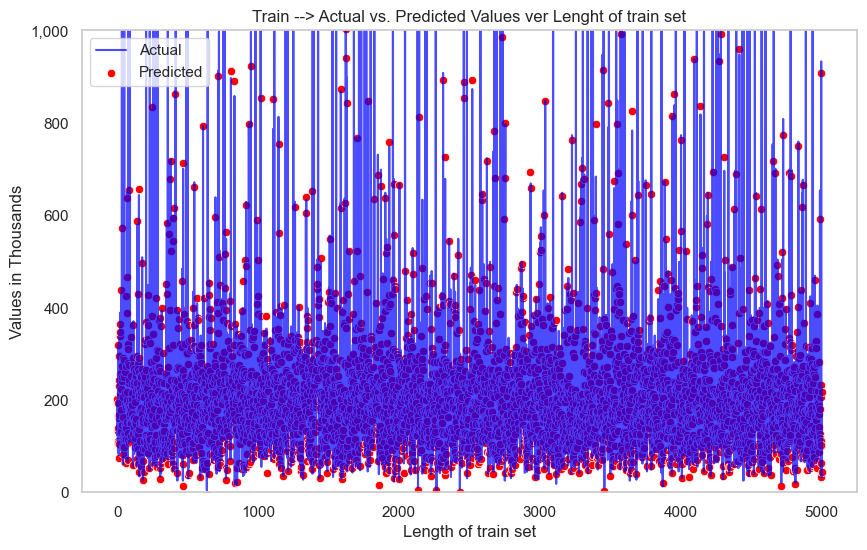

In [872]:
# Assuming you have a DataFrame named df with a "Date" column
# Plot actual vs. predicted values over time
y_limit = y_train.mean() + y_train.std()

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(y_train)), y=y_train, label="Actual", color="blue", alpha=0.7)
sns.scatterplot(
    x=range(len(y_train)), y=train_predictions, label="Predicted", color="red", alpha=1
)
plt.ylim(0, y_limit)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000) for x in current_values])
plt.xlabel("Length of train set")
plt.ylabel("Values in Thousands")
plt.title("Train --> Actual vs. Predicted Values ver Lenght of train set")
plt.legend()
plt.show()


/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_59454/224083356.py:16: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



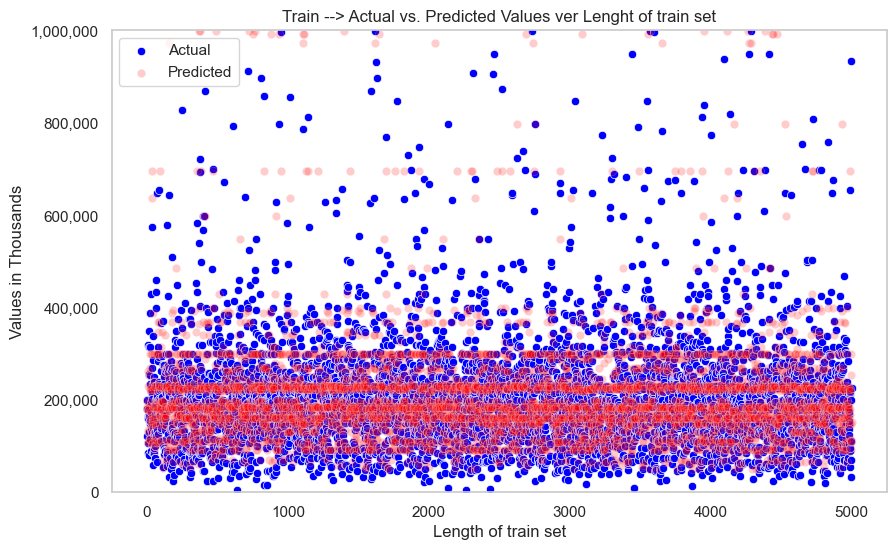

In [851]:
# Assuming you have a DataFrame named df with a "Date" column
# Plot actual vs. predicted values over time
y_limit = y_train.mean() + y_train.std()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(y_train)), y=y_train, label="Actual", color="blue", alpha=1)
sns.scatterplot(
    x=range(len(y_train)),
    y=train_predictions,
    label="Predicted",
    color="red",
    alpha=0.2,
)
plt.ylim(0, y_limit)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000) for x in current_values])
plt.xlabel("Length of train set")
plt.ylabel("Values in Thousands")
plt.title("Train --> Actual vs. Predicted Values ver Lenght of train set")
plt.legend()
plt.show()


/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_59454/985873193.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



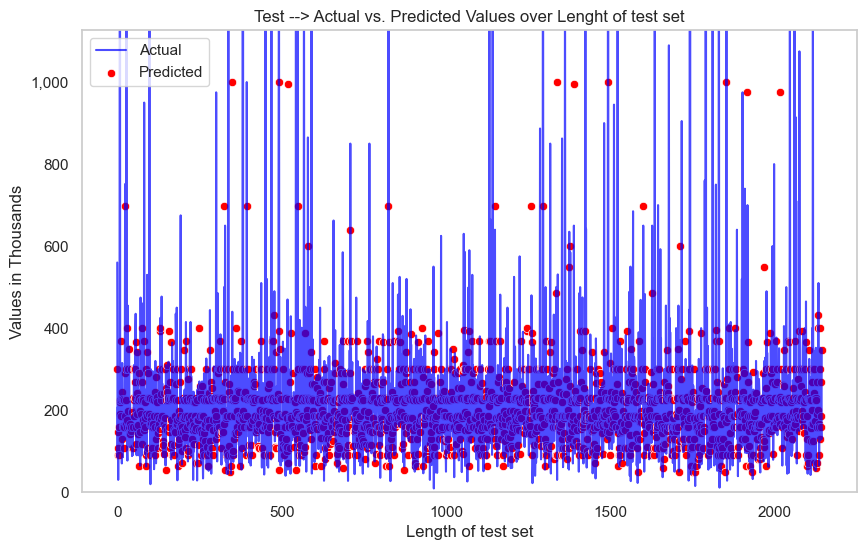

In [850]:
# Assuming you have a DataFrame named df with a "Date" column
# Plot actual vs. predicted values over time
y_limit = y_test.mean() + y_test.std()

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", color="blue", alpha=0.7)
sns.scatterplot(
    x=range(len(y_test)), y=test_predictions, label="Predicted", color="red", alpha=1
)
plt.ylim(0, y_limit)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000) for x in current_values])
plt.xlabel("Length of test set")
plt.ylabel("Values in Thousands")
plt.title("Test --> Actual vs. Predicted Values over Lenght of test set")
plt.legend()
plt.show()


/var/folders/96/tqdv_j8d1td69fwj_dc4jwk80000gn/T/ipykernel_59454/2610568638.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



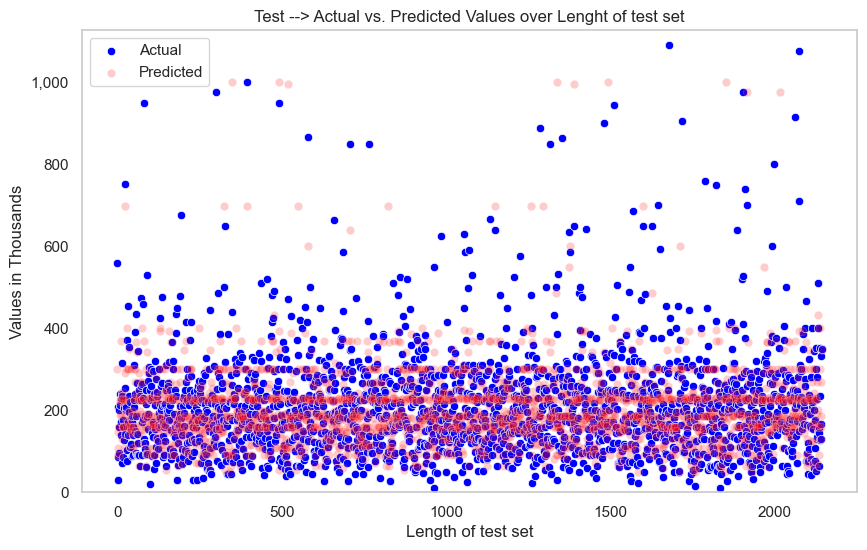

In [852]:
# Assuming you have a DataFrame named df with a "Date" column
# Plot actual vs. predicted values over time
y_limit = y_test.mean() + y_test.std()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(y_test)), y=y_test, label="Actual", color="blue", alpha=1)
sns.scatterplot(
    x=range(len(y_test)), y=test_predictions, label="Predicted", color="red", alpha=0.2
)
plt.ylim(0, y_limit)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000) for x in current_values])
plt.xlabel("Length of test set")
plt.ylabel("Values in Thousands")
plt.title("Test --> Actual vs. Predicted Values over Lenght of test set")
plt.legend()
plt.show()


In [600]:
# ChatGPT was used here partially: https://chat.openai.com/c/3536258e-5092-440b-9298-b9f30af8485d

# Assuming test_predictions and y_test are numpy arrays or lists
# Convert them to pandas Series if they are not already
test_predictions_series = pd.Series(test_predictions, name="Predicted")
y_test_series = pd.Series(y_test, name="Actual")

# Ensure that the indices align
test_predictions_series.index = range(len(test_predictions_series))
y_test_series.index = range(len(y_test_series))

# Concatenate the two Series into one DataFrame
result_df = pd.concat([test_predictions_series, y_test_series], axis=1)

result_df["Residuals"] = result_df["Actual"] - result_df["Predicted"]
result_df["Residuals_abs"] = abs(result_df["Residuals"])

# Print the resulting DataFrame
result_df


Predicted    Actual      Residuals  Residuals_abs
0     724502.962902  560000.0 -164502.962902  164502.962902
1      29750.458952   85000.0   55249.541048   55249.541048
2     206495.482953  208000.0    1504.517047    1504.517047
3      56691.728473   30000.0  -26691.728473   26691.728473
4     132594.135397  158000.0   25405.864603   25405.864603
...             ...       ...            ...            ...
2139  117643.453311  128000.0   10356.546689   10356.546689
2140  309735.173577  332000.0   22264.826423   22264.826423
2141  145733.119187  167000.0   21266.880813   21266.880813
2142  175738.375045  129100.0  -46638.375045   46638.375045
2143  312224.540304  350000.0   37775.459696   37775.459696

[2144 rows x 4 columns]

In [891]:
y_limit = y_test.mean() + y_test.std()

# Create the line plot
fig = px.line(
    result_df,
    x=result_df.index,
    y=["Actual", "Predicted"],
    title="Test --> Actual vs. Predicted Values over Lenght of test set",
)

# Set line dash style for each line
for i in range(len(fig.data)):
    fig.update_traces(
        line_dash="dashdot" if i == 0 else "solid", selector=dict(name=fig.data[i].name)
    )

# Set axis titles
fig.update_xaxes(title_text="Lenght of test set")  # Set x-axis title
# You can update y-axis title similarly if needed
fig.update_yaxes(title_text="Value")
fig.update_yaxes(range=[0, y_limit])  # Specify the y-axis limits as [min, max]

# Show the plot
fig.show()


In [602]:
# Create the line plot
fig = px.line(
    result_df,
    x=result_df.index,
    y="Residuals",
    title="Test --> Residuals over Lenght of test set",
)

# Set axis titles
fig.update_xaxes(title_text="Lenght of test set")  # Set x-axis title
# You can update y-axis title similarly if needed
fig.update_yaxes(title_text="Value")

# Set hover information for the data points or lines
hover_template = (
    "<b>%{y}</b>"
    "<br>Index: %{x}"
    "<br>Actual 1: %{customdata[0]}"
    "<br>Predicted 2: %{customdata[1]}"
)
fig.update_traces(
    hovertemplate=hover_template,
    customdata=np.column_stack((result_df["Actual"], result_df["Predicted"])),
)

# Show the plot
fig.show()


In [603]:
actual_std_dev = np.std(result_df["Actual"])
y_limit = y_test.mean() + y_test.std()

# Create the line plot
fig = px.line(
    result_df,
    x=result_df.index,
    y=["Actual", "Predicted"],
    title="Test --> Actual vs. Predicted Values over Lenght of test set",
)

# Set line dash style for each line
for i in range(len(fig.data)):
    fig.update_traces(
        line_dash="dashdot" if i == 0 else "solid", selector=dict(name=fig.data[i].name)
    )

# Add shaded areas representing the standard deviation
fig.add_trace(
    go.Scatter(
        x=result_df.index,
        y=result_df["Actual"] + actual_std_dev,
        fill="tonexty",  # Fill area between the line and the upper limit
        fillcolor="rgba(255, 165, 165, 0.3)",  # Adjust color and transparency as needed
        line=dict(width=0),
        name="Actual + Std Dev",
    )
)

fig.add_trace(
    go.Scatter(
        x=result_df.index,
        y=result_df["Actual"] - actual_std_dev,
        fill="tonexty",  # Fill area between the line and the lower limit
        fillcolor="rgba(255, 165, 165, 0.3)",  # Adjust color and transparency as needed
        line=dict(width=0),
        name="Actual - Std Dev",
    )
)

fig.update_traces(
    selector=dict(name="Predicted"), line=dict(color="rgba(240, 128, 128, 0.5)")
)


# Set axis titles
fig.update_xaxes(title_text="Lenght of test set")  # Set x-axis title
# You can update y-axis title similarly if needed
fig.update_yaxes(title_text="Value")
fig.update_yaxes(range=[0, y_limit])  # Specify the y-axis limits as [min, max]

# Show the plot
fig.show()
